<a href="https://colab.research.google.com/github/JorgePerezPHYS60/Phys6140-Homeworks/blob/main/PHYS_6140_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import arviz as az
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import xarray as xr
import pymc as pm
import pytensor
import pytensor.tensor as pt
from pytensor.compile.ops import as_op

plt.rcParams['figure.constrained_layout.use'] = True
print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.10.4


In [6]:
# @title Define variable RawData (Raw Data = [val_1, val_2, ..., val_i])

RawData = [
  9.38830050E+01,8.44045622E+01,9.02748865E+01,1.10582103E+02,
  9.46126976E+01,1.01372547E+02,8.92261435E+01,8.23569281E+01,
  9.42260734E+01,8.91521480E+01,9.67168368E+01,7.88072083E+01,
  9.54570705E+01,8.89475543E+01,8.75788198E+01,9.17399967E+01,
  8.11348563E+01,8.44179658E+01,9.31417281E+01,8.02674438E+01,
  9.08820710E+01,8.39155176E+01,7.74373532E+01,7.11050156E+01,
  9.12163749E+01,9.22313272E+01,9.66084128E+01,1.05202835E+02,
  1.00466531E+02,1.38076542E+02,1.21620098E+02,9.58041829E+01,
  9.87878481E+01,1.02513619E+02,1.03800223E+02,7.90892035E+01,
  7.17476984E+01,7.76112403E+01,7.90758232E+01,1.00931381E+02,
  6.76593712E+01,7.43956705E+01,8.29779777E+01,9.22024466E+01,
  7.11804942E+01,5.46377719E+01,8.43179919E+01,6.63418488E+01,
  7.21723371E+01,6.60256924E+01,8.07486347E+01,6.54165587E+01,
  6.73892558E+01,7.46481274E+01,5.58876979E+01,6.66626288E+01,
  7.01075908E+01,8.15509865E+01,6.66818430E+01,7.40774043E+01,
  7.38863549E+01,5.79256278E+01,7.04878657E+01,9.05891598E+01,
  6.91262098E+01,6.86742837E+01,7.32073249E+01,7.13560939E+01,
  6.82043018E+01,6.21006921E+01,6.68617103E+01,6.47763814E+01,
  5.64818681E+01,6.07856843E+01,7.55319932E+01,8.10748910E+01,
  7.29201567E+01,6.15222580E+01,7.49124654E+01,6.95832245E+01,
  7.61327229E+01,6.92978052E+01,6.59302394E+01,5.51235819E+01,
  6.34452617E+01,6.64224041E+01,6.62580118E+01,5.66011226E+01,
  7.42603983E+01,6.16050794E+01,6.54164126E+01,5.74825981E+01,
  5.83982089E+01,7.03819811E+01,7.22164043E+01,7.19049381E+01,
  5.46000555E+01,7.55843198E+01,6.38903501E+01,5.39025038E+01,
  5.00385862E+01,5.69208767E+01,4.77472864E+01,5.28602991E+01,
  6.73291690E+01,6.33710672E+01,5.29816959E+01,5.00397093E+01,
  6.17483580E+01,5.38487770E+01,4.93173720E+01,4.27383859E+01,
  5.20453500E+01,6.02747475E+01,5.02784422E+01,6.41922107E+01,
  7.09144821E+01,4.90416299E+01,5.33582123E+01,4.61689115E+01,
  4.77461780E+01,6.00292435E+01,5.44286588E+01,5.59305335E+01,
  4.31231557E+01,4.29288586E+01,4.76742352E+01,5.55831245E+01,
  5.82949256E+01,4.35161909E+01,5.48691715E+01,4.40011890E+01,
  6.60058520E+01,4.06841657E+01,3.96994834E+01,5.27979771E+01,
  5.46640024E+01,3.90568896E+01,4.90052391E+01,5.83427584E+01,
  4.72495476E+01,4.67208969E+01,4.41866935E+01,5.04479950E+01,
  5.20267359E+01,4.25193371E+01,4.35277677E+01,3.87782051E+01,
  5.70588536E+01,3.39293519E+01,4.48928769E+01,4.29031235E+01,
  5.06126647E+01,5.12530273E+01,5.87833377E+01,4.94477131E+01,
  4.73361925E+01,3.70913045E+01,4.13875121E+01,4.54847804E+01,
  5.54141024E+01,5.30272470E+01,4.23670997E+01,4.40966848E+01,
  4.32023337E+01,3.28203761E+01,5.13329487E+01,4.78347830E+01,
  4.21621044E+01,3.22739411E+01,4.06167554E+01,4.10661225E+01,
  4.17571503E+01,3.78713386E+01,3.23126008E+01,4.04103267E+01,
  3.72934514E+01,3.91864259E+01,3.93525218E+01,3.71300108E+01,
  4.22864008E+01,3.94062270E+01,4.37566201E+01,4.04789151E+01,
  3.85310787E+01,3.73203995E+01,3.82443344E+01,4.04908682E+01,
  4.20094295E+01,3.04937542E+01,3.06458129E+01,3.68616398E+01,
  4.28976091E+01,2.27949579E+01,2.76677715E+01,4.26402260E+01,
  3.99023599E+01,5.00174938E+01,3.29522724E+01,3.67619923E+01,
  3.00874690E+01,3.81439001E+01,3.27893992E+01,3.62907891E+01,
  3.39187749E+01,3.78429783E+01,2.56590810E+01,3.07249748E+01,
  4.24633740E+01,3.34650869E+01,2.54170211E+01,3.17670470E+01,
  2.98016464E+01,2.90014143E+01,3.34701663E+01,2.93444820E+01,
  2.48660884E+01,4.01841255E+01,2.32200748E+01,2.87378047E+01,
  3.03931584E+01,2.92154498E+01,3.07891916E+01,2.50172469E+01,
  2.93612290E+01,4.01115008E+01,3.68612253E+01,2.34289882E+01,
  3.19110741E+01,2.98251366E+01,3.74334907E+01,3.03274148E+01,
  2.28620549E+01,3.06727108E+01,2.69233659E+01,2.78781621E+01,
  3.53007033E+01,3.57139701E+01,3.45085141E+01,3.88493350E+01,
  4.12042700E+01,3.32412356E+01,4.06557272E+01,3.88599878E+01,
  3.37226837E+01,3.76464078E+01,3.53744742E+01,2.23512299E+01,
  3.01527326E+01,2.72159486E+01,1.88029025E+01,2.18596543E+01,
  2.13743193E+01,1.99290296E+01,2.96344045E+01,2.37952044E+01,
  2.35077353E+01,2.63693643E+01,1.98593783E+01,3.19079720E+01,
  1.75311054E+01,2.65253670E+01,2.91344099E+01,3.27007264E+01,
  2.06245538E+01,1.85847118E+01,3.28714634E+01,2.90742945E+01,
  1.55673082E+01,1.87731988E+01,3.71070948E+01,2.55287287E+01,
  1.63630171E+01,1.58935101E+01,2.23378168E+01,2.17804478E+01,
  1.94733419E+01,2.68684451E+01,1.83453206E+01,2.44728859E+01,
  1.78602196E+01,2.98410828E+01,2.20425117E+01,2.45938913E+01,
  2.32054958E+01,1.64740393E+01,2.28533606E+01,2.71601434E+01,
  2.22779796E+01,1.85913333E+01,2.74384722E+01,3.41360977E+01,
  2.21445384E+01,1.85567874E+01,2.03168459E+01,1.99822057E+01,
  1.88962712E+01,2.56974557E+01,2.49478467E+01,2.04222802E+01,
  2.07958249E+01,2.63511388E+01,2.54819227E+01,2.58556298E+01,
  2.13762948E+01,1.59742690E+01,2.24988476E+01,3.20495899E+01,
  2.35199403E+01,1.95990767E+01,2.90604217E+01,1.79298806E+01,
  2.17464090E+01,1.43869019E+01,2.21596749E+01,1.57312451E+01,
  1.43273049E+01,1.18226865E+01,2.52116725E+01,2.49887207E+01,
  1.80797307E+01,1.38440824E+01,1.30436004E+01,2.29419396E+01,
  1.34710012E+01,1.49402860E+01,1.84617590E+01,1.79038621E+01,
  1.98498554E+01,2.06024136E+01,2.21027233E+01,2.10314071E+01,
  2.30135920E+01,1.37649095E+01,1.76037037E+01,2.47818186E+01,
  1.58948960E+01,1.70585415E+01,1.54696680E+01,2.22715456E+01,
  1.79989135E+01,1.24991140E+01,1.66298042E+01,1.71119225E+01,
  1.77321061E+01,1.80027960E+01,1.33894408E+01,2.45043903E+01,
  1.21288933E+01,1.47352481E+01,9.08561599E+00,1.42632830E+01,
  2.03425012E+01,1.58916361E+01,1.40798544E+01,1.79536269E+01,
  1.96627333E+01,1.55226029E+01,1.13464990E+01,1.17853675E+01,
  1.64259760E+01,1.66589860E+01,1.84385525E+01,1.76046649E+01,
  1.63975921E+01,1.80506492E+01,2.24627383E+01,1.42801166E+01,
  1.18616560E+01,8.55535664E+00,1.39939438E+01,1.00878135E+01,
  1.50616348E+01,1.29074876E+01,1.26187796E+01,1.00232754E+01,
  1.50055960E+01,1.25424474E+01,1.51019557E+01,9.06756086E+00,
  1.60566063E+01,1.60429648E+01,1.83583447E+01,7.71345498E+00,
  1.09898443E+01,1.30286432E+01,1.37164786E+01,1.70130546E+01,
  2.03722315E+01,1.33513286E+01,1.32242530E+01,2.02814942E+01,
  1.79856608E+01,1.65777586E+01,1.23272227E+01,1.06916450E+01,
  1.68290319E+01,2.11773573E+01,1.60737143E+01,1.11337587E+01,
  2.29055575E+01,2.08298074E+01,1.53575664E+01,1.42642513E+01,
  1.11513477E+01,1.84445399E+01,1.60279937E+01,1.23201260E+01,
  9.89648831E+00,1.17557068E+01,1.38640477E+01,1.05353037E+01,
  1.67888595E+01,1.27325021E+01,1.78010464E+01,1.15766123E+01,
  9.57503375E+00,1.55353641E+01,1.77758741E+01,1.08004873E+01,
  1.50793040E+01,1.34469401E+01,1.36994730E+01,9.84771070E+00,
  1.01335672E+01,9.53830946E+00,1.37733220E+01,9.08445955E+00,
  3.22560033E+00,5.96583930E+00,1.51752274E+01,7.48589659E+00,
  1.40424818E+01,1.32447530E+01,6.03549033E+00,7.41224803E+00,
  3.15619656E+00,9.96275768E+00,9.04624805E+00,8.83792787E+00,
  1.45449407E+01,1.49968340E+01,7.93866804E+00,1.24430066E+01,
  5.38024458E+00,6.50875165E+00,1.49066102E+01,6.88645304E+00,
  1.49334687E+01,7.48005216E+00,1.33567948E+01,8.58100844E+00,
  1.23180130E+01,1.21239582E+01,7.05071750E+00,9.30716610E+00,
  7.34255893E+00,1.79913738E+01,8.69747087E+00,1.23303241E+01,
  1.31301151E+01,1.37197428E+01,1.27643110E+01,1.09696784E+01,
  1.10456215E+01,1.45171196E+01,9.39856811E+00,1.01875993E+01,
  5.33813865E+00,5.18101496E+00,5.63278495E+00,9.68008081E+00,
  7.15282638E+00,7.08675737E+00,1.16789202E+01,8.32615351E+00,
  1.38237129E+01,9.26964727E+00,8.79337445E+00,4.36848612E+00,
  7.92740294E+00,7.53958464E+00,1.10513936E+01,3.88906384E+00,
  3.13518411E+00,1.03967618E+01,9.85456892E+00,4.97151989E+00,
  6.20304119E+00,2.72577836E+00,9.95891665E+00,7.56995710E+00,
  8.14920984E+00,8.41268940E+00,1.10032363E+01,5.00305528E+00,
  8.81047810E+00,-6.26930073E-01,9.23120853E+00,9.36006674E+00,
  7.43723757E+00,9.42279477E+00,1.01908660E+01,1.03101280E+01,
  1.26840200E+01,8.21218372E+00,3.50097750E+00,9.54327690E+00,
  8.71277723E+00,7.11783228E+00,1.00068111E+01,5.25633074E+00,
  3.84923352E+00,4.78248460E+00,1.06310515E+00,1.04312930E+01,
  7.03153318E+00,7.62513776E+00,9.17656676E+00,5.90616848E+00,
  9.19311616E+00,2.01374973E+00,1.20749869E+01,8.96016119E+00,
  3.97705605E+00,6.46054230E+00,6.42523801E+00,6.37445234E+00,
  7.16576000E+00,6.75087281E+00,9.74631122E+00,5.02717612E+00,
  4.10969421E+00,1.19702591E+01,6.69735857E+00,5.31762230E+00,
  8.30771694E+00,4.03970373E+00,1.39748043E+00,1.08278346E+01,
  8.44208435E+00,4.04483201E+00,6.16331201E+00,7.38767836E+00,
  3.61678512E+00,8.26631871E+00,8.13149032E+00,7.69193272E+00,
  5.24343246E+00,7.79495609E+00,4.02475491E+00,5.48768927E+00,
  8.36952955E+00,-6.80826567E-01,5.16852186E+00,5.80673539E+00,
  7.53610286E+00,4.16445351E+00,7.42643268E+00,4.11133507E+00,
  4.00338763E+00,6.32535695E+00,3.58434631E+00,5.15596289E+00,
  6.41702412E+00,3.62967530E+00,4.12744665E+00,8.32185044E+00,
  5.15929727E+00,5.19563712E+00,8.46876351E+00,6.93231426E+00,
  6.53659709E+00,8.61692460E+00,3.42682565E+00,4.15243862E+00,
  5.73437065E+00,1.04823416E+01,6.32199727E+00,5.54752549E+00,
  6.34947722E+00,2.72496775E+00,6.41546627E+00,3.62106488E+00,
  7.43719507E+00,5.66386319E+00,7.08810642E+00,5.01083749E+00,
  6.82257466E+00,5.40003921E+00,5.78236770E+00,6.21393081E+00,
  7.19015523E+00,1.17967023E-01,5.32236591E+00,6.21663131E+00,
  3.12058649E+00,2.54733364E+00,4.12105944E+00,6.55323225E+00,
  6.26112240E+00,5.02146057E+00,3.74619158E+00,4.38864695E+00,
  5.42678832E+00,2.63884379E+00,5.42373152E+00,4.76796587E+00,
  1.76564406E+00,4.68165909E+00,3.65691316E+00,3.39647070E+00,
  7.54063559E+00,6.61521929E+00,1.77839681E+00,1.77763163E+00,
  6.62487429E+00,7.37053593E+00,8.44962099E+00,5.43526113E+00,
  1.34276436E+00,5.82426081E+00,7.02712120E+00,7.29684193E+00,
  -9.98649095E-02,4.14626100E+00,5.65121310E+00,6.19384299E+00,
  5.80685526E+00,4.50300554E+00,3.50171528E+00,2.78859765E-01,
  5.41538288E+00,4.66764636E+00,7.75755087E+00,3.69715536E+00,
  8.80851523E-01,2.49281796E+00,3.44015516E+00,-3.00153406E-01,
  5.52722891E+00,1.44109980E+00,6.70359905E+00,1.61163771E+00,
  5.13209937E+00,2.28913207E+00,6.49159673E+00,6.72143365E+00,
  4.22908075E+00,2.28181921E+00,3.33159500E+00,-1.22715337E+00,
  5.69189990E+00,4.74117217E+00,4.85981054E+00,4.71976112E+00,
  3.58292372E+00,5.32276884E+00,5.18729581E+00,4.18204316E+00,
  2.71875964E+00,6.19154953E+00,1.95993087E+00,5.80781028E+00,
  8.17930048E+00,2.87952195E+00,1.59364855E+00,2.63898553E+00,
  4.86220747E+00,1.63921900E+00,-2.63399596E-01,4.13115316E+00,
  2.52098089E+00,5.85571536E+00,2.46845379E+00,3.75900642E+00,
  -1.17396099E-01,2.59674159E+00,-6.28984074E-01,4.26686586E+00,
  7.44838546E-01,3.17683765E+00,-2.66298653E-01,3.45158187E+00,
  1.35248334E+00,4.98107231E+00,-3.13803955E-02,2.81109896E+00,
  1.18852485E+00,3.93301468E+00,4.37324352E+00,6.13971735E-01,
  1.56658981E+00,2.20352621E+00,4.81477019E+00,-2.94035886E-01,
  3.46117726E+00,5.24124917E+00,1.81491031E+00,3.41030640E+00,
  7.09084583E+00,6.28391422E+00,-2.80082993E-01,8.06110376E-01,
  2.53319582E+00,1.19064835E+00,7.48253693E-01,2.51832614E+00,
  2.68493344E+00,4.18112334E+00,3.37878118E+00,3.62275346E+00,
  1.06852199E+01,6.95660028E+00,1.14775707E+01,9.44646126E+00,
  1.02297288E+01,9.03282160E+00,6.75724258E+00,2.41892655E+00,
  9.18316752E-01,1.64944270E+00,2.10826285E+00,3.65272552E+00,
  2.57873273E+00,1.29824939E+00,1.59504003E+00,1.59965527E+00,
  3.02137955E+00,3.84694950E+00,1.78859349E+00,2.32772787E+00,
  2.12267349E-01,3.55104327E+00,3.63148919E+00,3.34541449E+00,
  3.01031966E+00,-5.79021938E-02,-3.57740850E-01,2.74108171E+00,
  -1.05967422E+00,2.10401536E+00,8.74403183E-01,-2.13448687E-01,
  2.84035773E+00,9.95623175E-01,4.68222576E+00,-2.46690674E-01,
  2.29533096E+00,2.48093266E+00,1.35498173E+00,3.81444138E+00,
  1.99617181E+00,2.35643989E+00,1.85282723E+00,2.23519731E+00,
  1.69621952E+00,2.71749072E+00,3.44066126E+00,9.85821408E-01,
  2.10263372E+00,2.51159940E+00,2.35628696E+00,9.21083672E-01,
  2.50170620E+00,1.10429344E+00,2.12523325E-01,2.38687514E+00,
  5.05876092E+00,4.15077912E+00,2.57993619E+00,2.37301425E+00,
  4.15746835E+00,2.91505509E+00,1.29624075E+00,5.38485968E-01,
  3.29535614E+00,3.39630427E-01,7.97207623E-01,4.10448588E+00,
  2.33177745E+00,1.23833587E+00,4.79175879E-01,1.70453222E+00,
  1.36525116E+00,3.61031322E+00,2.00994917E+00,1.34572347E+00,
  2.74465112E+00,1.80042243E+00]


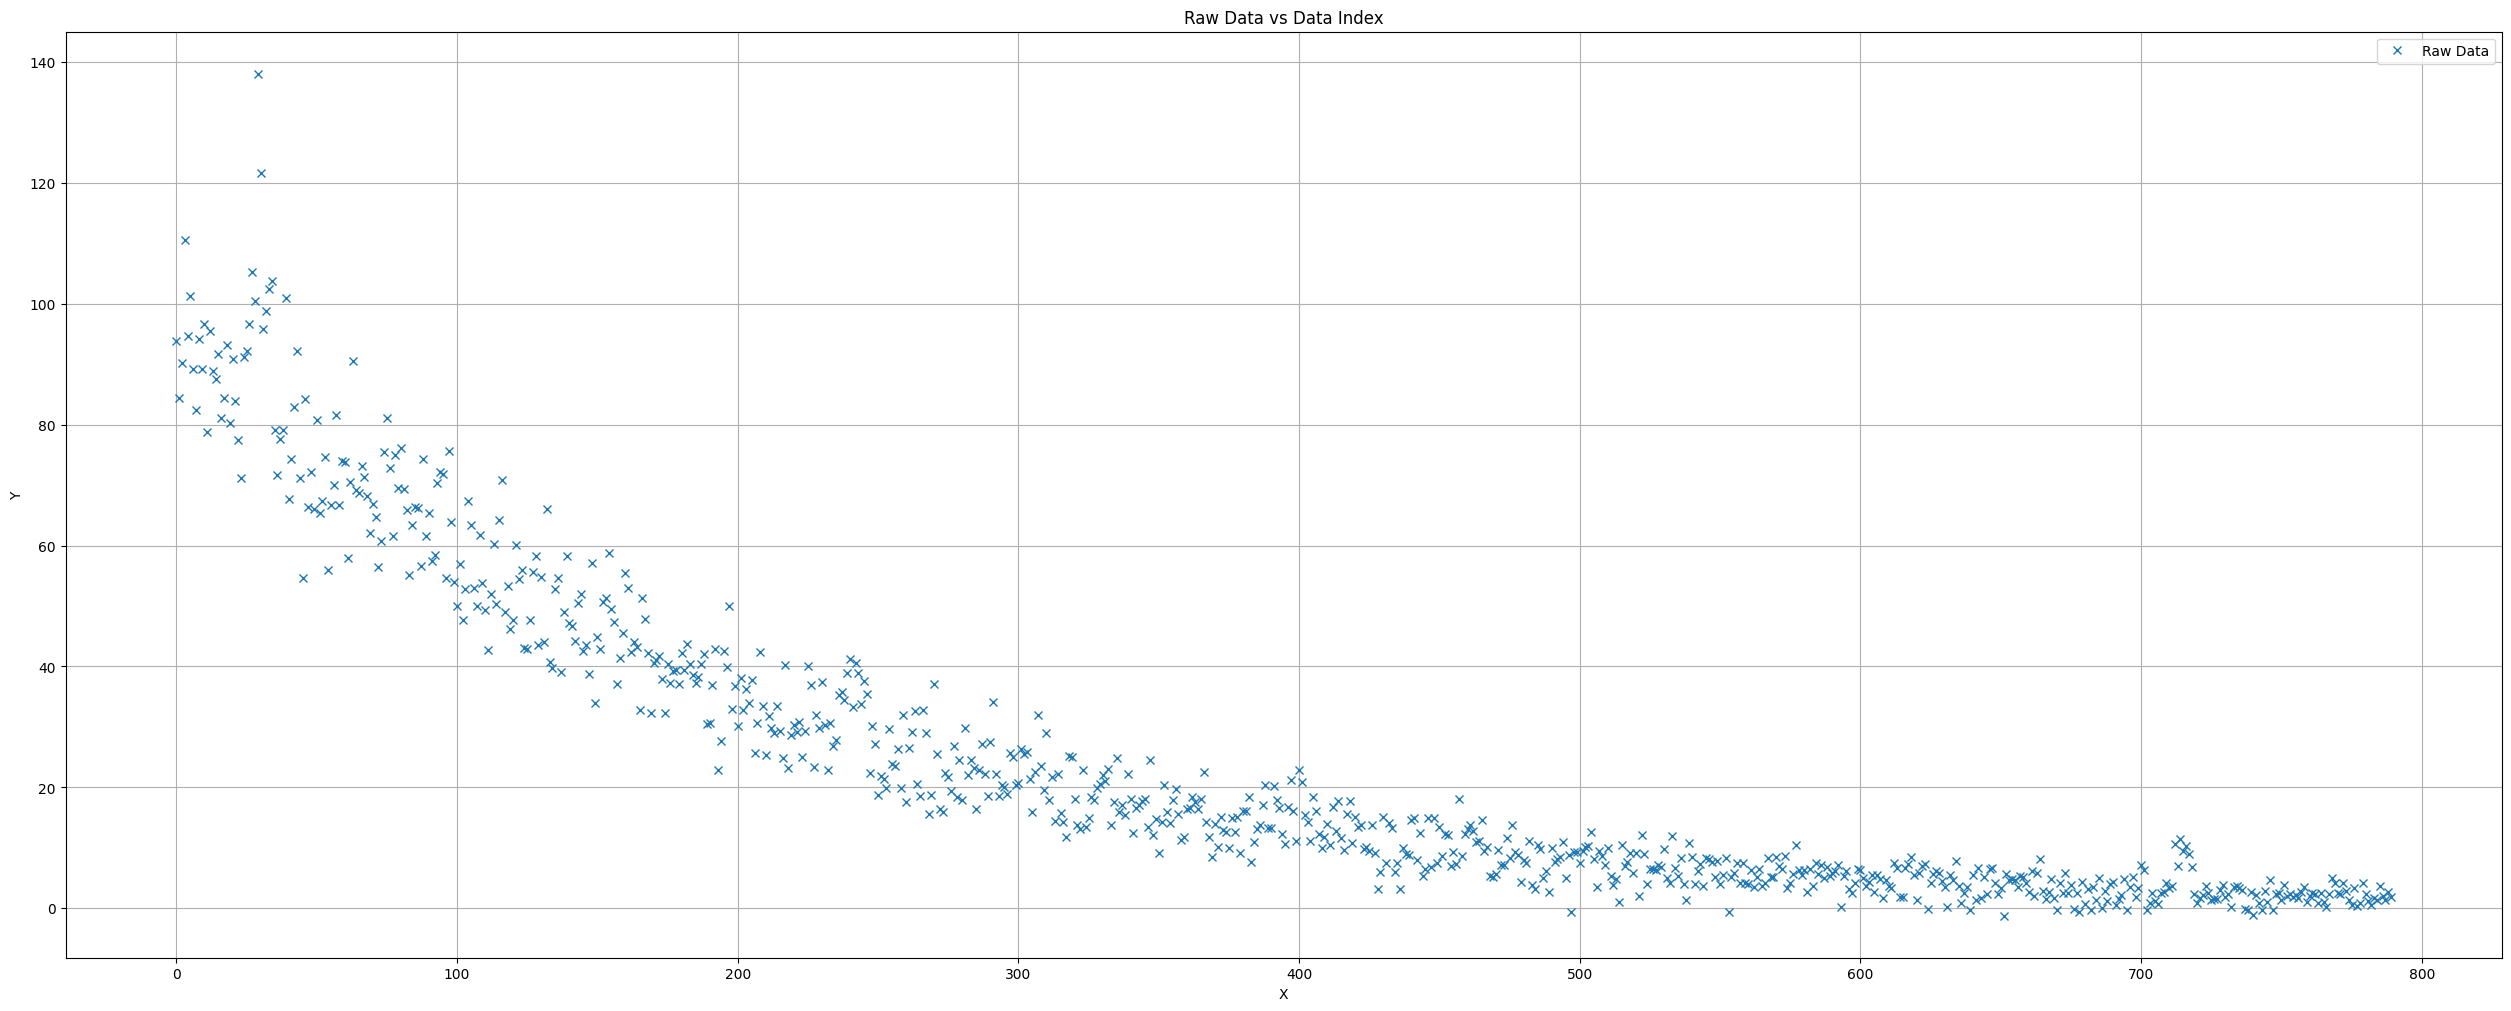

In [7]:
# @title Import and Plot Data, Rescale Plot
#plot data
ydata = np.array(RawData)
#print(ydata.min())
#print(type(ydata))
size = np.size(ydata)
xdata = np.arange(0, size, 1)
#print(size)
fig = plt.figure(figsize=(25, 10))#
ax = fig.add_subplot(111, xlabel="X", ylabel="Y", title="Raw Data vs Data Index")
ax.plot(xdata, ydata,'x', label="Raw Data")
plt.grid()
plt.legend();

Standard Deviation: 25.708181060120456
Precision: 0.001513064006262478
testing something: 1.971452769592031
testing something: 2.119595659923956


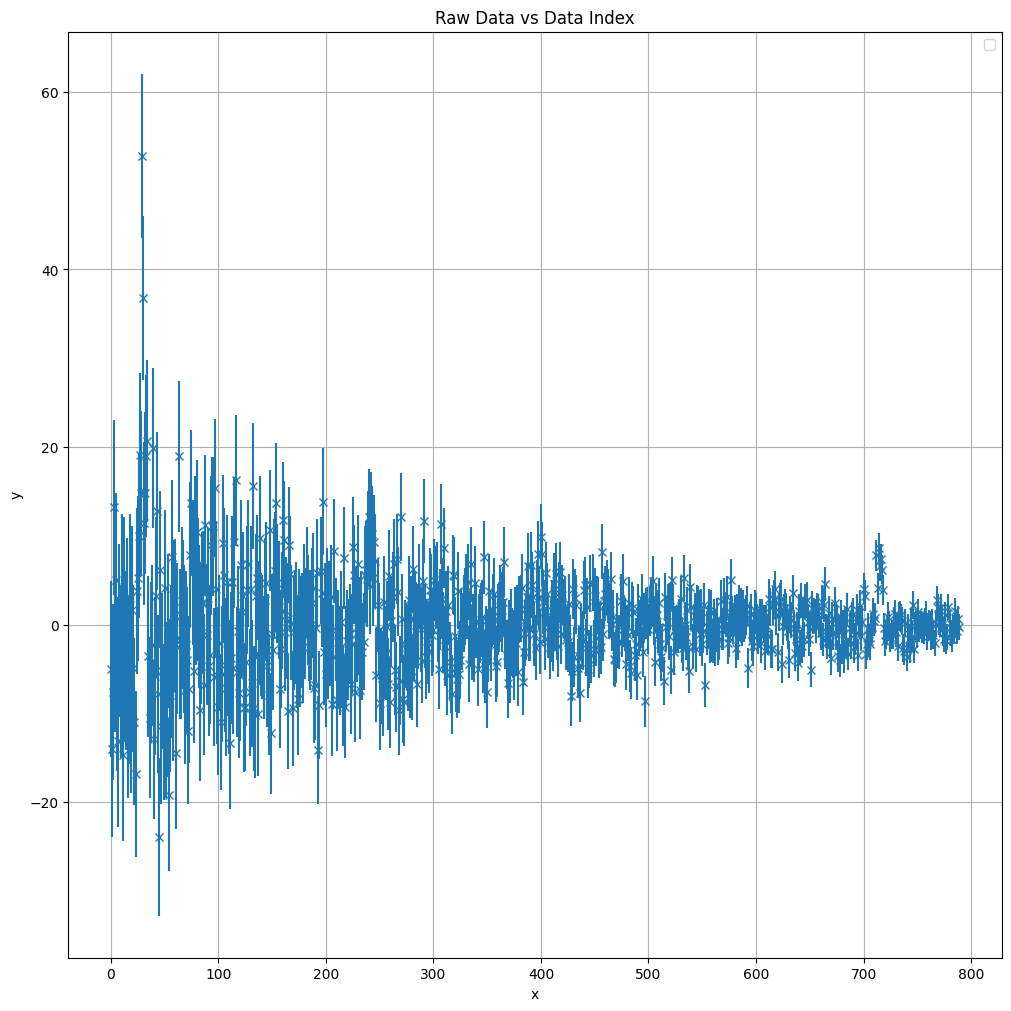

In [8]:
# @title Vissualization of data
def Model_exp(x, A, t0, B):
  ret = A*np.exp(-x/t0) + B
  return ret
#plot data
ydata = np.array(RawData)
size = np.size(ydata)
xdata = np.arange(0, size, 1)
ydata = ydata
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Raw Data vs Data Index")
#ax.plot(xdata, ydata - Model_exp(xdata, 95.06, 198.35, 0.126), label="Raw Data")
ax.errorbar(xdata,
            ydata-Model_exp(xdata, 98.54028, 194.67769, 0.36055),
             (Model_exp(xdata, 98.46158, 195.22367, 0.31804 ))**0.5
            ,fmt='x')
plt.grid()
ax.legend();
#(Model_exp(xdata, 98.54028, 194.67769, 0.36055))**0.5
#(Model_exp(xdata, 98.46158, 195.22367, 0.31804 ))**0.5

#Model_exp(xdata, 95.06, 198.35, 0.126)

# Assuming RawData is a numpy array containing all the data points
# Extract the first 100 points
first_100_points = (ydata)
# Calculate the mean
mean = np.mean(first_100_points)
# Calculate the squared differences
squared_diff = np.square(first_100_points - mean)
# Calculate the variance
variance = np.mean(squared_diff)
# Calculate the standard deviation
standard_deviation = np.sqrt(variance)
# Calculate the precision
precision = 1 / variance

print("Standard Deviation:", standard_deviation)
print("Precision:", precision)
print("testing something:", ((Model_exp(xdata, 98.54028, 194.67769, 0.36055))**0.5)[600:700].mean())
print("testing something:", ((((ydata-Model_exp(xdata, 98.54028, 194.67769, 0.36055))**2))[600:700].mean())**0.5)



In [ ]:
# @title Decaying Exponential: logML_exp
#decaying exponential A*exp(-t/tau)+b
def Model_exp(x, A, t0, B):
  ret = B
  ret = ret + A*np.exp(-x/t0)
  return ret

@as_op(itypes=[pt.dscalar, pt.dscalar, pt.dscalar],otypes=[pt.dvector])
def MyModel_exp(amp, t0, b):
    xvalues = np.arange(0, size, 1)
    mean_array = Model_exp(xvalues, amp, t0, b)
    return np.array(mean_array)

with pm.Model() as model_exp_1:
    # Prior on the Amp, t0 of Signal
    Amp = pm.Normal('A', 98.46158,  1.14220)
    t0 = pm.Normal('t0', 195.22367,  3.25328)
    b = pm.Normal('b', 0.31804,  0.22330)
    mu=MyModel_exp(Amp, t0, b)
    sigma = (Model_exp(xdata, 98.54028, 194.67769, 0.36055))**0.5 #5.6
    # Likelihood Normal
    y = pm.Normal("y", mu=mu, sigma=sigma,observed = ydata)

#SMC extract the Marginal Log Likelihood P(M|D)
draws = 20000
with model_exp_1:
    trace_SMC_like = pm.sample_smc(draws, chains = 1)
trace = trace_SMC_like
logML_exp = trace.sample_stats["log_marginal_likelihood"].mean().to_numpy()

         mean       sd     hdi_3%    hdi_97%
A    98.45569  0.75845   97.03858   99.88161
t0  195.19663  1.89118  191.67838  198.76349
b     0.32097  0.13993    0.06009    0.58196


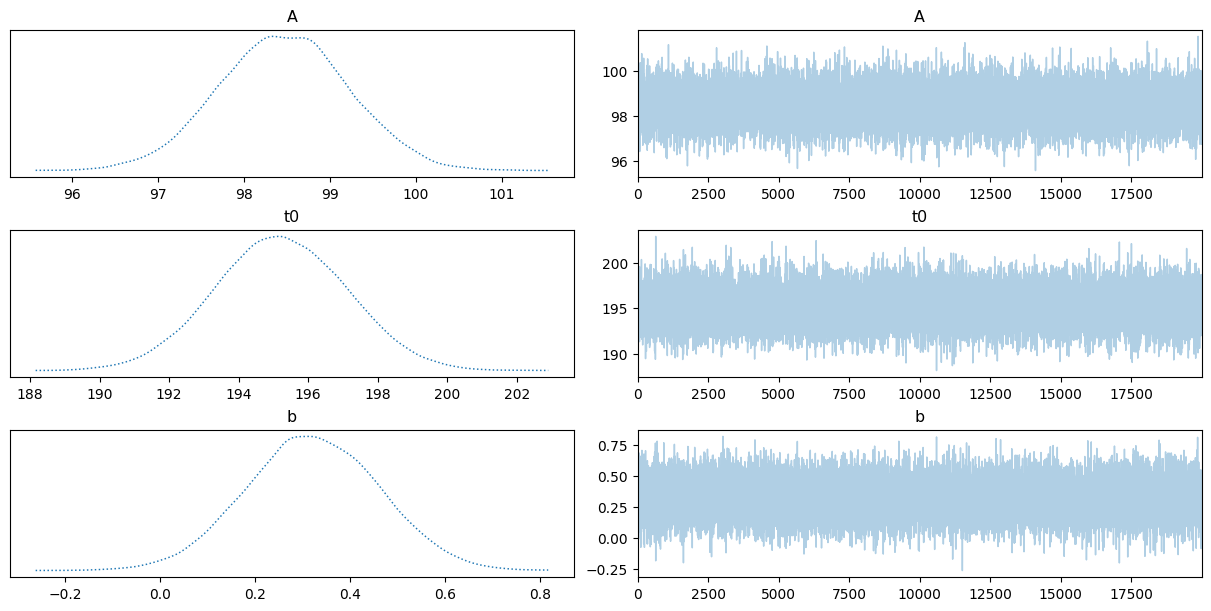

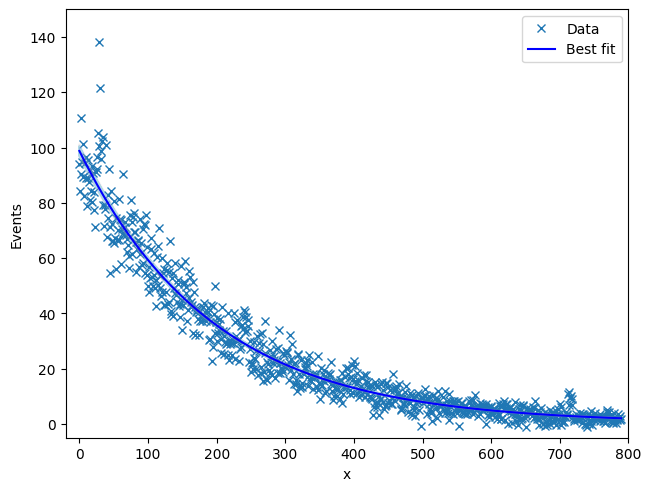

In [ ]:
# @title Decaying Exponential Fit
summary = az.summary(trace_SMC_like, var_names = ["A", "t0", "b"], round_to=5, kind="stats")
print(summary)
# Plot trace of MCMC
az.plot_trace(trace, combined=True);
# Plot the best fit on top of the data for this Model
# Visualize fit and uncertainty
# plot the data
fig, ax = plt.subplots(1, 1)
plt.plot(xdata, ydata, 'x', label="Data")
plt.ylim(-5, 150)

# Get the mean inferred values
burnin = 1000

# we have multiple chains, so only get 1
# note: we need to convert the object to a numpy array
A_t = trace["posterior"]["A"][0].to_numpy()
t0_t = trace["posterior"]["t0"][0].to_numpy()
b_t = trace["posterior"]["b"][0].to_numpy()

# Get the mean of the marginalized Posterior as the best fit estimate of the parameters
A_m = A_t.mean()
t0_m = t0_t.mean()
b_m = b_t.mean()
#print(A_m, t0_m, b_m)

# Plot all draws
draws = range(burnin, len(A_t), 10)
yvalues = Model_exp(xdata[:-1, np.newaxis], A_t[draws], t0_t[draws], b_t[draws])
plt.plot(xdata[:-1],  yvalues, c='lightblue', alpha=0.01)

# Plot the mean regression line
plt.plot(xdata, Model_exp(xdata, A_m, t0_m, b_m), c='blue', label="Best fit")

ax.set_xlim(-20, 800)
ax.set_xlabel("x");ax.set_ylabel("Events")
plt.legend(loc="upper right")
plt.show()

[-2240.217936158225, -2212.128641346663, -2211.2450400129737, -2162.9373225119257, -2162.3269976650954, -2154.9887476763474, -2148.620093313843, -2149.372296595173, -2150.015536847366, -2151.3947658862935, -2151.541623833609]
[6.031671789160995e+39, 3.8142746743463785e+27, 1.5764085471895886e+27, 1651557.2655492781, 897083.6134564689, 583.2724273285828, 2.1216695054344887, 4.036764616062896, 16.033376366968717, 18.56968699416868]


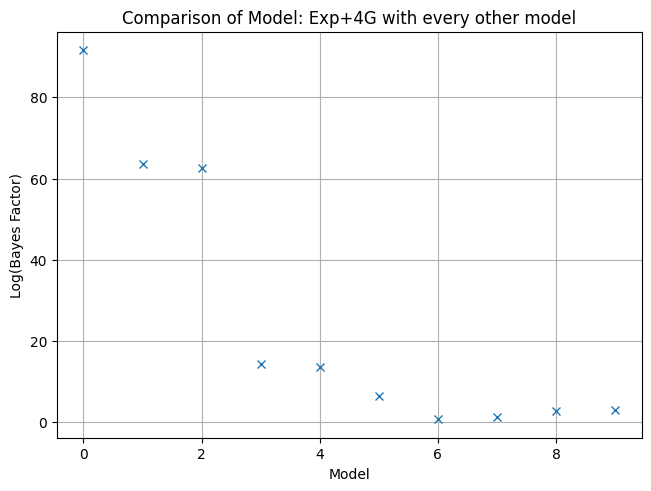

In [23]:
# @title Saving logMLs of various models
logML_exp = -2240.217936158225
logML_expG = -2212.128641346663
logML_expL = -2211.2450400129737
logML_exp2G = -2162.9373225119257
logML_expLG = -2162.3269976650954
logML_exp3G = -2154.9887476763474
logML_exp4G = -2148.620093313843
logML_exp5G = -2149.372296595173
logML_exp5G_2 = -2150.015536847366
logML_exp6G = -2151.3947658862935
logML_exp7G = -2151.541623833609
comp_logML = logML_exp4G
logMLList = [logML_exp, logML_expG, logML_expL, logML_exp2G, logML_expLG,
             logML_exp3G, logML_exp4G, logML_exp5G, logML_exp5G_2,
             logML_exp6G, logML_exp7G]
print(logMLList)
logMLList.remove(comp_logML)
BF_Comp = [np.exp(comp_logML - logML) for logML in logMLList]
print(BF_Comp)

plt.figure('Bayes Factor Comparison')
plt.plot(np.arange(0,len(BF_Comp),1), np.log(BF_Comp), 'x')
plt.xlabel('Model')
plt.ylabel('Log(Bayes Factor)')
plt.title('Comparison of Model: Exp+4G with every other model')
plt.grid()


# print(np.exp(logML_exp4G - logML_exp5G))
# print(np.exp(logML_exp4G - logML_exp5G_2))
# print(np.exp(logML_exp4G - logML_exp6G))


In [22]:
print(logML_exp7G)

-2151.541623833609


In [ ]:
# @title Exp+G: logML_expG
#decaying exponential plus gussian A*exp(-x/t0)+B +G, expanded search
def Model_expG(x, A, t0, B,
                A1, mu1, sg1):
  ret = B
  ret = ret + A*np.exp(-x/t0)
  ret = ret + A1/np.sqrt(2*np.pi*sg1**2)*np.exp(-0.5*(x-mu1)**2/sg1**2)
  return ret

@as_op(itypes=[pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar],
       otypes=[pt.dvector])
def Model_expG_Vector(A, t0, B,
                       A1, mu1, sg1):
    xvalues = np.arange(0, size, 1)
    mean_array = Model_expG(xvalues, A, t0, B,
                           A1, mu1, sg1)
    return np.array(mean_array)

with pm.Model() as model01:
    # Prior on the Amp, t0, B of Signal
    A = pm.Normal("A", 98.46158,  1.14220)
    t0 = pm.Normal("t0", 195.22367,  3.25328)
    b = pm.Normal("b", 0.31804,  0.22330)
    # Priors on A, mu, sg of gaussian
    A1 = pm.Normal("A1", 204.18861,  34.02969)
    mu1 = pm.Normal("mu1", 29.52595,   0.44748)
    sg1 = pm.Normal("sg1", 2.37749,   0.49709)
    #vector evaluator
    mu = Model_expG_Vector(A, t0, b, A1, mu1, sg1)
    sigma = (Model_exp(xdata, 98.54028, 194.67769, 0.36055))**0.5 #5.6
    # Likelihood Normal
    y = pm.Normal("y", mu=mu, sigma=sigma, observed = ydata)
# We run Sequential Monte Carlo to extract the Marginal Log Likelihood P(M|D)
# But with the current version of PyMC v5 we have to use a single chain (1 CPU core)
draws = 20000
with model01:
    trace_SMC_like = pm.sample_smc(draws, chains = 1)
trace = trace_SMC_like
logML_expG = trace.sample_stats["log_marginal_likelihood"].mean().to_numpy()

          mean        sd     hdi_3%    hdi_97%
A     97.37037   0.75443   95.98444   98.81200
t0   196.42460   1.92041  192.83280  200.04157
b      0.29150   0.14013    0.03528    0.55762
A1   204.73074  23.12607  162.69445  249.87949
mu1   29.52066   0.31103   28.93336   30.10038
sg1    2.36176   0.32374    1.75913    2.97221


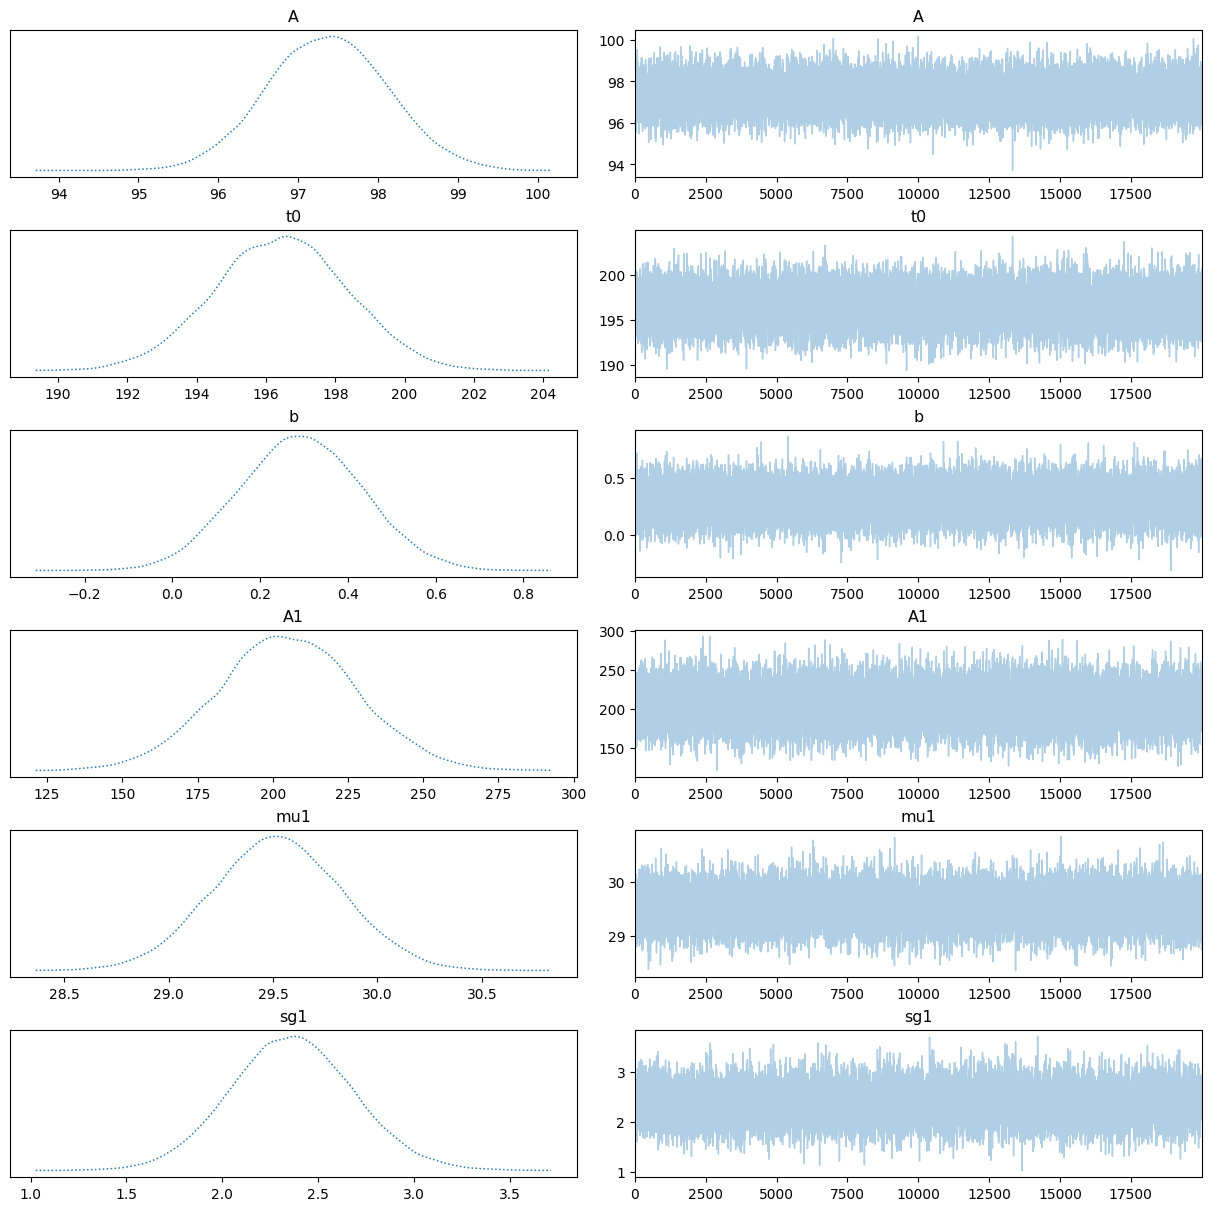

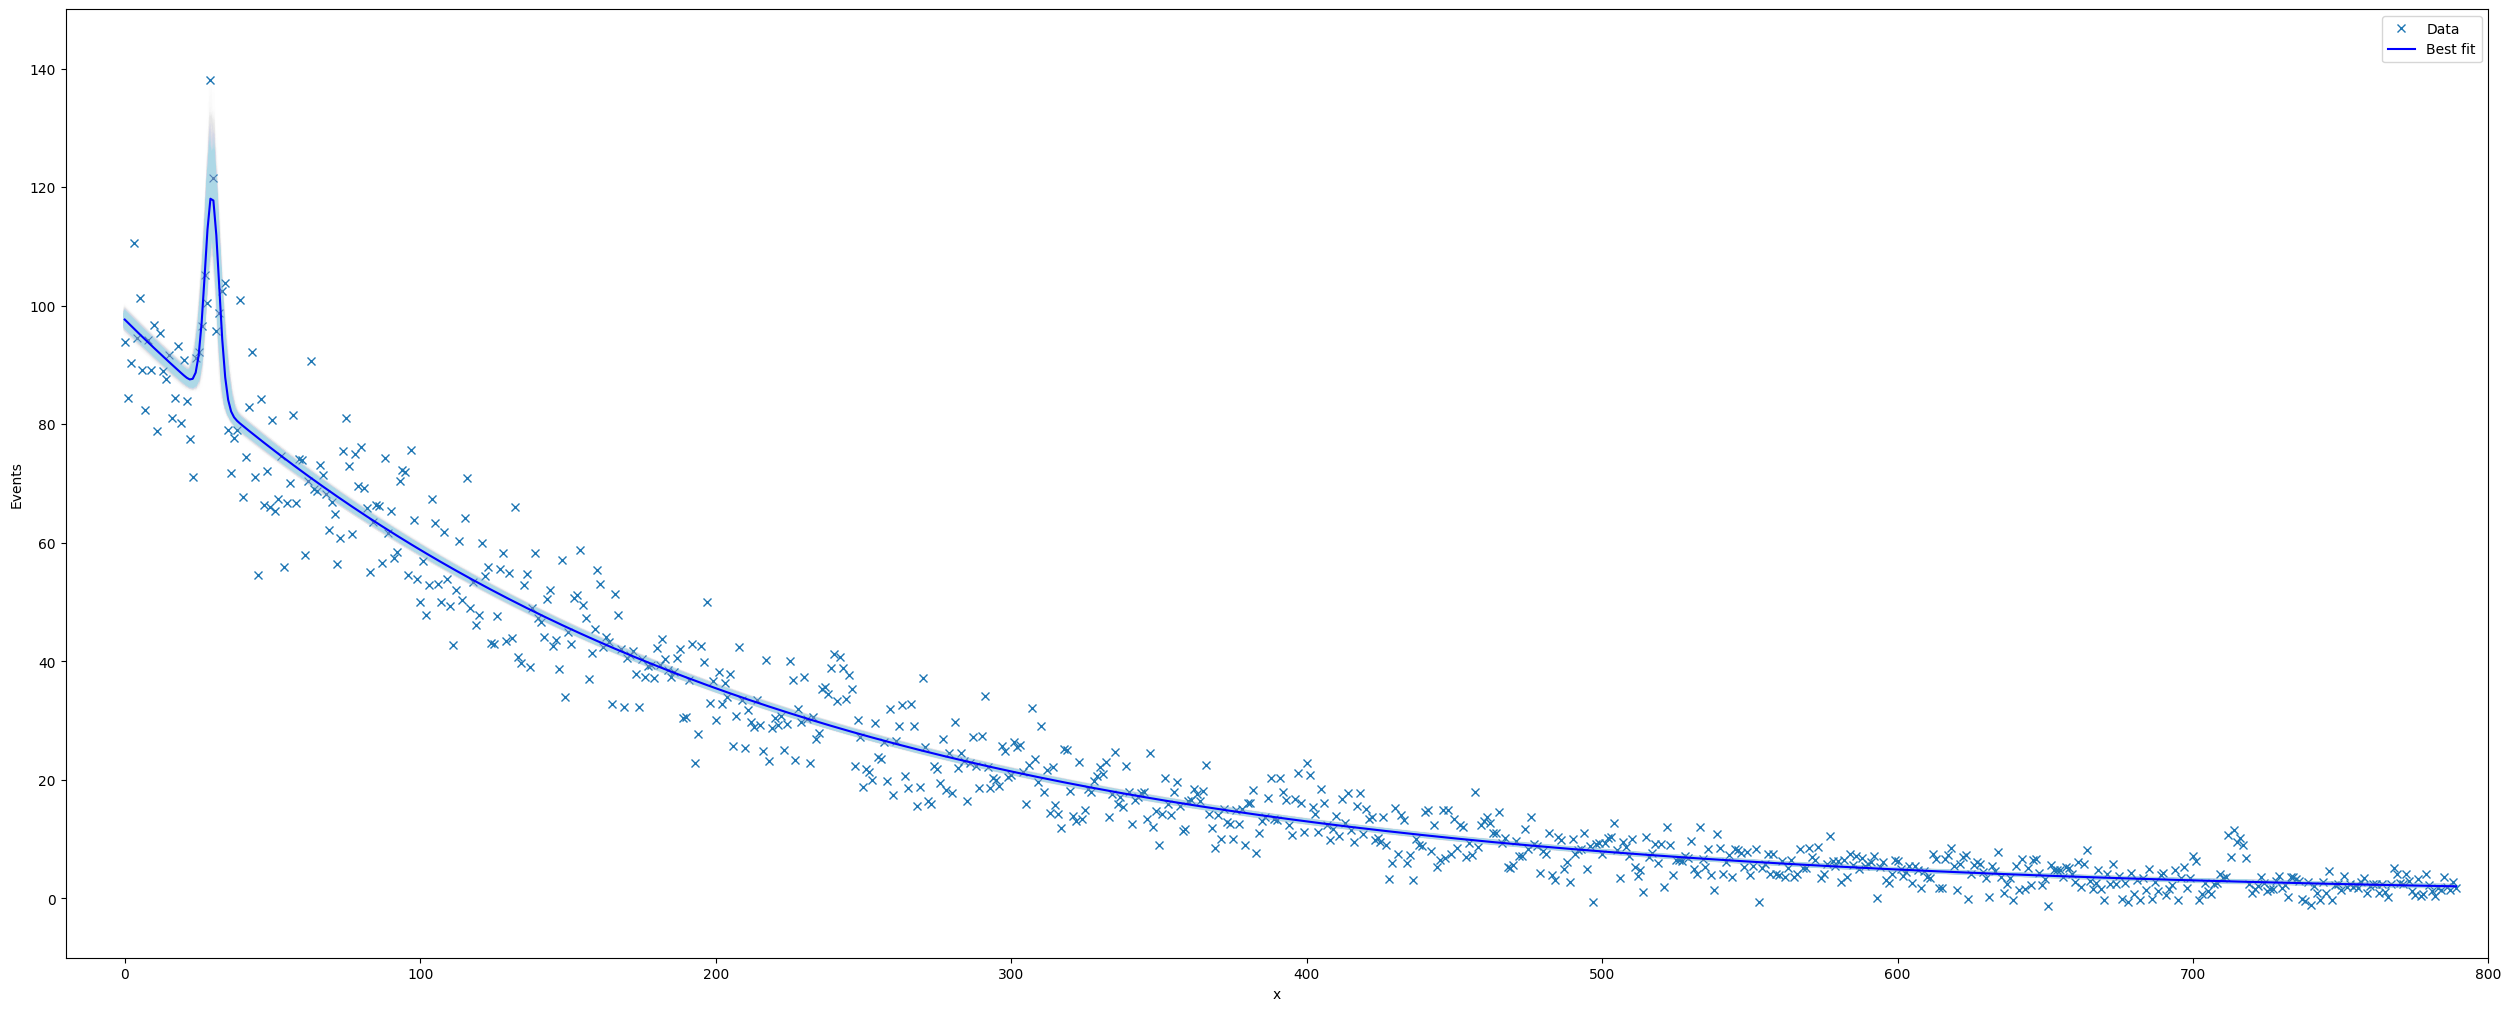

In [ ]:
# @title Exp+G
#summary
summary = az.summary(trace_SMC_like, var_names=["A", "t0", "b",
                                                "A1", "mu1", "sg1"], round_to=5, kind="stats")
print(summary)
# Plot trace of MCMC
az.plot_trace(trace, combined=True);

# Plot the best fit on top of the data for this Model
# Visualize fit and uncertainty
# plot the data
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
plt.plot(xdata, ydata, 'x',label="Data")
plt.ylim(-10, 150)

# Get the mean inferred values
burnin = 1000

# we have multiple chains, so only get 1
# note: we need to convert the object to a numpy array
A_t = trace["posterior"]["A"][0].to_numpy()
t0_t = trace["posterior"]["t0"][0].to_numpy()
b_t = trace["posterior"]["b"][0].to_numpy()
A1_t = trace["posterior"]["A1"][0].to_numpy()
mu1_t = trace["posterior"]["mu1"][0].to_numpy()
sg1_t = trace["posterior"]["sg1"][0].to_numpy()

# Get the mean of the marginalized Posterior as the best fit estimate of the parameters
A_m = A_t.mean()
t0_m = t0_t.mean()
b_m = b_t.mean()
A1_m = A1_t.mean()
mu1_m = mu1_t.mean()
sg1_m = sg1_t.mean()

# Plot all draws
draws = range(burnin, len(A_t), 10)
yvalues = Model_expG(xdata[:-1, np.newaxis], A_t[draws], t0_t[draws], b_t[draws],
                      A1_t[draws], mu1_t[draws], sg1_t[draws])
plt.plot(xdata[:-1],  yvalues, c='lightblue', alpha=0.01)

# Plot the mean regression line
plt.plot(xdata, Model_expG(xdata, A_m, t0_m, b_m,
                            A1_m, mu1_m, sg1_m
                            ), c='blue', label="Best fit")

ax.set_xlim(-20, 800)
ax.set_xlabel("x");ax.set_ylabel("Events")
plt.legend(loc="upper right")
plt.show()

In [ ]:
# @title Comparing exp vs expG
print(logML_expG)
np.exp(logML_expG-logML_exp)

-2218.6220336000397


5100260937429.96

In [ ]:
# @title Exp+L: logML_expL
#decaying exponential plus gussian A*exp(-x/t0)+B +L
def Model_expL(x, A, t0, B,
                A1, mu1, sg1):
  ret = B
  ret = ret + A*np.exp(-x/t0)
  ret = ret + A1/np.pi * (sg1/2)/((x-mu1)**2 +(sg1/2)**2)
  return ret

@as_op(itypes=[pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar],
       otypes=[pt.dvector])
def Model_expL_Vector(A, t0, B,
                       A1, mu1, sg1):
    xvalues = np.arange(0, size, 1)
    mean_array = Model_expL(xvalues, A, t0, B,
                           A1, mu1, sg1)
    return np.array(mean_array)

with pm.Model() as model01:
    # Prior on the Amp, t0, B of Signal
    A = pm.Normal("A", 98.46158,  1.14220)
    t0 = pm.Normal("t0", 195.22367,  3.25328)
    b = pm.Normal("b", 0.31804,  0.22330)
    # Priors on A, mu, sg of gaussian
    A1 = pm.Normal("A1", 213.32379,  38.14712)
    mu1 = pm.Normal("mu1", 29.31478,   0.25215)
    sg1 = pm.Normal("sg1", 2.88156,   0.81197)
    #vector evaluator
    mu = Model_expL_Vector(A, t0, b, A1, mu1, sg1)
    sigma = (Model_exp(xdata, 98.54028, 194.67769, 0.36055))**0.5 #5.6
    # Likelihood Normal
    y = pm.Normal("y", mu=mu, sigma=sigma, observed = ydata)
# We run Sequential Monte Carlo to extract the Marginal Log Likelihood P(M|D)
# But with the current version of PyMC v5 we have to use a single chain (1 CPU core)
draws = 20000
with model01:
    trace_SMC_like = pm.sample_smc(draws, chains = 1)
trace = trace_SMC_like
logML_expL = trace.sample_stats["log_marginal_likelihood"].mean().to_numpy()

          mean        sd     hdi_3%    hdi_97%
A     97.35229   0.76691   95.93274   98.81663
t0   196.45110   1.93138  192.76084  200.01218
b      0.28968   0.14129    0.02567    0.55416
A1   213.09211  25.97884  165.06238  262.98046
mu1   29.30999   0.16961   28.98884   29.62890
sg1    2.78721   0.53023    1.81898    3.79468


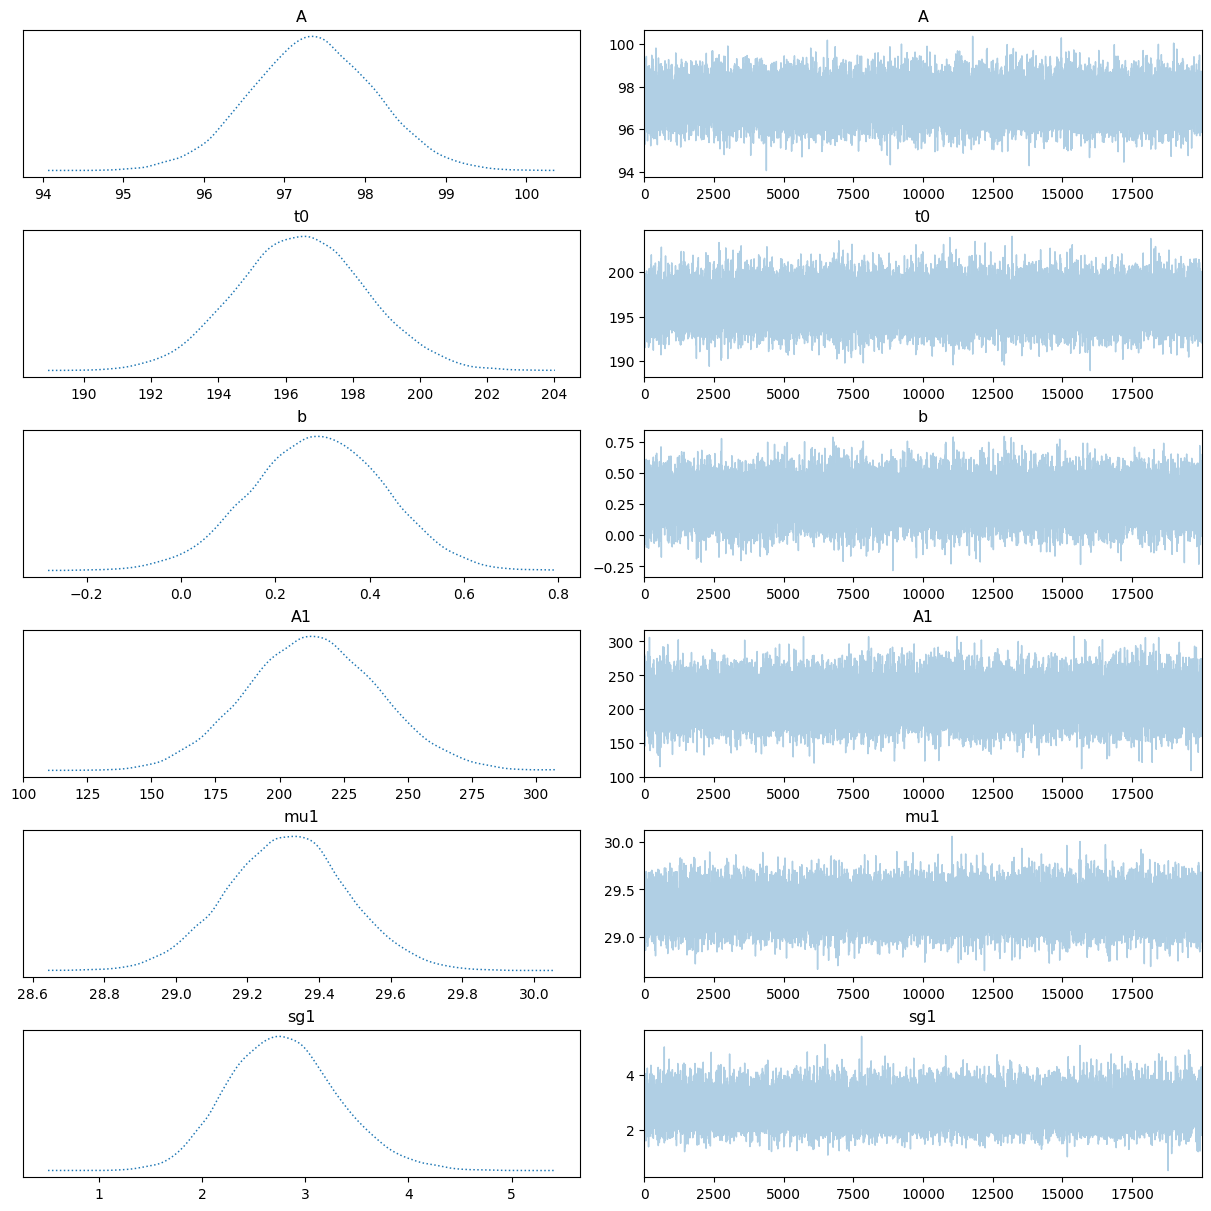

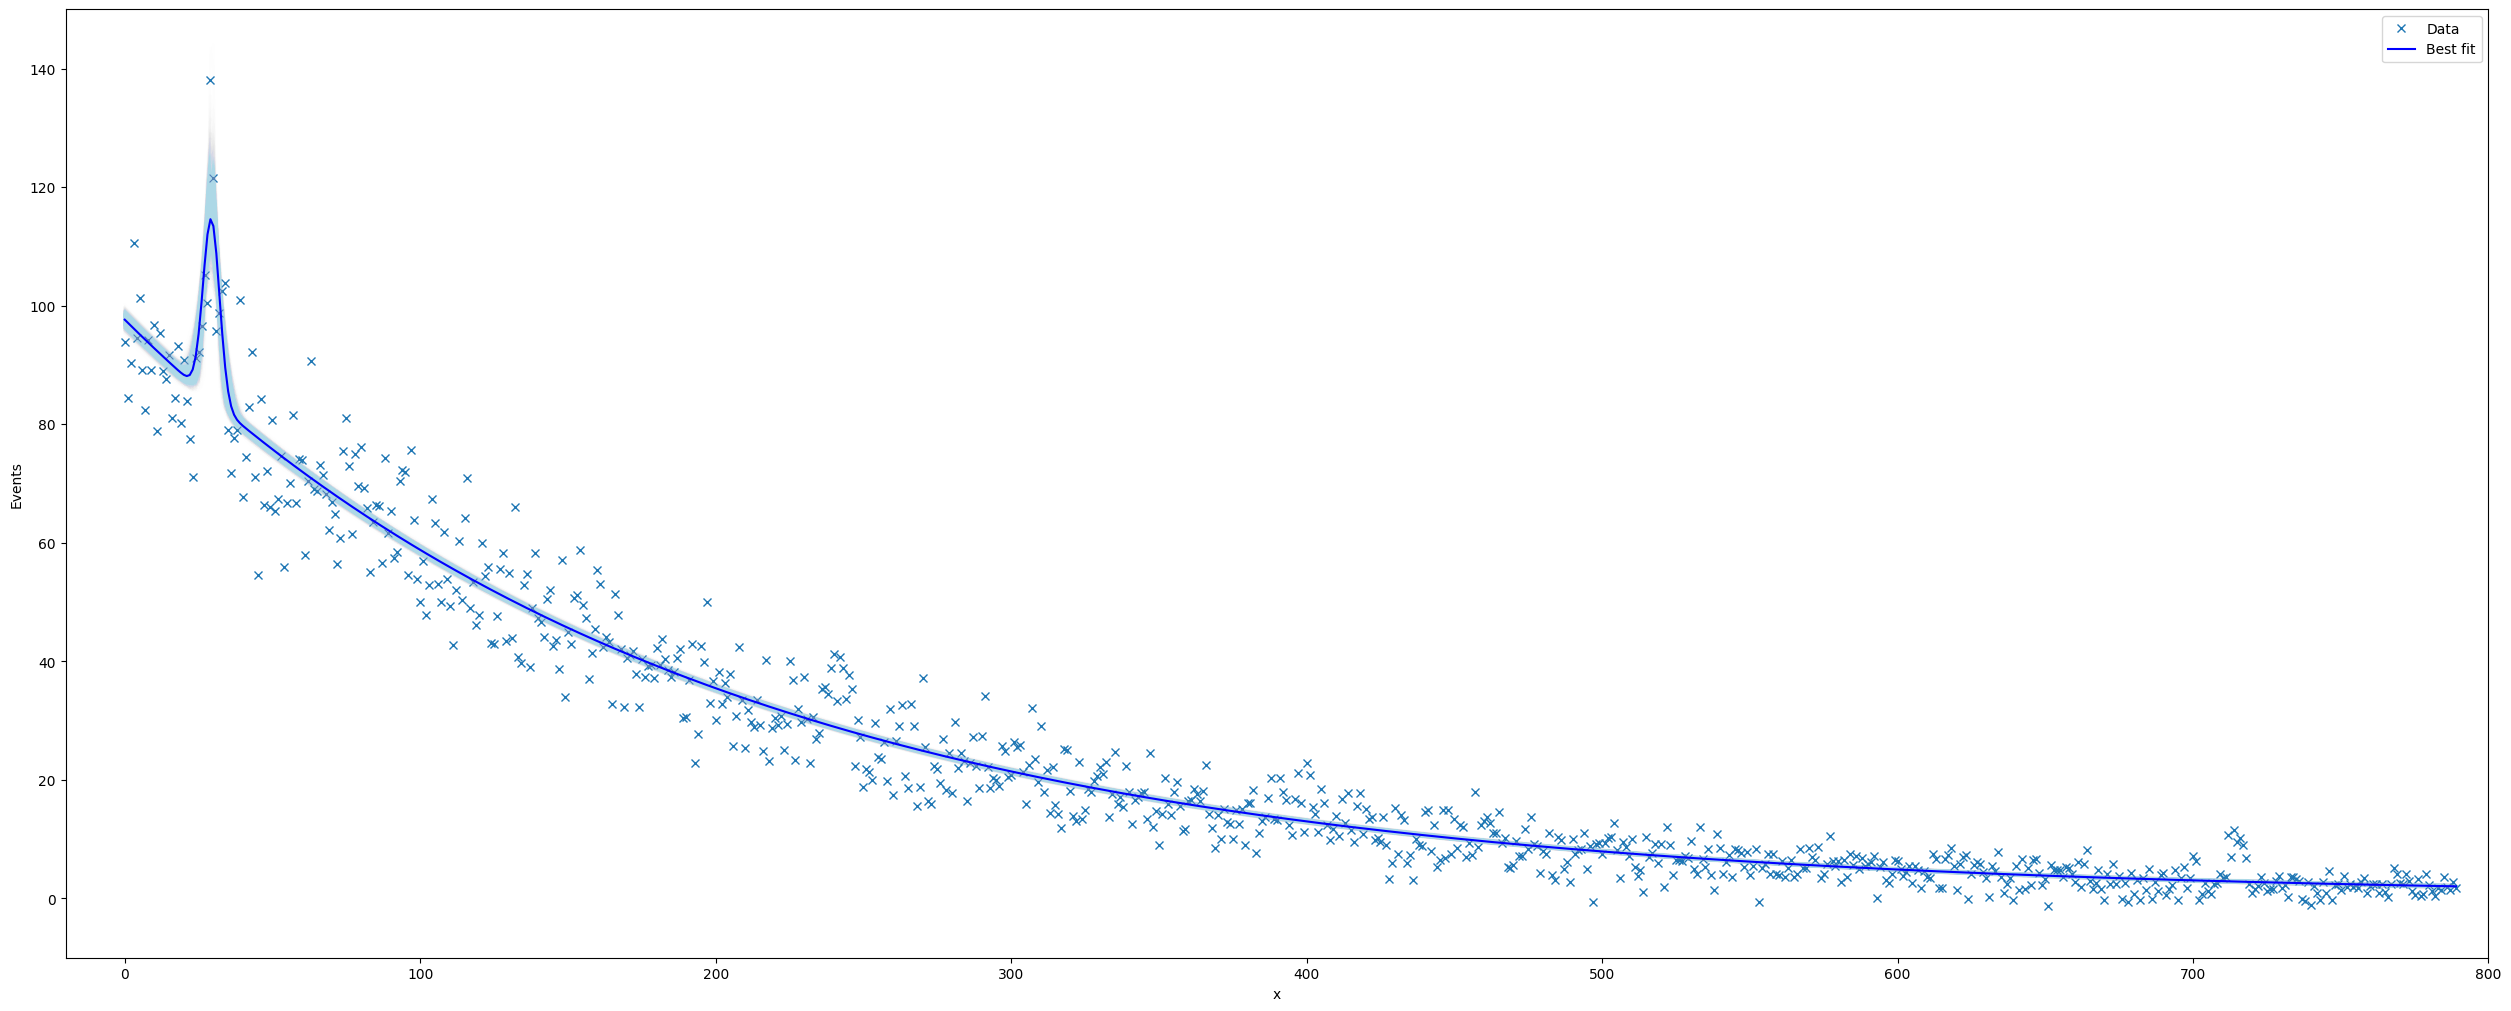

In [ ]:
# @title Exp+L
#summary
summary = az.summary(trace_SMC_like, var_names=["A", "t0", "b",
                                                "A1", "mu1", "sg1"], round_to=5, kind="stats")
print(summary)
# Plot trace of MCMC
az.plot_trace(trace, combined=True);

# Plot the best fit on top of the data for this Model
# Visualize fit and uncertainty
# plot the data
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
plt.plot(xdata, ydata, 'x',label="Data")
plt.ylim(-10, 150)

# Get the mean inferred values
burnin = 1000

# we have multiple chains, so only get 1
# note: we need to convert the object to a numpy array
A_t = trace["posterior"]["A"][0].to_numpy()
t0_t = trace["posterior"]["t0"][0].to_numpy()
b_t = trace["posterior"]["b"][0].to_numpy()
A1_t = trace["posterior"]["A1"][0].to_numpy()
mu1_t = trace["posterior"]["mu1"][0].to_numpy()
sg1_t = trace["posterior"]["sg1"][0].to_numpy()

# Get the mean of the marginalized Posterior as the best fit estimate of the parameters
A_m = A_t.mean()
t0_m = t0_t.mean()
b_m = b_t.mean()
A1_m = A1_t.mean()
mu1_m = mu1_t.mean()
sg1_m = sg1_t.mean()

# Plot all draws
draws = range(burnin, len(A_t), 10)
yvalues = Model_expG(xdata[:-1, np.newaxis], A_t[draws], t0_t[draws], b_t[draws],
                      A1_t[draws], mu1_t[draws], sg1_t[draws])
plt.plot(xdata[:-1],  yvalues, c='lightblue', alpha=0.01)

# Plot the mean regression line
plt.plot(xdata, Model_expG(xdata, A_m, t0_m, b_m,
                            A1_m, mu1_m, sg1_m
                            ), c='blue', label="Best fit")

ax.set_xlim(-20, 800)
ax.set_xlabel("x");ax.set_ylabel("Events")
plt.legend(loc="upper right")
plt.show()

In [ ]:
# @title Comparing ExpL
print(logML_expL)
print(logML_expG)
print(np.exp(logML_expL -logML_expG))
print(np.exp(logML_expL -logML_exp))
#single gaussian modle is worse than just Exp!?

-2211.2450400129737
-2212.128641346663
2.4195978137434255
8154174548921139.0


In [ ]:
# @title Exp+2G: logML_exp2G
#decaying exponential plus gussians A*exp(-x/t0)+B +2G, expanded search
def Model_exp2G(x, A, t0, B,
                A1, mu1, sg1, A2, mu2, sg2):
  ret = B
  ret = ret + A*np.exp(-x/t0)
  ret = ret + A1/np.sqrt(2*np.pi*sg1**2)*np.exp(-0.5*(x-mu1)**2/sg1**2)
  ret = ret + A2/np.sqrt(2*np.pi*sg2**2)*np.exp(-0.5*(x-mu2)**2/sg2**2)
  return ret

@as_op(itypes=[pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar],
       otypes=[pt.dvector])
def Model_exp2G_Vector(A, t0, B,
                       A1, mu1, sg1, A2, mu2, sg2):
    xvalues = np.arange(0, size, 1)
    mean_array = Model_exp2G(xvalues, A, t0, B,
                           A1, mu1, sg1, A2, mu2, sg2)
    return np.array(mean_array)

with pm.Model() as model01:
    # Prior on the Amp, t0, B of Signal
    A = pm.Normal("A", 97.37208, 0.77439)
    t0 = pm.Normal("t0", 196.43821, 1.93603)
    b = pm.Normal("b", 0.29118, 0.14026)
    # Priors on A, mu, sg of gaussians
    A1 = pm.Normal("A1", 204.18861, 34.02969)
    mu1 = pm.Normal("mu1", 29.52595, 0.44748)
    sg1 = pm.Normal("sg1", 2.37749, 0.49709)
    A2 = pm.Normal("A2", 48.74970,   3.96356)
    mu2 = pm.Normal("mu2", 714.65319,   0.24009)
    sg2 = pm.Normal("sg2", 2.38225,   0.19807)
    #A2 = pm.Uniform("A2", lower=5, upper = 500)
    #mu2 = pm.Uniform("mu2", lower=700, upper = 750)
    #sg2 = pm.Uniform("sg2", lower=0.1, upper = 30)
    #vector evaluator
    mu=Model_exp2G_Vector(A, t0, b, A1, mu1, sg1, A2, mu2, sg2)
    sigma = (Model_exp(xdata, 98.54028, 194.67769, 0.36055))**0.5
    # Likelihood Normal
    y = pm.Normal("y", mu=mu, sigma=sigma,observed = ydata)
# We run Sequential Monte Carlo to extract the Marginal Log Likelihood P(M|D)
# But with the current version of PyMC v5 we have to use a single chain (1 CPU core)
draws = 20000
with model01:
    trace_SMC_like = pm.sample_smc(draws, chains = 1)
trace = trace_SMC_like
logML_exp2G = trace.sample_stats["log_marginal_likelihood"].mean().to_numpy()

          mean        sd     hdi_3%    hdi_97%
A     97.17457   0.59923   96.08728   98.34172
t0   196.86076   1.36216  194.24869  199.38524
b      0.16472   0.10344   -0.03403    0.35395
A1   206.11237  22.91827  161.78568  247.80884
mu1   29.52052   0.31004   28.95094   30.11755
sg1    2.36629   0.32258    1.79286    3.00606
A2    48.68312   3.15922   42.57388   54.44647
mu2  714.65409   0.19515  714.27994  715.01041
sg2    2.37124   0.15792    2.07169    2.66059


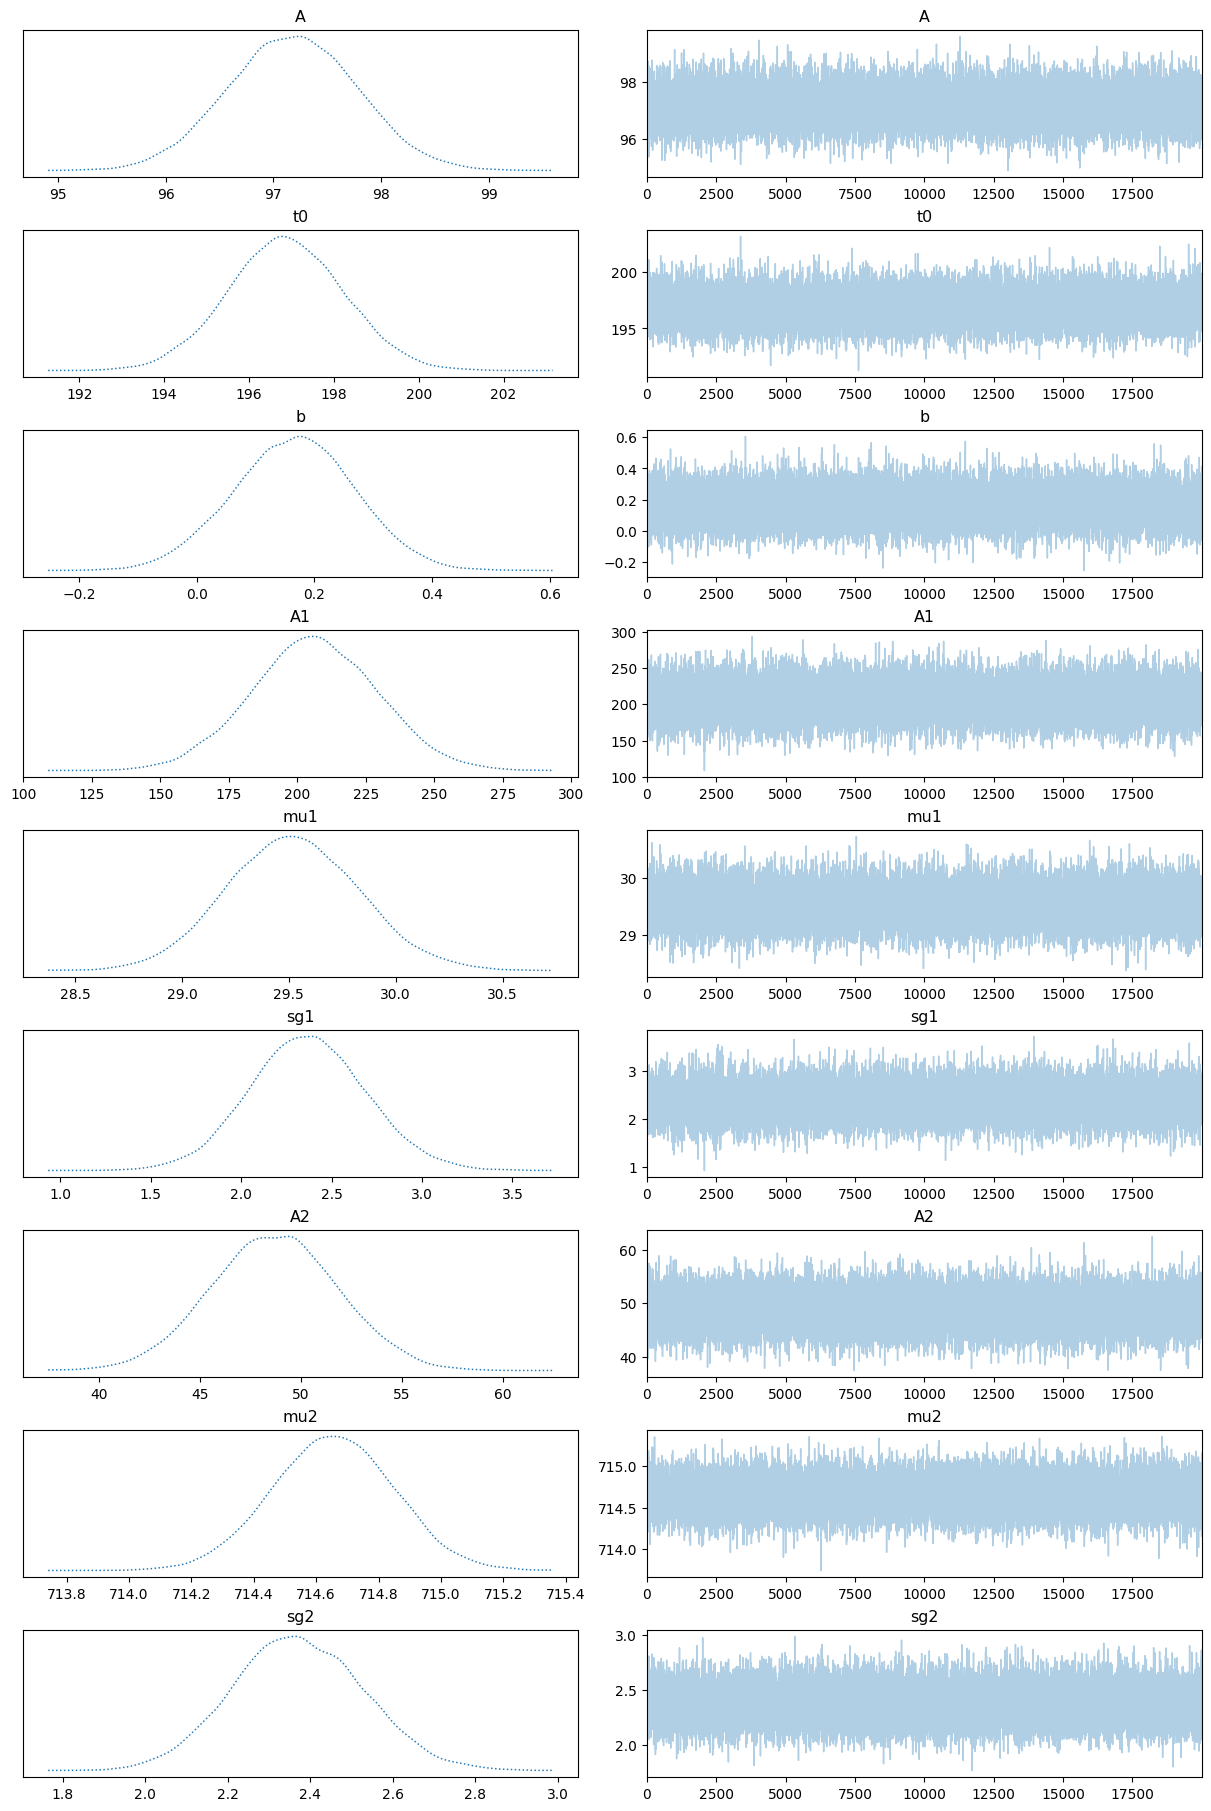

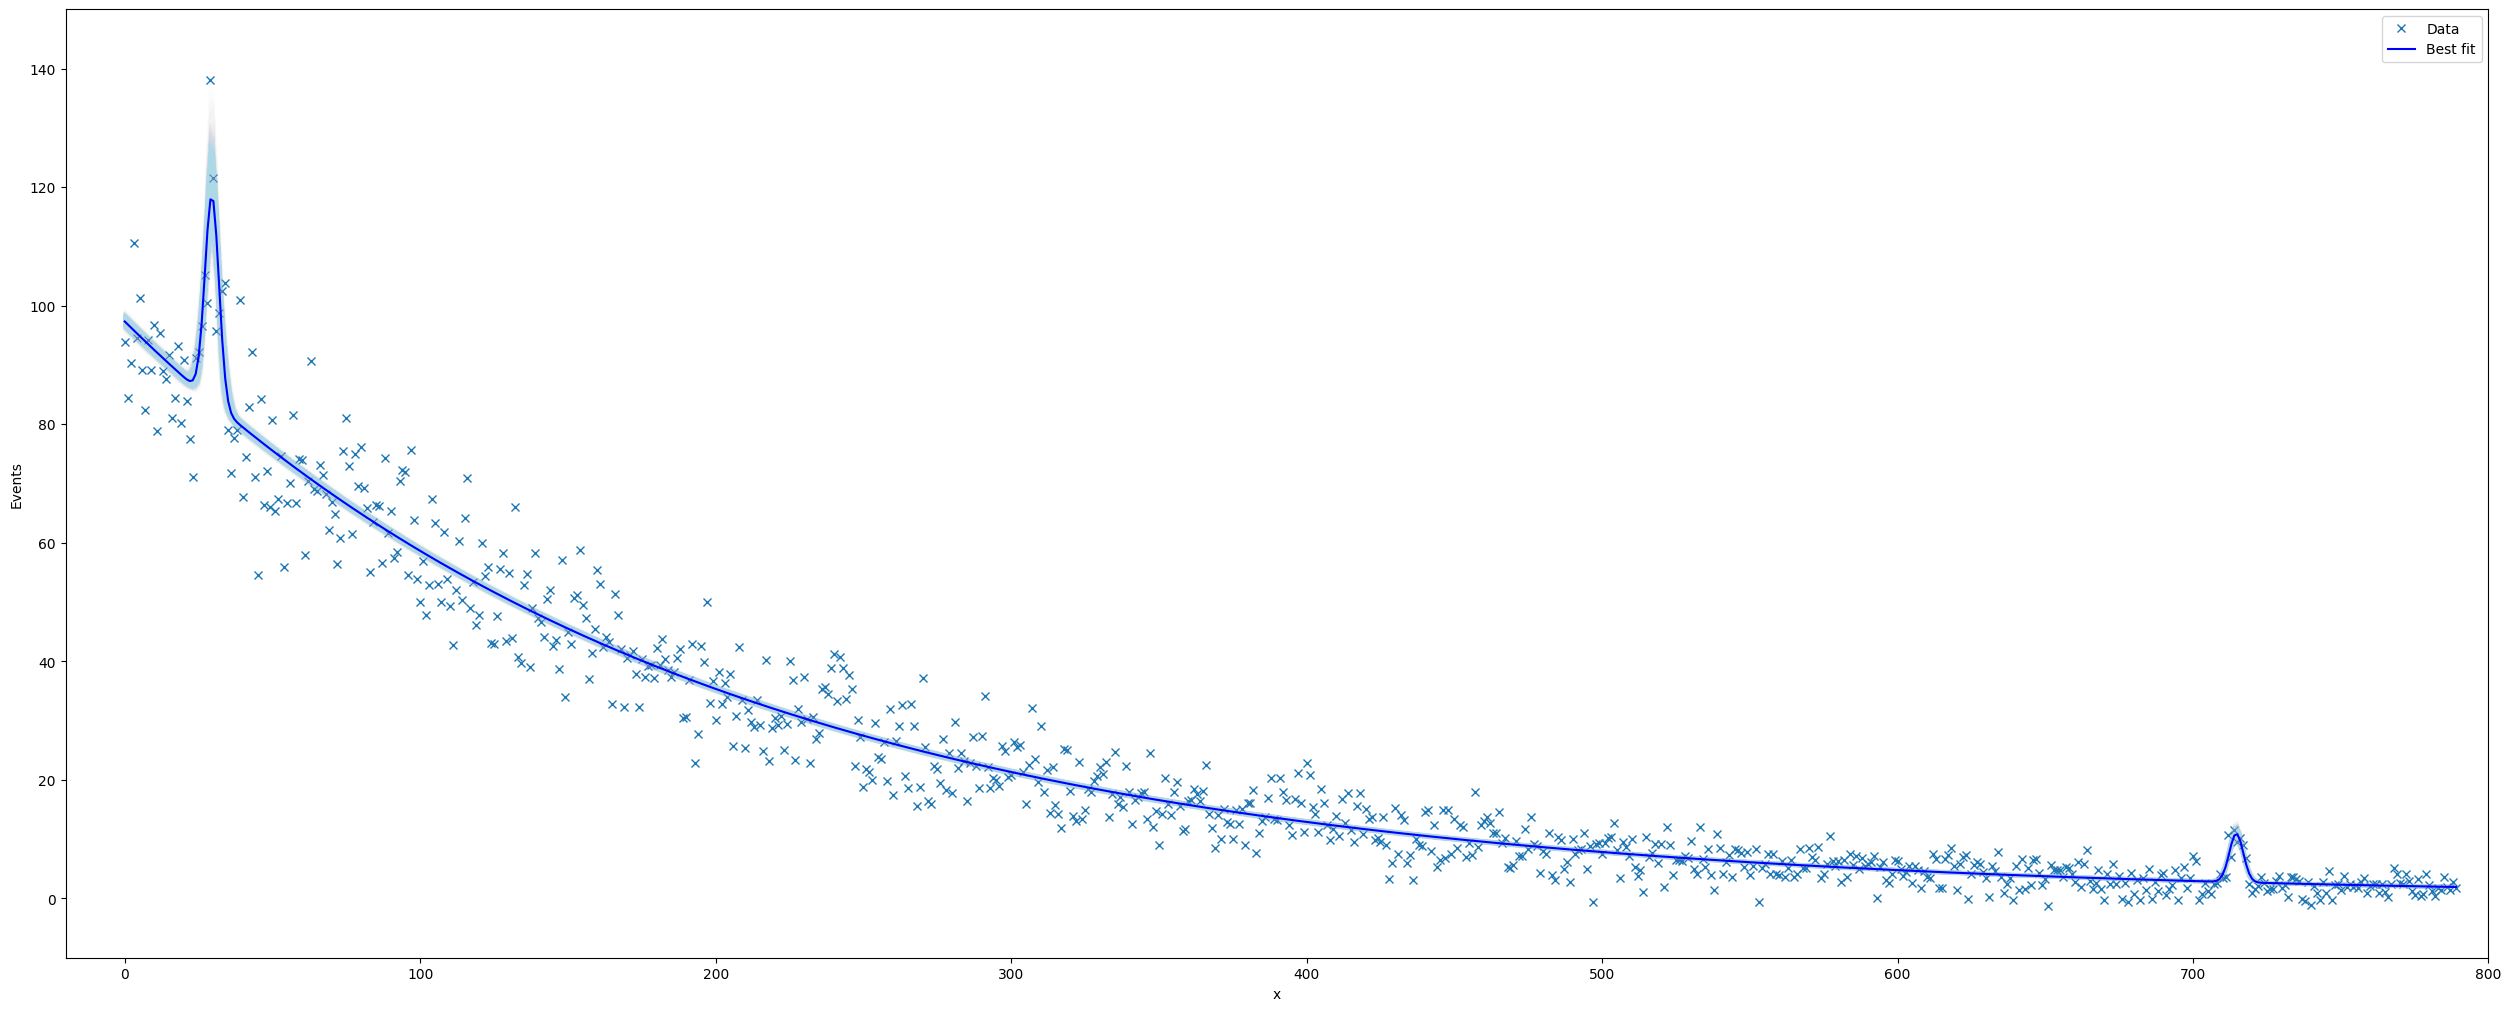

In [ ]:
# @title Exp+2G
#summary
summary = az.summary(trace_SMC_like, var_names=["A", "t0", "b",
                                                "A1", "mu1", "sg1",
                                                "A2", "mu2", "sg2"], round_to=5, kind="stats")
print(summary)
# Plot trace of MCMC
az.plot_trace(trace, combined=True);

# Plot the best fit on top of the data for this Model
# Visualize fit and uncertainty
# plot the data
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
plt.plot(xdata, ydata, 'x',label="Data")
plt.ylim(-10, 150)

# Get the mean inferred values
burnin = 1000

# we have multiple chains, so only get 1
# note: we need to convert the object to a numpy array
A_t = trace["posterior"]["A"][0].to_numpy()
t0_t = trace["posterior"]["t0"][0].to_numpy()
b_t = trace["posterior"]["b"][0].to_numpy()
A1_t = trace["posterior"]["A1"][0].to_numpy()
mu1_t = trace["posterior"]["mu1"][0].to_numpy()
sg1_t = trace["posterior"]["sg1"][0].to_numpy()
A2_t = trace["posterior"]["A2"][0].to_numpy()
mu2_t = trace["posterior"]["mu2"][0].to_numpy()
sg2_t = trace["posterior"]["sg2"][0].to_numpy()

# Get the mean of the marginalized Posterior as the best fit estimate of the parameters
A_m = A_t.mean()
t0_m = t0_t.mean()
b_m = b_t.mean()
A1_m = A1_t.mean()
mu1_m = mu1_t.mean()
sg1_m = sg1_t.mean()
A2_m = A2_t.mean()
mu2_m = mu2_t.mean()
sg2_m = sg2_t.mean()

# Plot all draws
draws = range(burnin, len(A_t), 10)
yvalues = Model_exp2G(xdata[:-1, np.newaxis], A_t[draws], t0_t[draws], b_t[draws],
                      A1_t[draws], mu1_t[draws], sg1_t[draws],
                      A2_t[draws], mu2_t[draws], sg2_t[draws])
plt.plot(xdata[:-1],  yvalues, c='lightblue', alpha=0.01)

# Plot the mean regression line
plt.plot(xdata, Model_exp2G(xdata, A_m, t0_m, b_m,
                            A1_m, mu1_m, sg1_m,
                            A2_m, mu2_m, sg2_m,
                            ), c='blue', label="Best fit")

ax.set_xlim(-20, 800)
ax.set_xlabel("x");ax.set_ylabel("Events")
plt.legend(loc="upper right")
plt.show()

In [ ]:
# @title Comparing exp2G vs expG
print(logML_exp2G)
print(np.exp(logML_exp2G - logML_expG))
print(np.exp(logML_exp2G - logML_exp))

-2162.9373225119257
2.309501919134375e+21
7.78314547265788e+36


In [ ]:
# @title Exp+LG: logML_expLG
def Model_expLG(x, A, t0, B,
                A1, mu1, sg1, A2, mu2, sg2):
  ret = B
  ret = ret + A*np.exp(-x/t0)
  ret = ret + A1/np.pi * (sg1/2)/((x-mu1)**2 +(sg1/2)**2)
  ret = ret + A2/np.sqrt(2*np.pi*sg2**2)*np.exp(-0.5*(x-mu2)**2/sg2**2)
  return ret

@as_op(itypes=[pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar],
       otypes=[pt.dvector])
def Model_expLG_Vector(A, t0, B,
                       A1, mu1, sg1, A2, mu2, sg2):
    xvalues = np.arange(0, size, 1)
    mean_array = Model_expLG(xvalues, A, t0, B,
                           A1, mu1, sg1, A2, mu2, sg2)
    return np.array(mean_array)

with pm.Model() as model01:
    # Prior on the Amp, t0, B of Signal
    A = pm.Normal("A", 98.46158,  1.14220)
    t0 = pm.Normal("t0", 195.22367,  3.25328)
    b = pm.Normal("b", 0.31804,  0.22330)
    # Priors on A, mu, sg of gaussians
    A1 = pm.Normal("A1", 212.93919,  26.23954)
    mu1 = pm.Normal("mu1", 29.30561,   0.16865)
    sg1 = pm.Normal("sg1", 2.79188,   0.53710)
    A2 = pm.Normal("A2", 48.81231,   3.17679)
    mu2 = pm.Normal("mu2", 714.65396,   0.19584)
    sg2 = pm.Normal("sg2", 2.37354,   0.15715)
    #vector evaluator
    mu=Model_expLG_Vector(A, t0, b, A1, mu1, sg1, A2, mu2, sg2)
    sigma = (Model_exp(xdata, 98.54028, 194.67769, 0.36055))**0.5
    # Likelihood Normal
    y = pm.Normal("y", mu=mu, sigma=sigma,observed = ydata)
# We run Sequential Monte Carlo to extract the Marginal Log Likelihood P(M|D)
# But with the current version of PyMC v5 we have to use a single chain (1 CPU core)
draws = 20000
with model01:
    trace_SMC_like = pm.sample_smc(draws, chains = 1)
trace = trace_SMC_like
logML_expLG = trace.sample_stats["log_marginal_likelihood"].mean().to_numpy()

          mean        sd     hdi_3%    hdi_97%
A     97.54577   0.75898   96.12034   98.95653
t0   196.93554   1.90149  193.37354  200.53514
b      0.10772   0.14076   -0.16397    0.36696
A1   212.10393  20.56293  173.89060  251.45035
mu1   29.30378   0.13349   29.05283   29.55240
sg1    2.73573   0.41143    1.98545    3.53106
A2    48.83949   2.69610   43.95198   54.08824
mu2  714.65184   0.16912  714.33959  714.97182
sg2    2.36982   0.13413    2.11118    2.61611


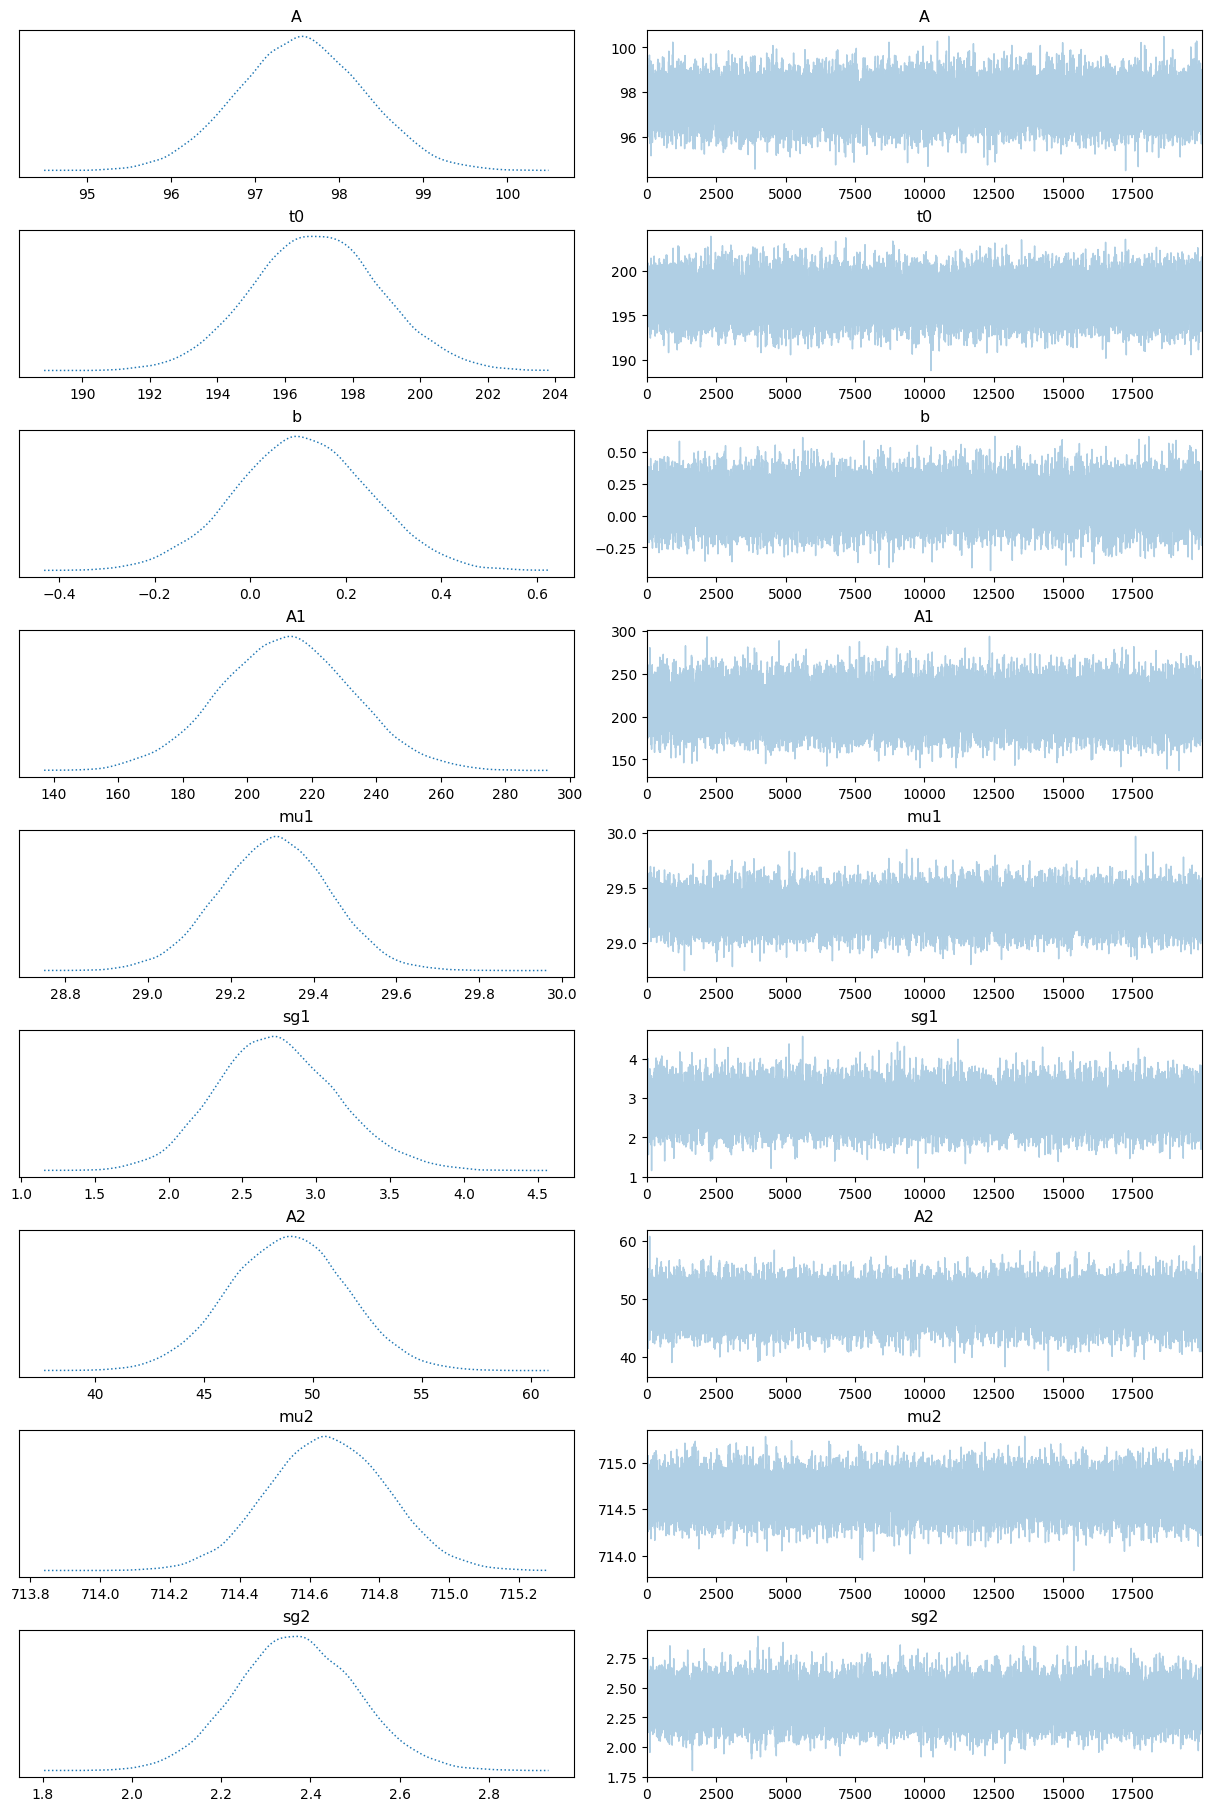

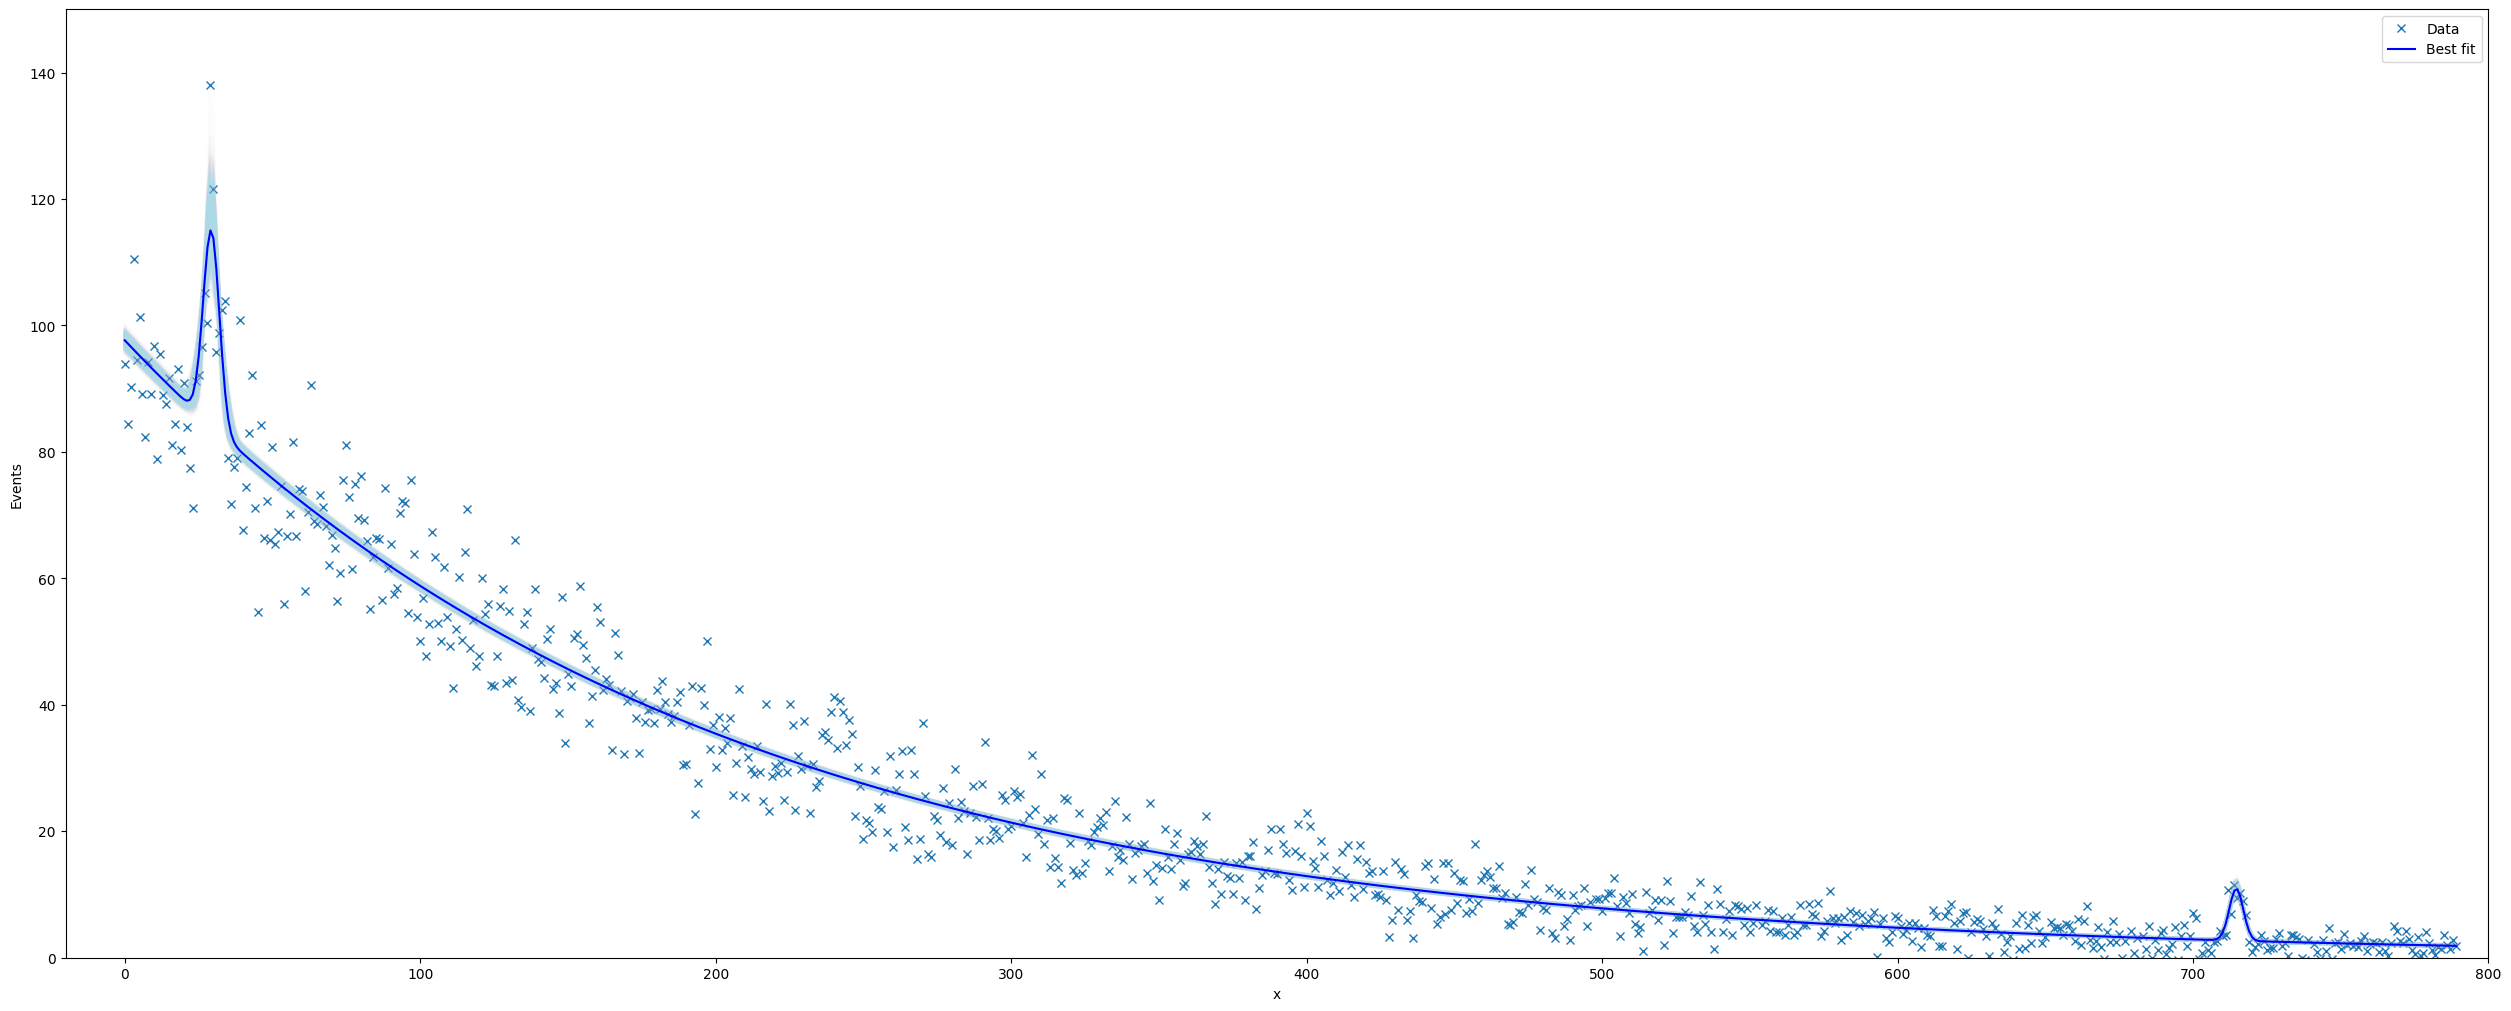

In [ ]:
# @title Exp+LG
#summary
summary = az.summary(trace_SMC_like, var_names=["A", "t0", "b",
                                                "A1", "mu1", "sg1",
                                                "A2", "mu2", "sg2"], round_to=5, kind="stats")
print(summary)
# Plot trace of MCMC
az.plot_trace(trace, combined=True);

# Plot the best fit on top of the data for this Model
# Visualize fit and uncertainty
# plot the data
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
plt.plot(xdata, ydata, 'x',label="Data")
plt.ylim(0, 150)

# Get the mean inferred values
burnin = 1000

# we have multiple chains, so only get 1
# note: we need to convert the object to a numpy array
A_t = trace["posterior"]["A"][0].to_numpy()
t0_t = trace["posterior"]["t0"][0].to_numpy()
b_t = trace["posterior"]["b"][0].to_numpy()
A1_t = trace["posterior"]["A1"][0].to_numpy()
mu1_t = trace["posterior"]["mu1"][0].to_numpy()
sg1_t = trace["posterior"]["sg1"][0].to_numpy()
A2_t = trace["posterior"]["A2"][0].to_numpy()
mu2_t = trace["posterior"]["mu2"][0].to_numpy()
sg2_t = trace["posterior"]["sg2"][0].to_numpy()

# Get the mean of the marginalized Posterior as the best fit estimate of the parameters
A_m = A_t.mean()
t0_m = t0_t.mean()
b_m = b_t.mean()
A1_m = A1_t.mean()
mu1_m = mu1_t.mean()
sg1_m = sg1_t.mean()
A2_m = A2_t.mean()
mu2_m = mu2_t.mean()
sg2_m = sg2_t.mean()

# Plot all draws
draws = range(burnin, len(A_t), 10)
yvalues = Model_exp2G(xdata[:-1, np.newaxis], A_t[draws], t0_t[draws], b_t[draws],
                      A1_t[draws], mu1_t[draws], sg1_t[draws],
                      A2_t[draws], mu2_t[draws], sg2_t[draws])
plt.plot(xdata[:-1],  yvalues, c='lightblue', alpha=0.01)

# Plot the mean regression line
plt.plot(xdata, Model_exp2G(xdata, A_m, t0_m, b_m,
                            A1_m, mu1_m, sg1_m,
                            A2_m, mu2_m, sg2_m,
                            ), c='blue', label="Best fit")

ax.set_xlim(-20, 800)
ax.set_xlabel("x");ax.set_ylabel("Events")
plt.legend(loc="upper right")
plt.show()

In [ ]:
# @title Comparing expLG vs exp2G
print(logML_expLG)
print(np.exp(logML_expLG -logML_exp2G))
print(np.exp(logML_expLG - logML_exp))

-2162.3269976650954
1.8410293542045846
1.4328999283207673e+37


In [ ]:
# @title Exp+3G: logML_exp3G
def Model_exp3G(x, A, t0, B,
                A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3):
  ret = A*np.exp(-x/t0) + B
  ret = ret + A1/np.sqrt(2*np.pi*sg1**2)*np.exp(-0.5*(x-mu1)**2/sg1**2)
  ret = ret + A2/np.sqrt(2*np.pi*sg2**2)*np.exp(-0.5*(x-mu2)**2/sg2**2)
  ret = ret + A3/np.sqrt(2*np.pi*sg3**2)*np.exp(-0.5*(x-mu3)**2/sg3**2)
  return ret

@as_op(itypes=[pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar],
       otypes=[pt.dvector])
def Model_exp3G_Vector(A, t0, B,
                       A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3):
    xvalues = np.arange(0, size, 1)
    mean_array = Model_exp3G(xvalues, A, t0, B,
                           A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3)
    return np.array(mean_array)

with pm.Model() as model01:
    # Prior on the Amp, t0, B of Signal
    A = pm.Normal('A', 98.46158,  1.14220)
    t0 = pm.Normal('t0', 195.22367,  3.25328)
    b = pm.Normal('b', 0.31804,  0.22330)
    # Priors on A, mu, sg of gaussians
    A1 = pm.Normal("A1", 204.18861, 34.02969)
    mu1 = pm.Normal("mu1", 29.52595, 0.44748)
    sg1 = pm.Normal("sg1", 2.37749, 0.49709)
    A2 = pm.Normal("A2", 48.74970,   3.96356)
    mu2 = pm.Normal("mu2", 714.65319,   0.24009)
    sg2 = pm.Normal("sg2", 2.38225,   0.19807)
    A3 = pm.Normal("A3", 86.43558,   8.35934)
    mu3 = pm.Normal("mu3", 241.37002,   0.83641)
    sg3 = pm.Normal("sg3", 3.19385,   1.46562)

    #vector evaluator
    mu=Model_exp3G_Vector(A, t0, b, A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3)
    sigma = (Model_exp(xdata, 98.54028, 194.67769, 0.36055))**0.5
    # Likelihood Normal
    y = pm.Normal("y", mu=mu, sigma=sigma, observed = ydata)
# We run Sequential Monte Carlo to extract the Marginal Log Likelihood P(M|D)
# But with the current version of PyMC v5 we have to use a single chain (1 CPU core)
draws = 20000
with model01:
    trace_SMC_like = pm.sample_smc(draws, chains = 1)
trace = trace_SMC_like
logML_exp3G = trace.sample_stats["log_marginal_likelihood"].mean().to_numpy()

          mean        sd     hdi_3%    hdi_97%
A     97.39730   0.76391   95.95088   98.81715
t0   196.14364   1.90861  192.74038  199.88669
b      0.14347   0.14078   -0.11924    0.40871
A1   205.51997  22.94245  162.29168  248.71119
mu1   29.51905   0.31395   28.94000   30.11652
sg1    2.35890   0.32208    1.73357    2.94470
A2    48.86477   3.16479   42.98460   54.96147
mu2  714.65405   0.19637  714.30030  715.03723
sg2    2.37467   0.15835    2.08262    2.67350
A3    86.11612   7.79814   71.47632  100.75551
mu3  241.27933   0.63679  240.11718  242.50766
sg3    3.30357   0.62345    2.17920    4.47421


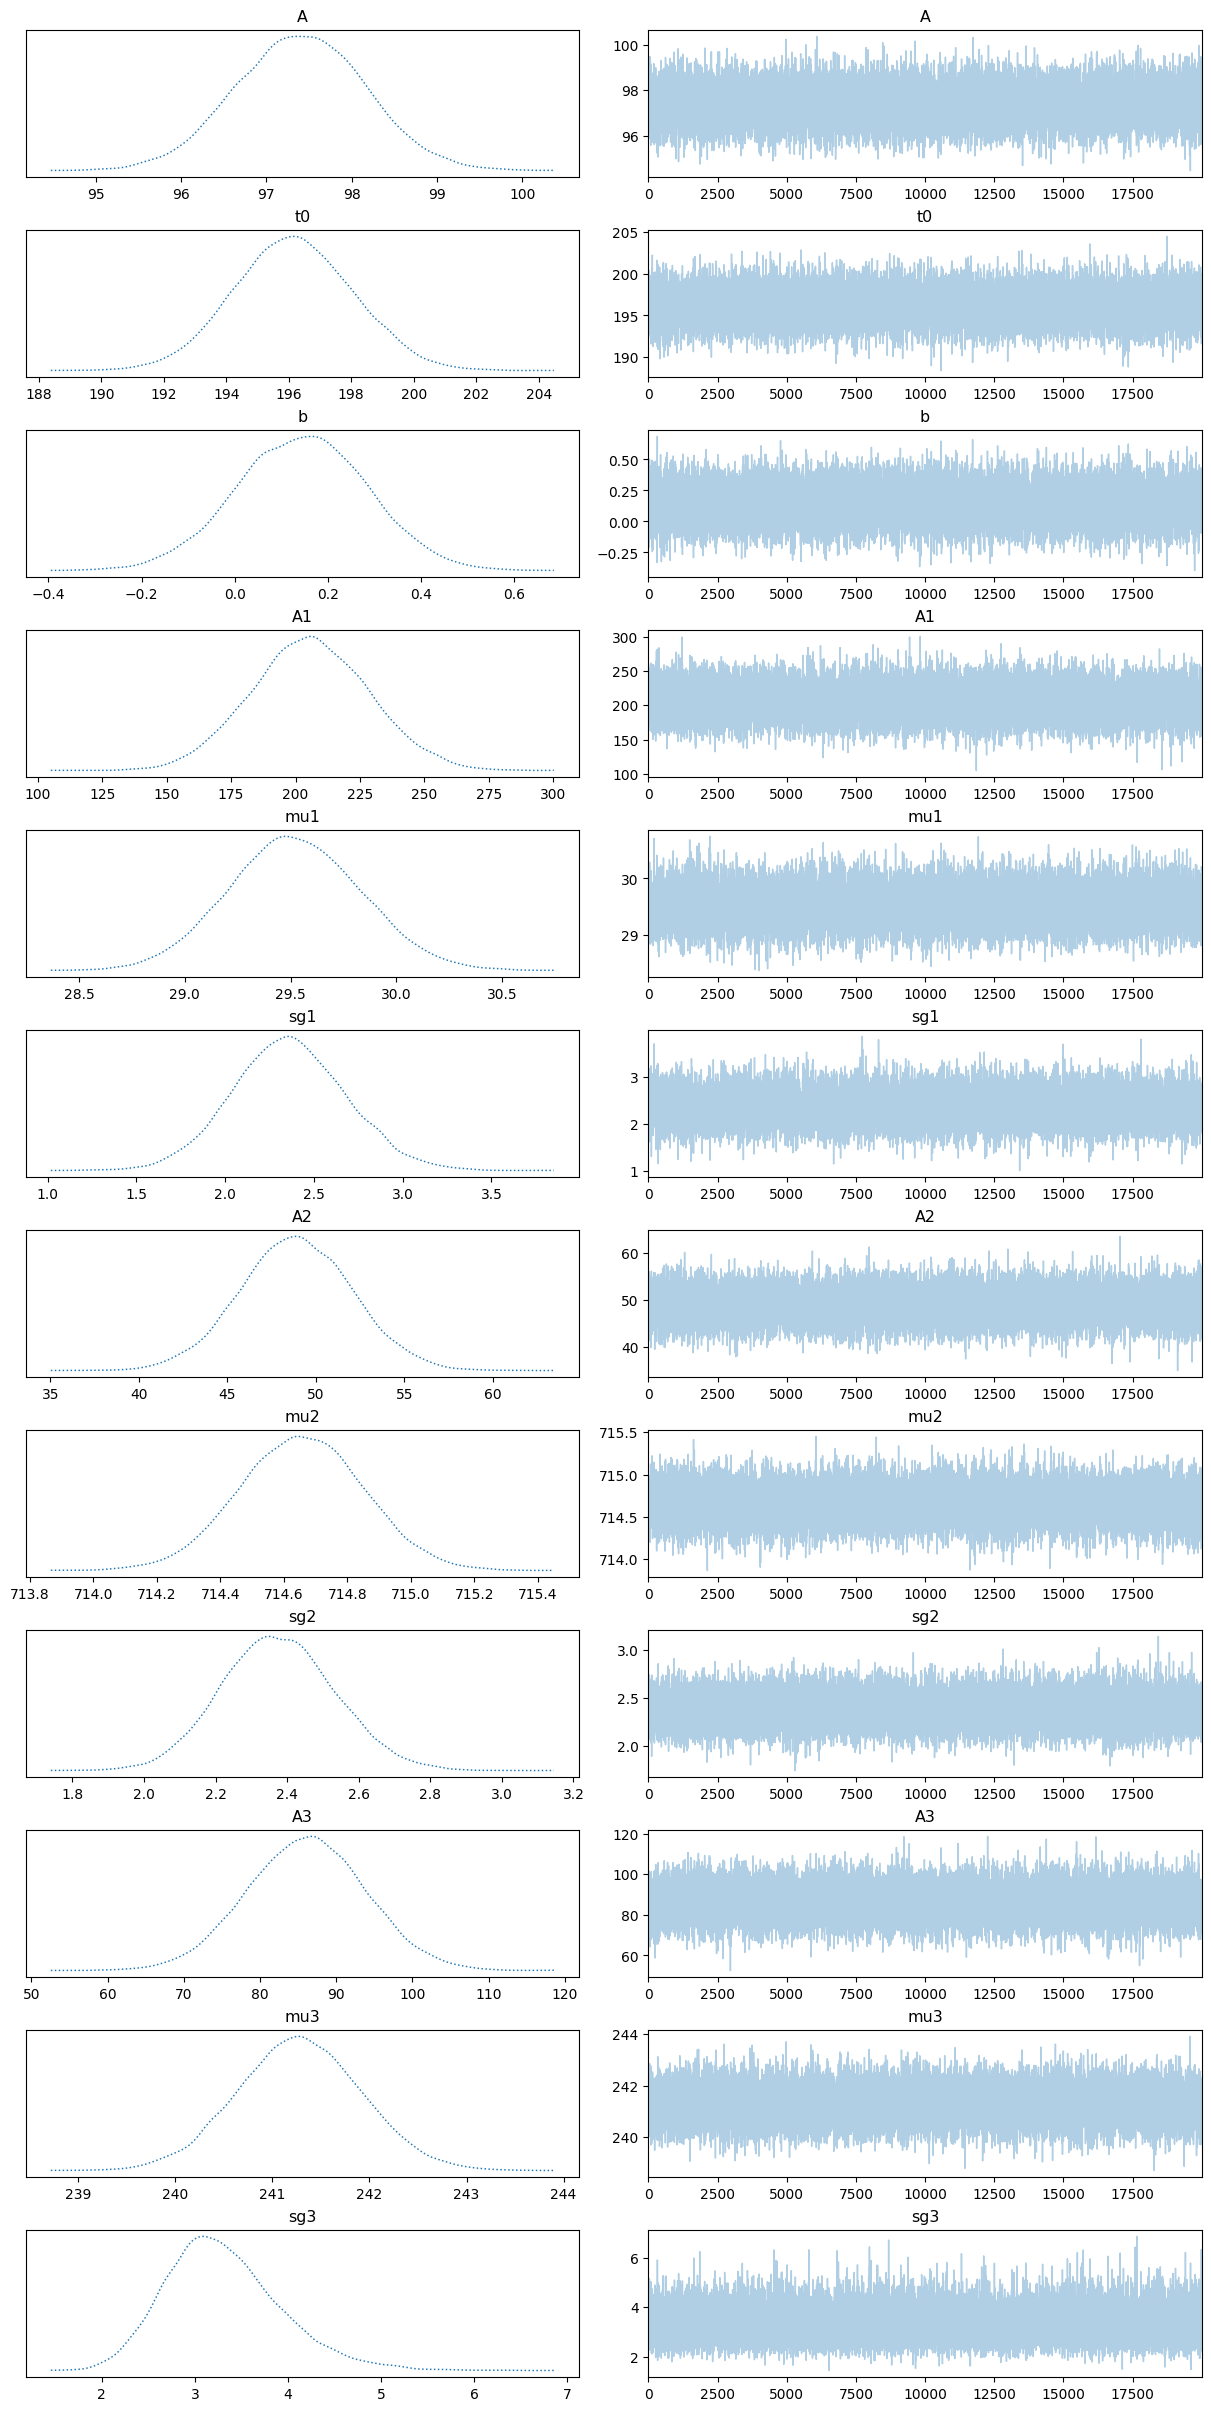

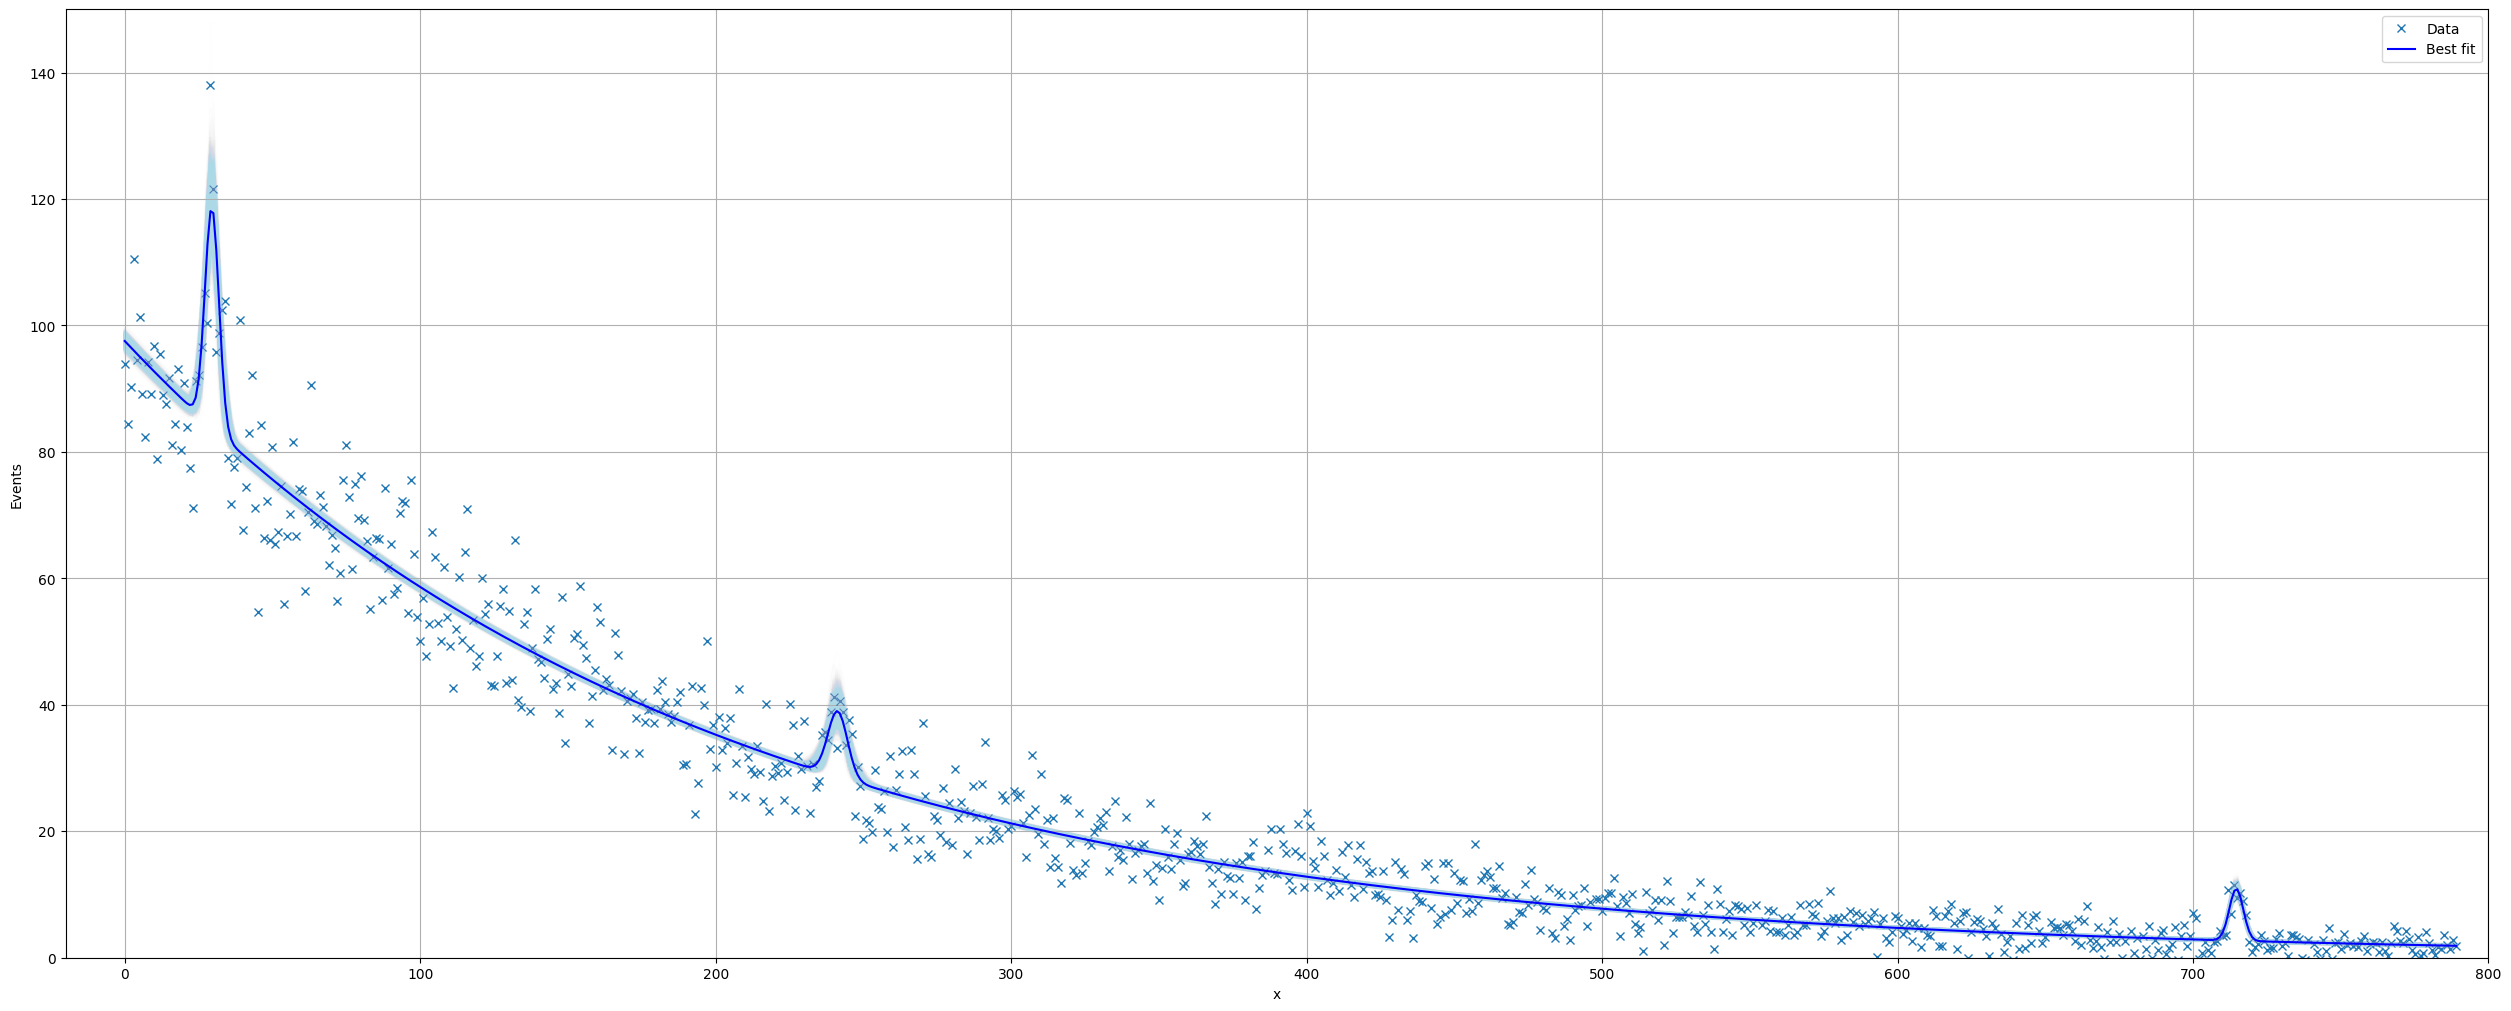

In [ ]:
# @title Exp+3G
#summary
summary = az.summary(trace_SMC_like, var_names=["A", "t0", "b",
                                                "A1", "mu1", "sg1",
                                                "A2", "mu2", "sg2",
                                                "A3", "mu3", "sg3"], round_to=5, kind="stats")
print(summary)
# Plot trace of MCMC
az.plot_trace(trace, combined=True);
# Plot the best fit on top of the data for this Model
# Visualize fit and uncertainty
# plot the data
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
plt.plot(xdata, ydata, 'x',label="Data")
plt.grid()
plt.ylim(0, 150)

# Get the mean inferred values
burnin = 1000

# we have multiple chains, so only get 1
# note: we need to convert the object to a numpy array
A_t = trace["posterior"]["A"][0].to_numpy()
t0_t = trace["posterior"]["t0"][0].to_numpy()
b_t = trace["posterior"]["b"][0].to_numpy()
A1_t = trace["posterior"]["A1"][0].to_numpy()
mu1_t = trace["posterior"]["mu1"][0].to_numpy()
sg1_t = trace["posterior"]["sg1"][0].to_numpy()
A2_t = trace["posterior"]["A2"][0].to_numpy()
mu2_t = trace["posterior"]["mu2"][0].to_numpy()
sg2_t = trace["posterior"]["sg2"][0].to_numpy()
A3_t = trace["posterior"]["A3"][0].to_numpy()
mu3_t = trace["posterior"]["mu3"][0].to_numpy()
sg3_t = trace["posterior"]["sg3"][0].to_numpy()

# Get the mean of the marginalized Posterior as the best fit estimate of the parameters
A_m = A_t.mean()
t0_m = t0_t.mean()
b_m = b_t.mean()
A1_m = A1_t.mean()
mu1_m = mu1_t.mean()
sg1_m = sg1_t.mean()
A2_m = A2_t.mean()
mu2_m = mu2_t.mean()
sg2_m = sg2_t.mean()
A3_m = A3_t.mean()
mu3_m = mu3_t.mean()
sg3_m = sg3_t.mean()

# Plot all draws
draws = range(burnin, len(A_t), 10)
yvalues = Model_exp3G(xdata[:-1, np.newaxis], A_t[draws], t0_t[draws], b_t[draws],
                      A1_t[draws], mu1_t[draws], sg1_t[draws],
                      A2_t[draws], mu2_t[draws], sg2_t[draws],
                      A3_t[draws], mu3_t[draws], sg3_t[draws])
plt.plot(xdata[:-1],  yvalues, c='lightblue', alpha=0.01)

# Plot the mean regression line
plt.plot(xdata, Model_exp3G(xdata, A_m, t0_m, b_m,
                            A1_m, mu1_m, sg1_m,
                            A2_m, mu2_m, sg2_m,
                            A3_m, mu3_m, sg3_m
                            ), c='blue', label="Best fit")

ax.set_xlim(-20, 800)
ax.set_xlabel("x");ax.set_ylabel("Events")
plt.legend(loc="upper right")
plt.show()

In [ ]:
# @title Comparing exp3G
print(logML_exp3G)
print(np.exp(logML_exp3G -logML_exp2G))
print(np.exp(logML_exp3G - logML_exp))
-2154.9887476763474

-2153.9752626636887
7801.410644906241
2.84916239261564e+37


-2154.9887476763474

In [ ]:
# @title Exp + 4G: logML_exp4G
def Model_exp4G(x, A, t0, B,
                A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                A4, mu4, sg4):
  ret = B
  ret = ret + A*np.exp(-x/t0)
  ret = ret + A1/np.sqrt(2*np.pi*sg1**2)*np.exp(-0.5*(x-mu1)**2/sg1**2)
  ret = ret + A2/np.sqrt(2*np.pi*sg2**2)*np.exp(-0.5*(x-mu2)**2/sg2**2)
  ret = ret + A3/np.sqrt(2*np.pi*sg3**2)*np.exp(-0.5*(x-mu3)**2/sg3**2)
  ret = ret + A4/np.sqrt(2*np.pi*sg4**2)*np.exp(-0.5*(x-mu4)**2/sg4**2)
  return ret

@as_op(itypes=[pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar],
       otypes=[pt.dvector])
def Model_exp4G_Vector(A, t0, B,
                       A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                       A4, mu4, sg4):
    xvalues = np.arange(0, size, 1)
    mean_array = Model_exp4G(xvalues, A, t0, B,
                           A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                           A4, mu4, sg4)
    return np.array(mean_array)

with pm.Model() as model01:
    # Prior on the Amp, t0, B of Signal
    A = pm.Normal('A', 98.46158,  1.14220)
    t0 = pm.Normal('t0', 195.22367,  3.25328)
    b = pm.Normal('b', 0.31804,  0.22330)
    # Priors on A, mu, sg of gaussians
    A1 = pm.Normal("A1", 204.18861, 34.02969)
    mu1 = pm.Normal("mu1", 29.52595, 0.44748)
    sg1 = pm.Normal("sg1", 2.37749, 0.49709)
    A2 = pm.Normal("A2", 48.74970,   3.96356)
    mu2 = pm.Normal("mu2", 714.65319,   0.24009)
    sg2 = pm.Normal("sg2", 2.38225,   0.19807)
    A3 = pm.Normal("A3", 86.43558,   8.35934)
    mu3 = pm.Normal("mu3", 241.37002,   0.83641)
    sg3 = pm.Normal("sg3", 3.19385,   1.46562)
    A4 = pm.Normal("A4", 75.81852,  26.90795)
    mu4 = pm.Normal("mu4", 404.53898,   8.57050)
    sg4 = pm.Normal("sg4", 10.99224,   3.63257)

    #vector evaluator
    mu=Model_exp4G_Vector(A, t0, b, A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                          A4, mu4, sg4)
    sigma = (Model_exp(xdata, 98.54028, 194.67769, 0.36055))**0.5
    # Likelihood Normal
    y = pm.Normal("y", mu=mu, sigma=sigma, observed = ydata)

# We run Sequential Monte Carlo to extract the Marginal Log Likelihood P(M|D)
# But with the current version of PyMC v5 we have to use a single chain (1 CPU core)
draws = 20000
with model01:
    trace_SMC_like = pm.sample_smc(draws, chains = 1)
trace = trace_SMC_like
logML_exp4G = trace.sample_stats["log_marginal_likelihood"].mean().to_numpy()

          mean        sd     hdi_3%    hdi_97%
A     97.44848   0.76280   96.03803   98.89875
t0   194.87608   1.93903  191.24162  198.51019
b      0.16789   0.14033   -0.09830    0.42770
A1   205.75108  22.90499  163.68325  249.25639
mu1   29.51947   0.30738   28.93682   30.08953
sg1    2.36401   0.32205    1.75354    2.97170
A2    48.95878   3.18523   43.05486   55.03379
mu2  714.65239   0.19460  714.27251  715.00886
sg2    2.37515   0.15710    2.07682    2.66452
A3    86.51233   7.76473   72.55449  101.58978
mu3  241.28911   0.63239  240.10913  242.48108
sg3    3.30990   0.63843    2.22874    4.50695
A4    78.57988  18.19592   44.13703  112.58840
mu4  400.82657   3.60332  394.29897  407.86920
sg4   10.48882   2.51094    5.83619   15.20232


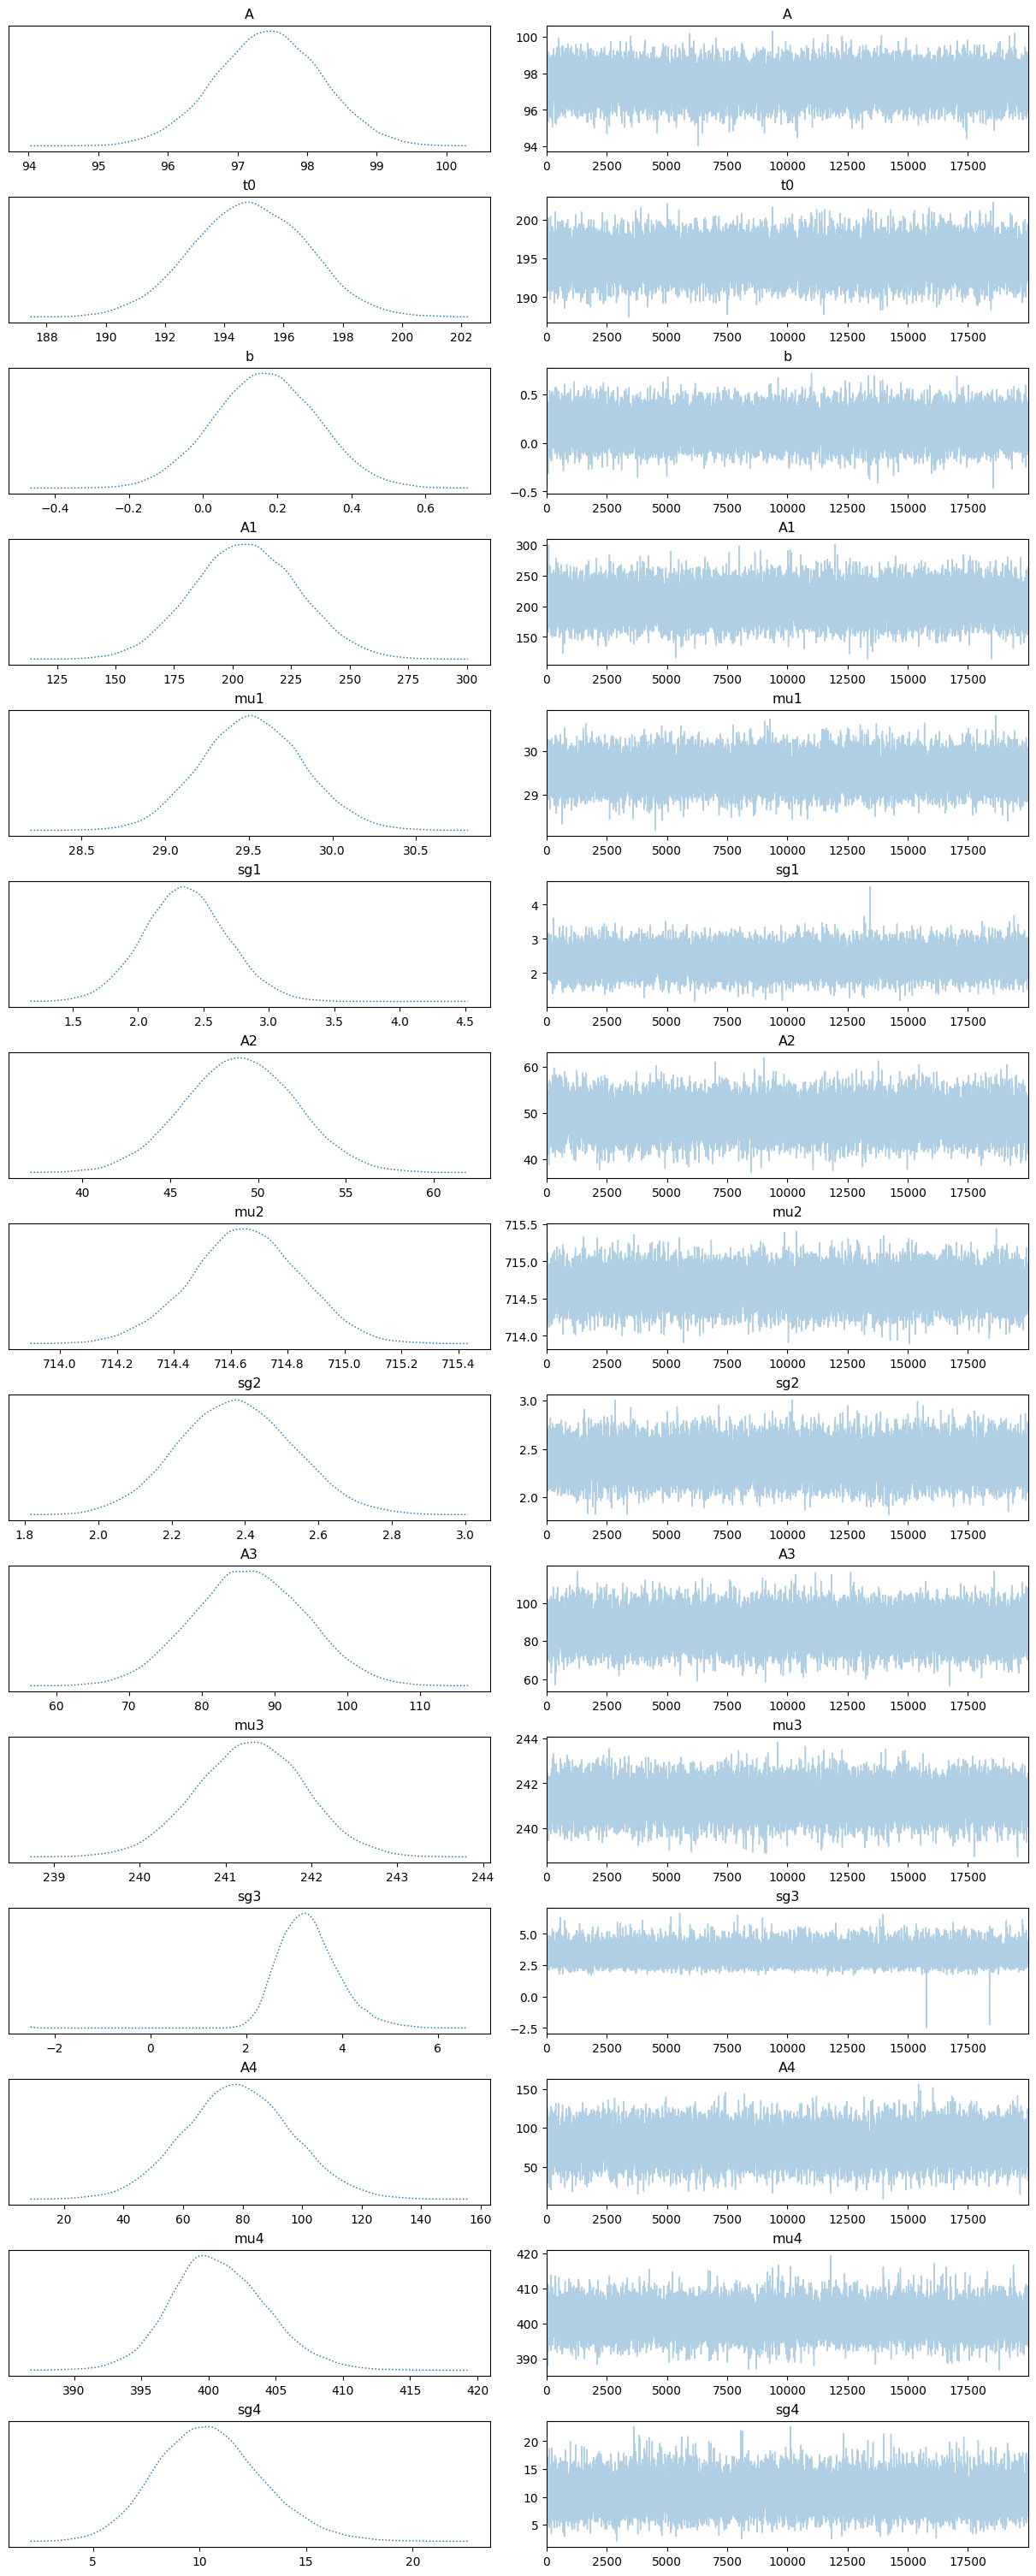

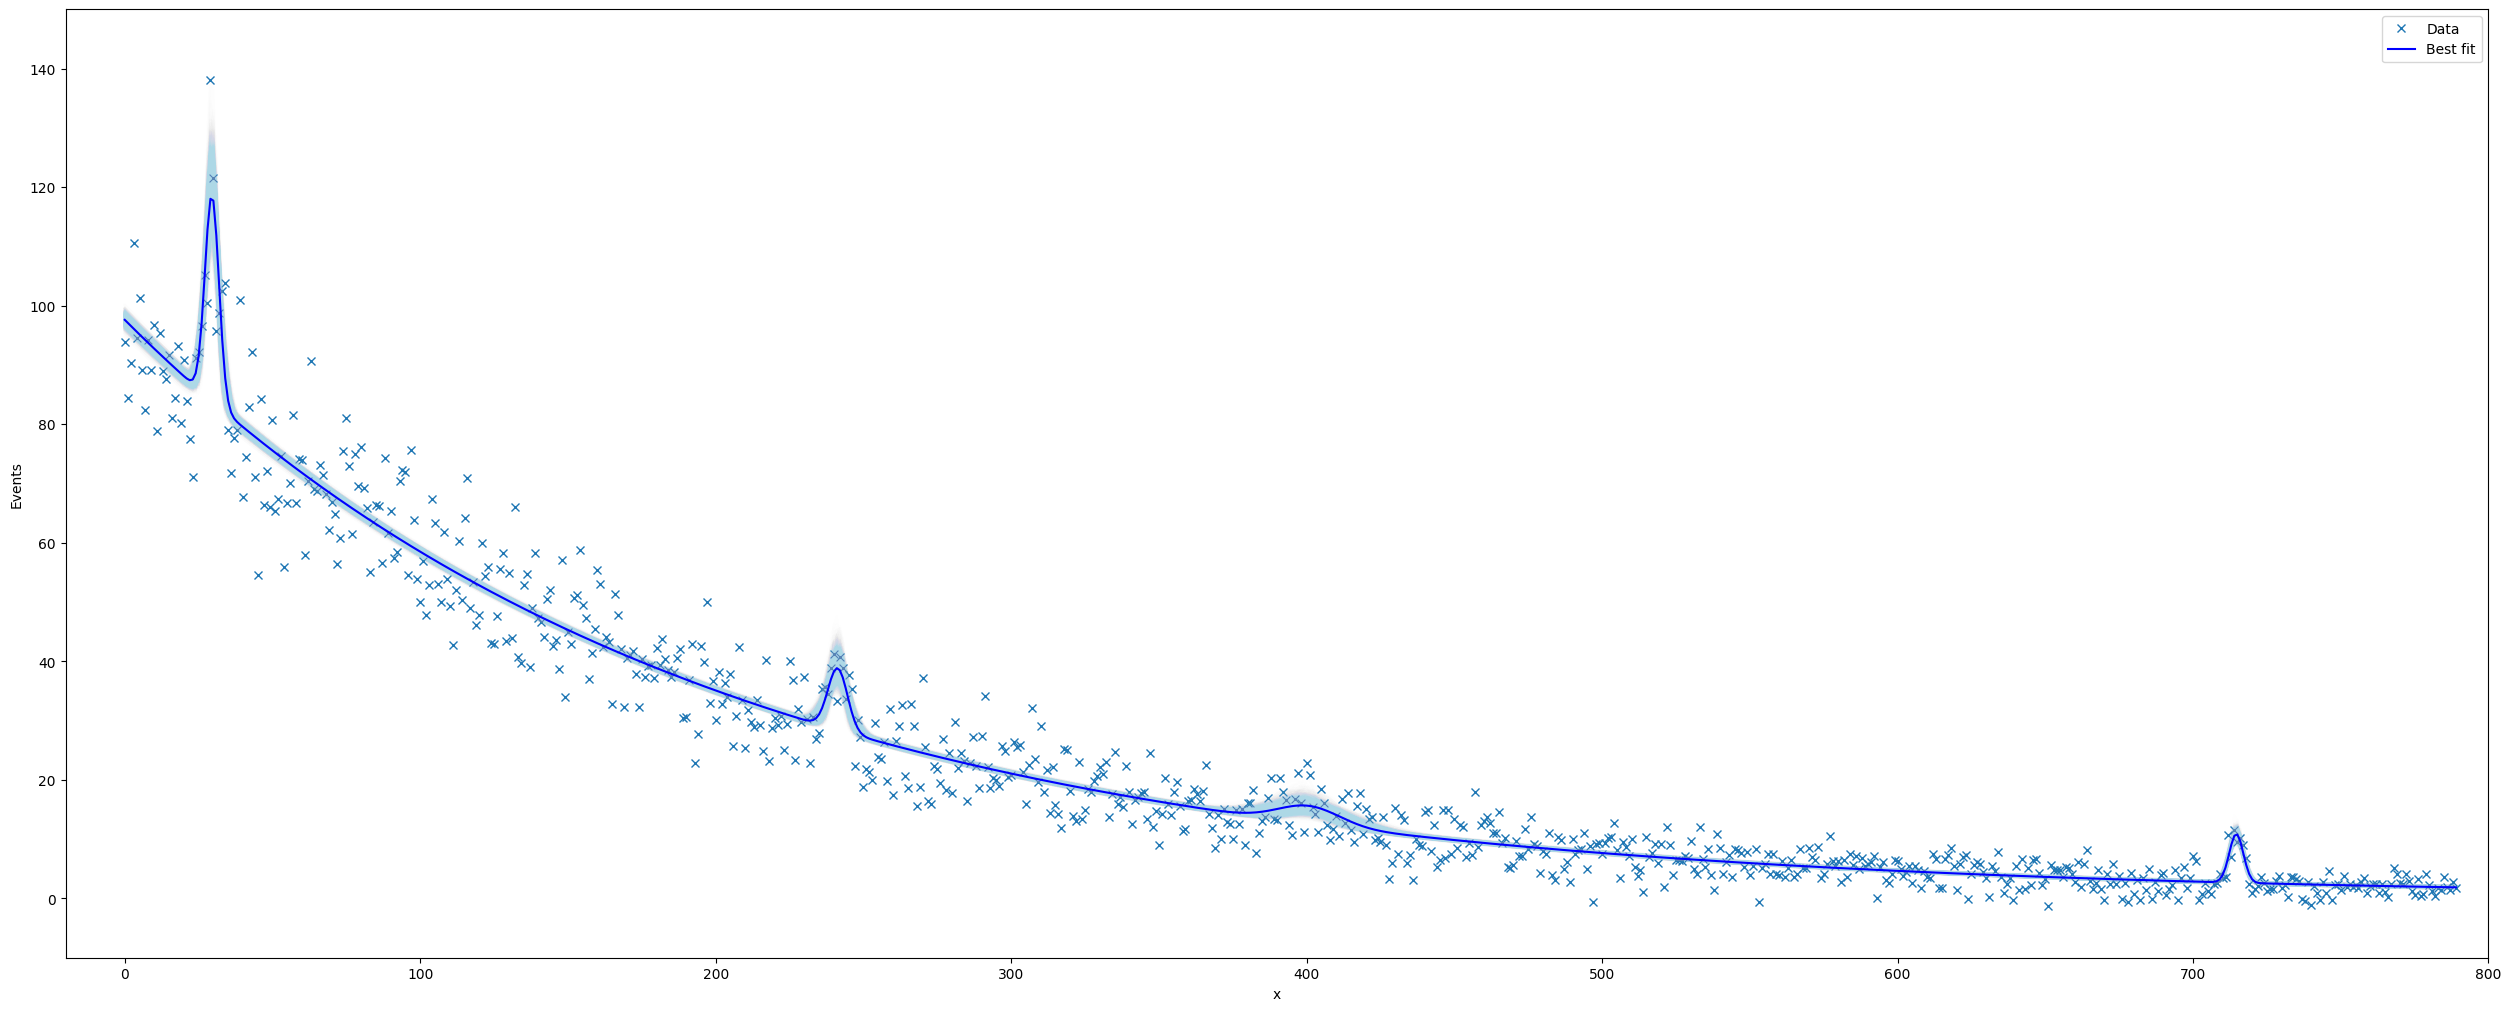

In [ ]:
# @title Exp + 4G
summary = az.summary(trace_SMC_like, var_names=["A", "t0", "b",
                                                "A1", "mu1", "sg1",
                                                "A2", "mu2", "sg2",
                                                "A3", "mu3", "sg3",
                                                "A4", "mu4", "sg4"], round_to=5, kind="stats")
print(summary)
# Plot trace of MCMC
az.plot_trace(trace, combined=True);

# Plot the best fit on top of the data for this Model
# Visualize fit and uncertainty
# plot the data
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
plt.plot(xdata, ydata, 'x',label="Data")
plt.ylim(-10, 150)

# Get the mean inferred values
burnin = 1000

# we have multiple chains, so only get 1
# note: we need to convert the object to a numpy array
A_t = trace["posterior"]["A"][0].to_numpy()
t0_t = trace["posterior"]["t0"][0].to_numpy()
b_t = trace["posterior"]["b"][0].to_numpy()
A1_t = trace["posterior"]["A1"][0].to_numpy()
mu1_t = trace["posterior"]["mu1"][0].to_numpy()
sg1_t = trace["posterior"]["sg1"][0].to_numpy()
A2_t = trace["posterior"]["A2"][0].to_numpy()
mu2_t = trace["posterior"]["mu2"][0].to_numpy()
sg2_t = trace["posterior"]["sg2"][0].to_numpy()
A3_t = trace["posterior"]["A3"][0].to_numpy()
mu3_t = trace["posterior"]["mu3"][0].to_numpy()
sg3_t = trace["posterior"]["sg3"][0].to_numpy()
A4_t = trace["posterior"]["A4"][0].to_numpy()
mu4_t = trace["posterior"]["mu4"][0].to_numpy()
sg4_t = trace["posterior"]["sg4"][0].to_numpy()

# Get the mean of the marginalized Posterior as the best fit estimate of the parameters
A_m = A_t.mean()
t0_m = t0_t.mean()
b_m = b_t.mean()
A1_m = A1_t.mean()
mu1_m = mu1_t.mean()
sg1_m = sg1_t.mean()
A2_m = A2_t.mean()
mu2_m = mu2_t.mean()
sg2_m = sg2_t.mean()
A3_m = A3_t.mean()
mu3_m = mu3_t.mean()
sg3_m = sg3_t.mean()
A4_m = A4_t.mean()
mu4_m = mu4_t.mean()
sg4_m = sg4_t.mean()

# Plot all draws
draws = range(burnin, len(A_t), 10)
yvalues = Model_exp4G(xdata[:-1, np.newaxis], A_t[draws], t0_t[draws], b_t[draws],
                      A1_t[draws], mu1_t[draws], sg1_t[draws],
                      A2_t[draws], mu2_t[draws], sg2_t[draws],
                      A3_t[draws], mu3_t[draws], sg3_t[draws],
                      A4_t[draws], mu4_t[draws], sg4_t[draws])
plt.plot(xdata[:-1],  yvalues, c='lightblue', alpha=0.01)

# Plot the mean regression line
plt.plot(xdata, Model_exp4G(xdata, A_m, t0_m, b_m,
                            A1_m, mu1_m, sg1_m,
                            A2_m, mu2_m, sg2_m,
                            A3_m, mu3_m, sg3_m,
                            A4_m, mu4_m, sg4_m
                            ), c='blue', label="Best fit")

ax.set_xlim(-20, 800)
ax.set_xlabel("x");ax.set_ylabel("Events")
plt.legend(loc="upper right")
plt.show()

In [ ]:
# @title Comparing exp4G
print(logML_exp4G)
print(np.exp(logML_exp4G - logML_exp3G))
print(np.exp(logML_exp3G - logML_exp))

-2148.620093313843
211.6998246499979
2.84916239261564e+37


In [25]:
# @title Exp + 5G: logML_exp5G
def Model_exp5G(x, A, t0, B,
                A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                A4, mu4, sg4, A5, mu5, sg5):
  ret = A*np.exp(-x/t0) + B
  ret = ret + A1/np.sqrt(2*np.pi*sg1**2)*np.exp(-0.5*(x-mu1)**2/sg1**2)
  ret = ret + A2/np.sqrt(2*np.pi*sg2**2)*np.exp(-0.5*(x-mu2)**2/sg2**2)
  ret = ret + A3/np.sqrt(2*np.pi*sg3**2)*np.exp(-0.5*(x-mu3)**2/sg3**2)
  ret = ret + A4/np.sqrt(2*np.pi*sg4**2)*np.exp(-0.5*(x-mu4)**2/sg4**2)
  ret = ret + A5/np.sqrt(2*np.pi*sg5**2)*np.exp(-0.5*(x-mu5)**2/sg5**2)
  return ret

@as_op(itypes=[pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar],
       otypes=[pt.dvector])
def Model_exp5G_Vector(A, t0, B,
                       A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                       A4, mu4, sg4, A5, mu5, sg5):
    xvalues = np.arange(0, size, 1)
    mean_array = Model_exp5G(xvalues, A, t0, B,
                           A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                           A4, mu4, sg4, A5, mu5, sg5)
    return np.array(mean_array)

with pm.Model() as model01:
    # Prior on the Amp, t0, B of Signal
    A = pm.Normal('A', 98.46158,  1.14220)
    t0 = pm.Normal('t0', 195.22367,  3.25328)
    b = pm.Normal('b', 0.31804,  0.22330)
    # Priors on A, mu, sg of gaussians
    A1 = pm.Normal("A1", 204.18861, 34.02969)
    mu1 = pm.Normal("mu1", 29.52595, 0.44748)
    sg1 = pm.Normal("sg1", 2.37749, 0.49709)
    A2 = pm.Normal("A2", 48.74970,   3.96356)
    mu2 = pm.Normal("mu2", 714.65319,   0.24009)
    sg2 = pm.Normal("sg2", 2.38225,   0.19807)
    A3 = pm.Normal("A3", 86.43558,   8.35934)
    mu3 = pm.Normal("mu3", 241.37002,   0.83641)
    sg3 = pm.Normal("sg3", 3.19385,   1.46562)
    A4 = pm.Normal("A4", 75.81852,  26.90795)
    mu4 = pm.Normal("mu4", 404.53898,   8.57050)
    sg4 = pm.Normal("sg4", 10.99224,   3.63257)
    A5 = pm.Uniform("A5", lower=5, upper = 100)
    mu5 = pm.Uniform("mu5", lower=1, upper = 790)
    sg5 = pm.Uniform("sg5", lower=1, upper = 20)

    mu=Model_exp5G_Vector(A, t0, b, A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                          A4, mu4, sg4, A5, mu5, sg5)
    sigma = (Model_exp(xdata, 98.54028, 194.67769, 0.36055))**0.5
    # Likelihood Normal
    y = pm.Normal("y", mu=mu, sigma=sigma, observed = ydata)

# We run Sequential Monte Carlo to extract the Marginal Log Likelihood P(M|D)
# But with the current version of PyMC v5 we have to use a single chain (1 CPU core)
draws = 20000
with model01:
    trace_SMC_like = pm.sample_smc(draws, chains = 4)
trace = trace_SMC_like
logML_exp5G = trace.sample_stats["log_marginal_likelihood"].mean().to_numpy()

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


          mean         sd     hdi_3%    hdi_97%
A     97.38163    0.77582   95.91450   98.82018
t0   194.66369    1.94527  191.00521  198.28645
b      0.16882    0.14106   -0.09705    0.42968
A1   205.95778   23.08285  162.04902  248.78341
mu1   29.52273    0.31146   28.93121   30.09972
sg1    2.36492    0.32198    1.74545    2.96333
A2    48.98852    3.15912   43.11787   54.97925
mu2  714.65406    0.19466  714.29308  715.02528
sg2    2.37587    0.15722    2.08344    2.67352
A3    86.65483    7.70595   72.44068  101.28501
mu3  241.28331    0.62512  240.10402  242.45770
sg3    3.31267    0.62267    2.19496    4.47999
A4    78.44596   18.52757   44.81465  114.60480
mu4  400.84301    3.67143  393.90000  407.74937
sg4   10.48880    2.52263    5.86241   15.35399
A5    36.88392   24.15023    5.00361   83.10152
mu5  295.51728  195.23687   21.23702  634.36616
sg5   11.28947    5.23422    2.96148   19.98481


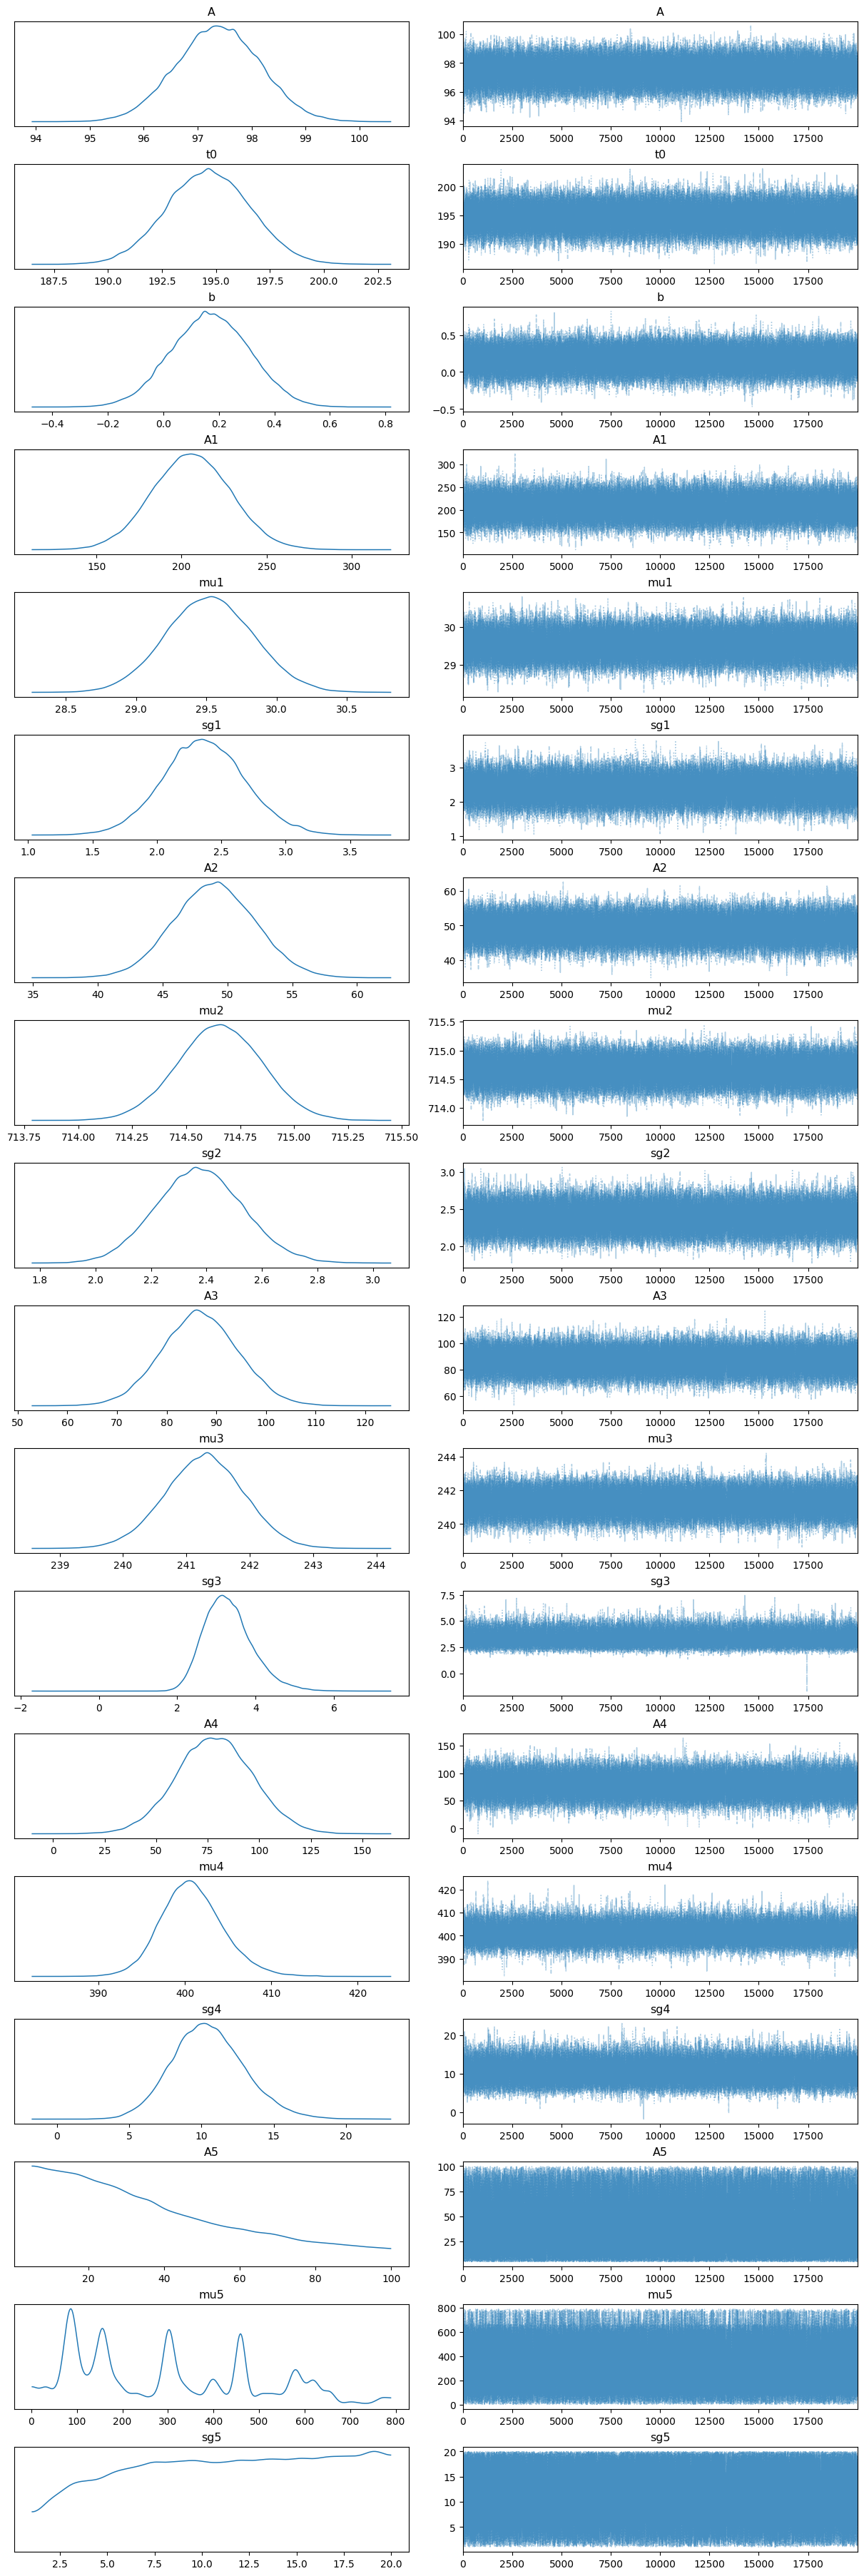

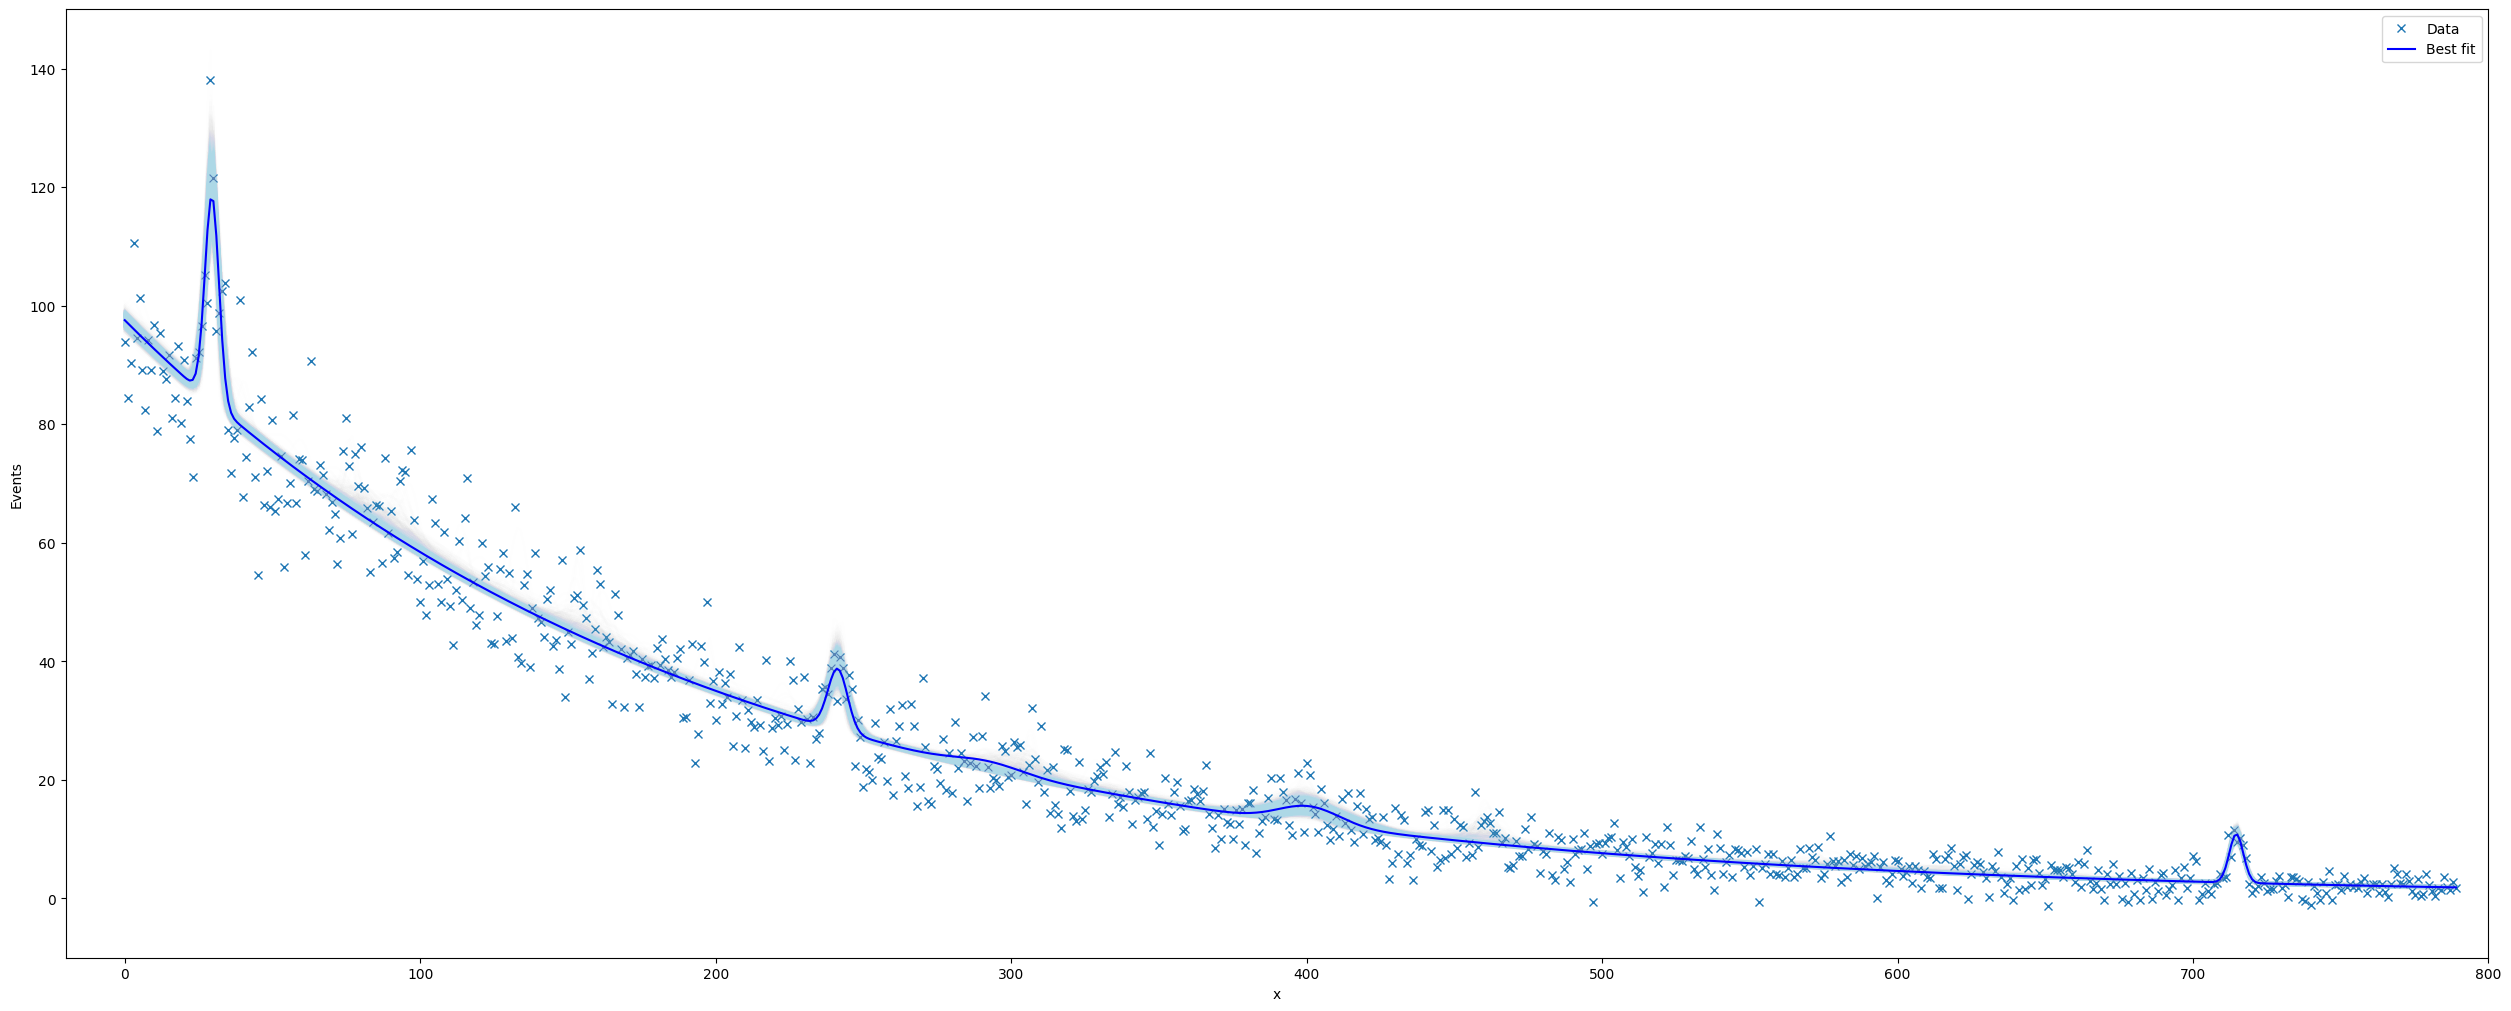

In [26]:
# @title Exp + 5G
#summary
summary = az.summary(trace_SMC_like, var_names=["A", "t0", "b",
                                                "A1", "mu1", "sg1",
                                                "A2", "mu2", "sg2",
                                                "A3", "mu3", "sg3",
                                                "A4", "mu4", "sg4",
                                                "A5", "mu5", "sg5"], round_to=5, kind="stats")
print(summary)
# Plot trace of MCMC
az.plot_trace(trace, combined=True);

# Plot the best fit on top of the data for this Model
# Visualize fit and uncertainty
# plot the data
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
plt.plot(xdata, ydata, 'x',label="Data")
plt.ylim(-10, 150)

# Get the mean inferred values
burnin = 1000

# we have multiple chains, so only get 1
# note: we need to convert the object to a numpy array
A_t = trace["posterior"]["A"][0].to_numpy()
t0_t = trace["posterior"]["t0"][0].to_numpy()
b_t = trace["posterior"]["b"][0].to_numpy()
A1_t = trace["posterior"]["A1"][0].to_numpy()
mu1_t = trace["posterior"]["mu1"][0].to_numpy()
sg1_t = trace["posterior"]["sg1"][0].to_numpy()
A2_t = trace["posterior"]["A2"][0].to_numpy()
mu2_t = trace["posterior"]["mu2"][0].to_numpy()
sg2_t = trace["posterior"]["sg2"][0].to_numpy()
A3_t = trace["posterior"]["A3"][0].to_numpy()
mu3_t = trace["posterior"]["mu3"][0].to_numpy()
sg3_t = trace["posterior"]["sg3"][0].to_numpy()
A4_t = trace["posterior"]["A4"][0].to_numpy()
mu4_t = trace["posterior"]["mu4"][0].to_numpy()
sg4_t = trace["posterior"]["sg4"][0].to_numpy()
A5_t = trace["posterior"]["A5"][0].to_numpy()
mu5_t = trace["posterior"]["mu5"][0].to_numpy()
sg5_t = trace["posterior"]["sg5"][0].to_numpy()

# Get the mean of the marginalized Posterior as the best fit estimate of the parameters
A_m = A_t.mean()
t0_m = t0_t.mean()
b_m = b_t.mean()
A1_m = A1_t.mean()
mu1_m = mu1_t.mean()
sg1_m = sg1_t.mean()
A2_m = A2_t.mean()
mu2_m = mu2_t.mean()
sg2_m = sg2_t.mean()
A3_m = A3_t.mean()
mu3_m = mu3_t.mean()
sg3_m = sg3_t.mean()
A4_m = A4_t.mean()
mu4_m = mu4_t.mean()
sg4_m = sg4_t.mean()
A5_m = A5_t.mean()
mu5_m = mu5_t.mean()
sg5_m = sg5_t.mean()

# Plot all draws
draws = range(burnin, len(A_t), 10)
yvalues = Model_exp5G(xdata[:-1, np.newaxis], A_t[draws], t0_t[draws], b_t[draws],
                      A1_t[draws], mu1_t[draws], sg1_t[draws],
                      A2_t[draws], mu2_t[draws], sg2_t[draws],
                      A3_t[draws], mu3_t[draws], sg3_t[draws],
                      A4_t[draws], mu4_t[draws], sg4_t[draws],
                      A5_t[draws], mu5_t[draws], sg5_t[draws])
plt.plot(xdata[:-1],  yvalues, c='lightblue', alpha=0.01)

# Plot the mean regression line
plt.plot(xdata, Model_exp5G(xdata, A_m, t0_m, b_m,
                            A1_m, mu1_m, sg1_m,
                            A2_m, mu2_m, sg2_m,
                            A3_m, mu3_m, sg3_m,
                            A4_m, mu4_m, sg4_m,
                            A5_m, mu5_m, sg5_m
                            ), c='blue', label="Best fit")

ax.set_xlim(-20, 800)
ax.set_xlabel("x");ax.set_ylabel("Events")
plt.legend(loc="upper right")
plt.show()

In [27]:
# @title Comparing exp5G
print(logML_exp5G)
print(logML_exp4G)
print(np.exp(logML_exp5G - logML_exp4G))
print(np.exp(logML_exp5G - logML_exp))

-2149.372296595173
-2148.620093313843
0.47132694203247916
2.842889419728824e+39


In [28]:
# @title Exp + 5G: logML_exp5G_2
def Model_exp5G(x, A, t0, B,
                A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                A4, mu4, sg4, A5, mu5, sg5):
  ret = A*np.exp(-x/t0) + B
  ret = ret + A1/np.sqrt(2*np.pi*sg1**2)*np.exp(-0.5*(x-mu1)**2/sg1**2)
  ret = ret + A2/np.sqrt(2*np.pi*sg2**2)*np.exp(-0.5*(x-mu2)**2/sg2**2)
  ret = ret + A3/np.sqrt(2*np.pi*sg3**2)*np.exp(-0.5*(x-mu3)**2/sg3**2)
  ret = ret + A4/np.sqrt(2*np.pi*sg4**2)*np.exp(-0.5*(x-mu4)**2/sg4**2)
  ret = ret + A5/np.sqrt(2*np.pi*sg5**2)*np.exp(-0.5*(x-mu5)**2/sg5**2)
  return ret

@as_op(itypes=[pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar],
       otypes=[pt.dvector])
def Model_exp5G_Vector(A, t0, B,
                       A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                       A4, mu4, sg4, A5, mu5, sg5):
    xvalues = np.arange(0, size, 1)
    mean_array = Model_exp5G(xvalues, A, t0, B,
                           A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                           A4, mu4, sg4, A5, mu5, sg5)
    return np.array(mean_array)

with pm.Model() as model01:
    # Prior on the Amp, t0, B of Signal
    A = pm.Normal('A', 98.46158,  1.14220)
    t0 = pm.Normal('t0', 195.22367,  3.25328)
    b = pm.Normal('b', 0.31804,  0.22330)
    # Priors on A, mu, sg of gaussians
    A1 = pm.Normal("A1", 204.18861, 34.02969)
    mu1 = pm.Normal("mu1", 29.52595, 0.44748)
    sg1 = pm.Normal("sg1", 2.37749, 0.49709)
    A2 = pm.Normal("A2", 48.74970,   3.96356)
    mu2 = pm.Normal("mu2", 714.65319,   0.24009)
    sg2 = pm.Normal("sg2", 2.38225,   0.19807)
    A3 = pm.Normal("A3", 86.43558,   8.35934)
    mu3 = pm.Normal("mu3", 241.37002,   0.83641)
    sg3 = pm.Normal("sg3", 3.19385,   1.46562)
    A4 = pm.Normal("A4", 75.81852,  26.90795)
    mu4 = pm.Normal("mu4", 404.53898,   8.57050)
    sg4 = pm.Normal("sg4", 10.99224,   3.63257)
    A5 = pm.Uniform("A5", lower=5, upper = 100)
    mu5 = pm.Uniform("mu5", lower=600, upper = 700)
    sg5 = pm.Uniform("sg5", lower=1, upper = 20)

    mu=Model_exp5G_Vector(A, t0, b, A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                          A4, mu4, sg4, A5, mu5, sg5)
    sigma = (Model_exp(xdata, 98.54028, 194.67769, 0.36055))**0.5
    # Likelihood Normal
    y = pm.Normal("y", mu=mu, sigma=sigma, observed = ydata)


# We run Sequential Monte Carlo to extract the Marginal Log Likelihood P(M|D)
# But with the current version of PyMC v5 we have to use a single chain (1 CPU core)
draws = 20000
with model01:
    trace_SMC_like = pm.sample_smc(draws, chains = 1)
trace = trace_SMC_like
logML_exp5G_2 = trace.sample_stats["log_marginal_likelihood"].mean().to_numpy()

          mean        sd     hdi_3%    hdi_97%
A     97.51176   0.77063   96.07834   98.94577
t0   194.79401   1.92774  191.18208  198.38782
b      0.12930   0.14118   -0.14343    0.38637
A1   205.58968  22.82487  162.97896  248.70499
mu1   29.52180   0.30884   28.94244   30.09733
sg1    2.36335   0.32242    1.76949    2.98788
A2    49.07957   3.18168   43.06815   54.91061
mu2  714.65618   0.19599  714.29381  715.03223
sg2    2.37466   0.15704    2.07750    2.66848
A3    86.60372   7.74251   72.73270  101.72823
mu3  241.27220   0.63368  240.02998  242.42009
sg3    3.31344   0.64390    2.22276    4.50758
A4    79.34600  18.35308   45.78556  113.96952
mu4  400.80923   3.56765  394.24970  407.57732
sg4   10.47907   2.49500    5.77638   15.17573
A5    20.04941  11.69314    5.01862   40.97524
mu5  631.92697  21.37305  600.03139  664.21467
sg5   12.35165   5.17364    3.68161   19.98397


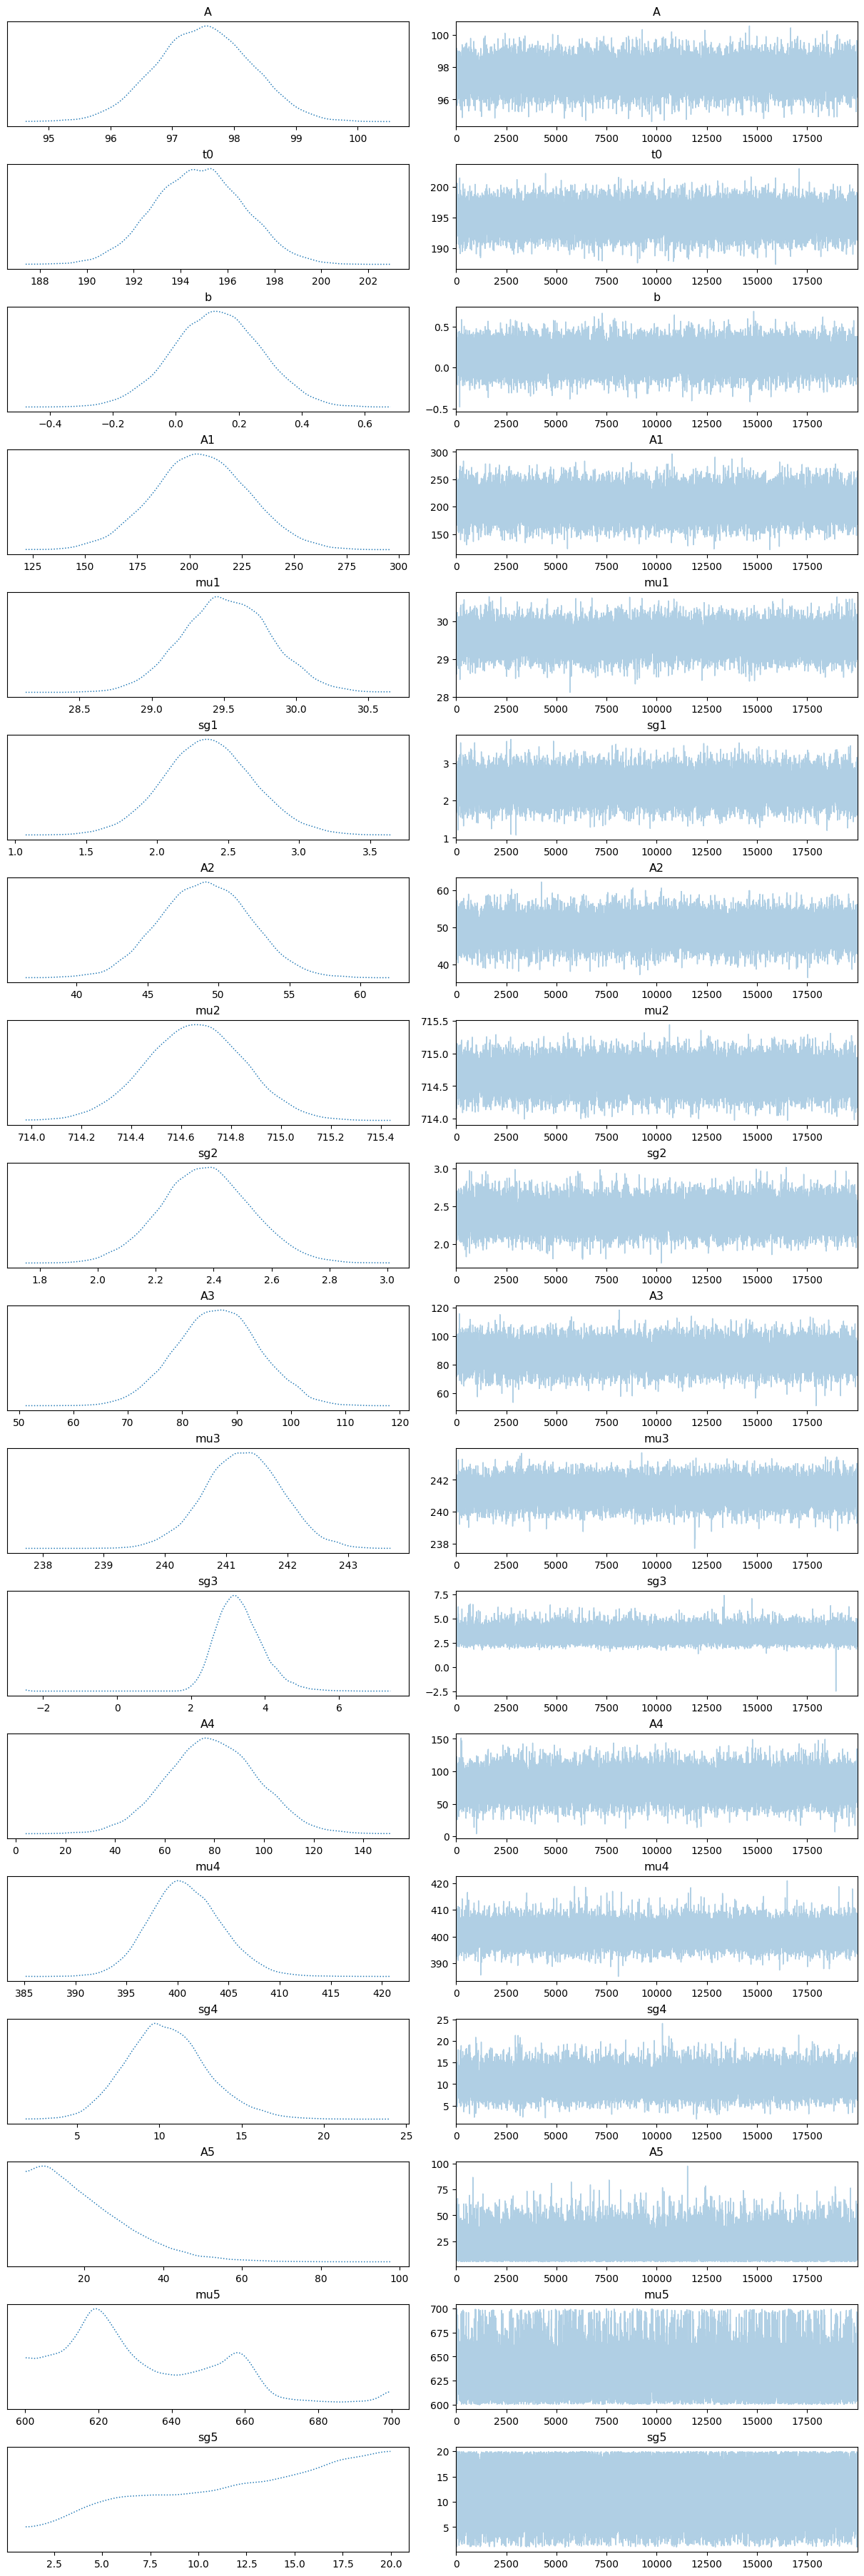

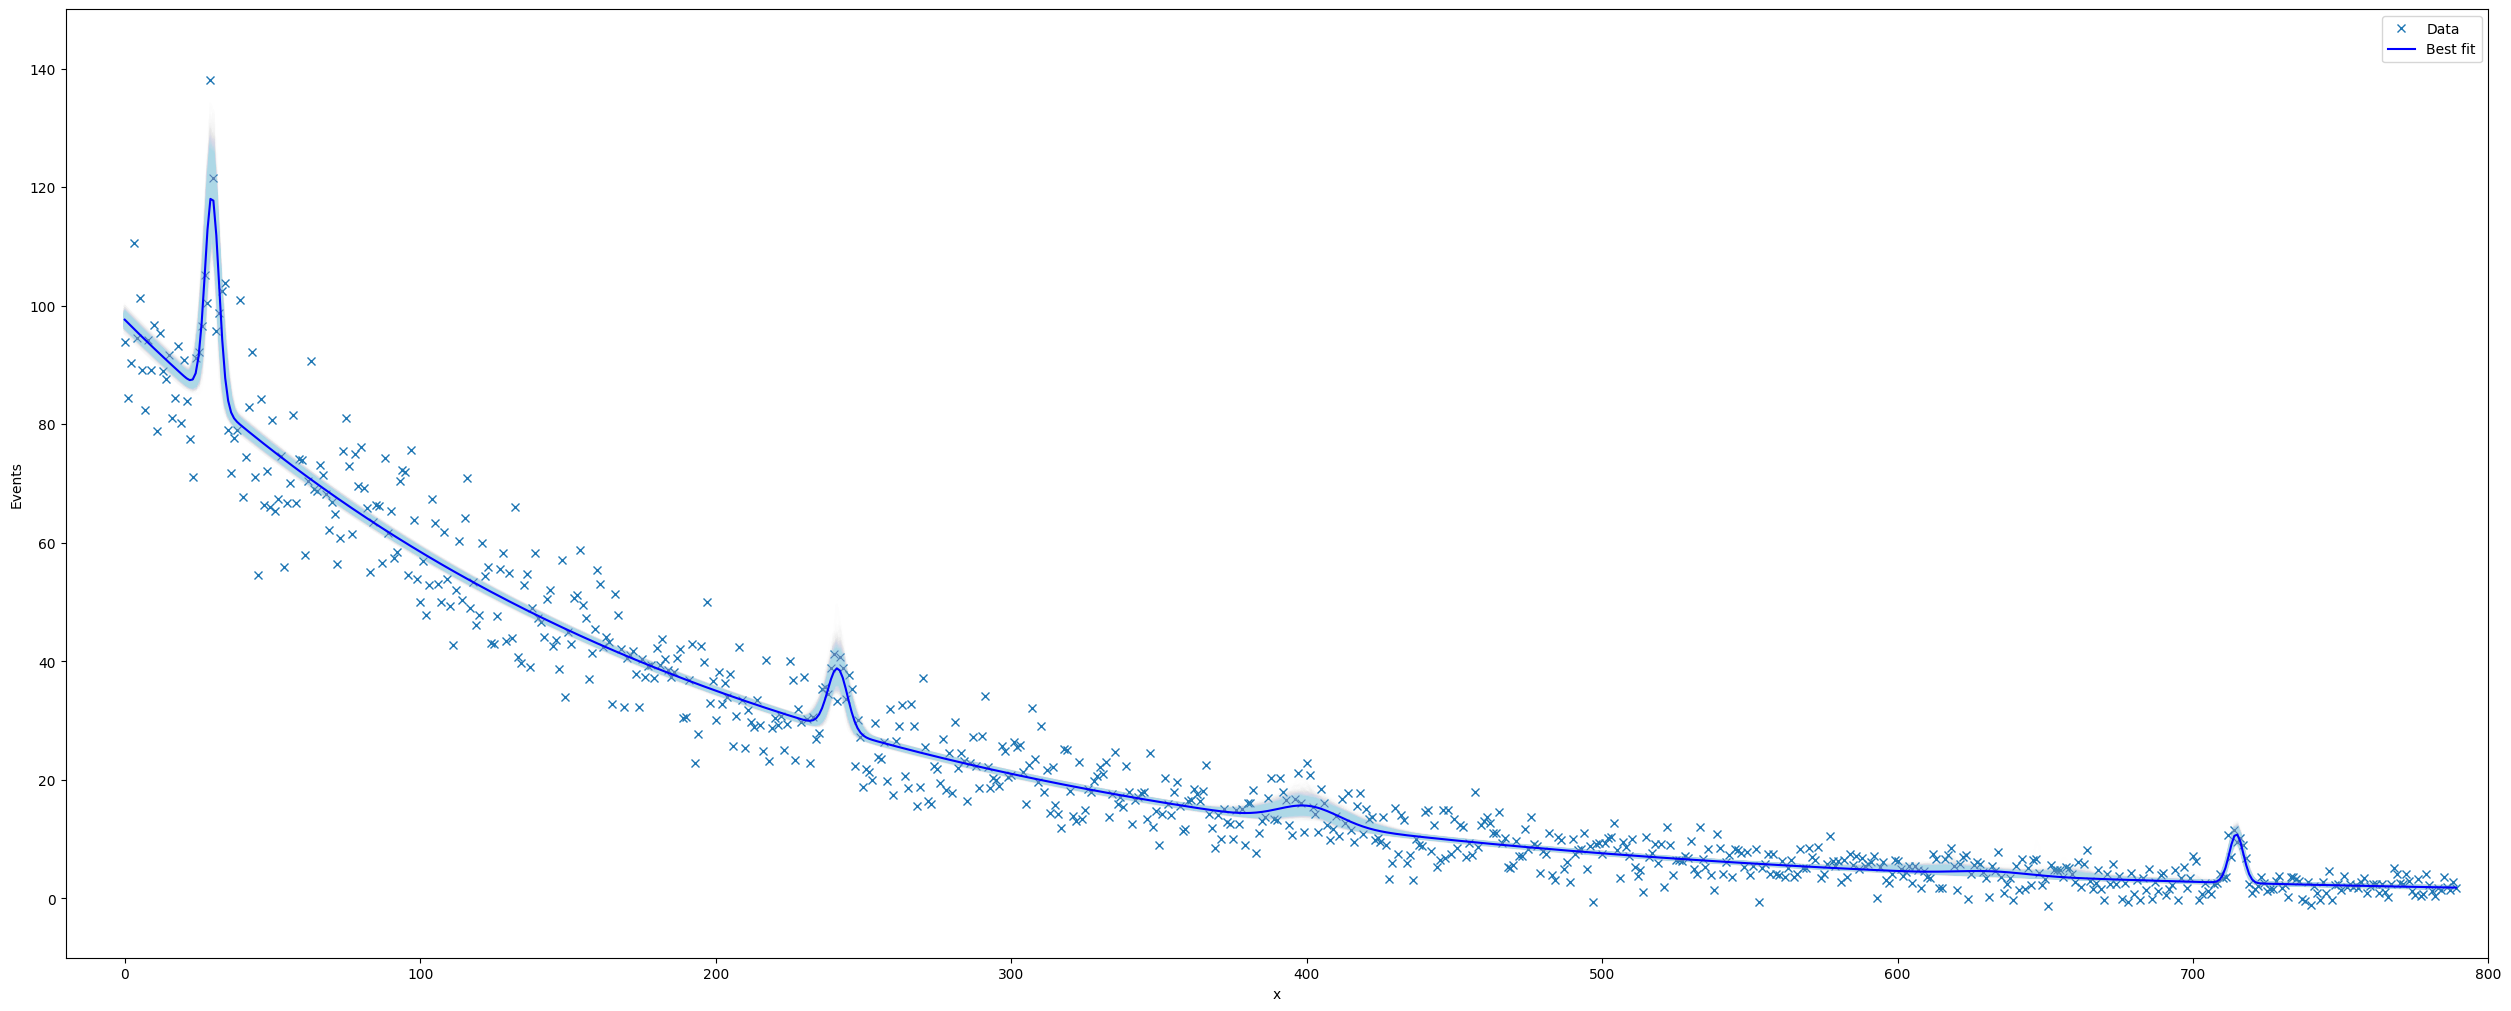

In [29]:
# @title Exp + 5G: logML_exp5G_2
#summary
summary = az.summary(trace_SMC_like, var_names=["A", "t0", "b",
                                                "A1", "mu1", "sg1",
                                                "A2", "mu2", "sg2",
                                                "A3", "mu3", "sg3",
                                                "A4", "mu4", "sg4",
                                                "A5", "mu5", "sg5"], round_to=5, kind="stats")
print(summary)
# Plot trace of MCMC
az.plot_trace(trace, combined=True);

# Plot the best fit on top of the data for this Model
# Visualize fit and uncertainty
# plot the data
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
plt.plot(xdata, ydata, 'x',label="Data")
plt.ylim(-10, 150)

# Get the mean inferred values
burnin = 1000

# we have multiple chains, so only get 1
# note: we need to convert the object to a numpy array
A_t = trace["posterior"]["A"][0].to_numpy()
t0_t = trace["posterior"]["t0"][0].to_numpy()
b_t = trace["posterior"]["b"][0].to_numpy()
A1_t = trace["posterior"]["A1"][0].to_numpy()
mu1_t = trace["posterior"]["mu1"][0].to_numpy()
sg1_t = trace["posterior"]["sg1"][0].to_numpy()
A2_t = trace["posterior"]["A2"][0].to_numpy()
mu2_t = trace["posterior"]["mu2"][0].to_numpy()
sg2_t = trace["posterior"]["sg2"][0].to_numpy()
A3_t = trace["posterior"]["A3"][0].to_numpy()
mu3_t = trace["posterior"]["mu3"][0].to_numpy()
sg3_t = trace["posterior"]["sg3"][0].to_numpy()
A4_t = trace["posterior"]["A4"][0].to_numpy()
mu4_t = trace["posterior"]["mu4"][0].to_numpy()
sg4_t = trace["posterior"]["sg4"][0].to_numpy()
A5_t = trace["posterior"]["A5"][0].to_numpy()
mu5_t = trace["posterior"]["mu5"][0].to_numpy()
sg5_t = trace["posterior"]["sg5"][0].to_numpy()

# Get the mean of the marginalized Posterior as the best fit estimate of the parameters
A_m = A_t.mean()
t0_m = t0_t.mean()
b_m = b_t.mean()
A1_m = A1_t.mean()
mu1_m = mu1_t.mean()
sg1_m = sg1_t.mean()
A2_m = A2_t.mean()
mu2_m = mu2_t.mean()
sg2_m = sg2_t.mean()
A3_m = A3_t.mean()
mu3_m = mu3_t.mean()
sg3_m = sg3_t.mean()
A4_m = A4_t.mean()
mu4_m = mu4_t.mean()
sg4_m = sg4_t.mean()
A5_m = A5_t.mean()
mu5_m = mu5_t.mean()
sg5_m = sg5_t.mean()

# Plot all draws
draws = range(burnin, len(A_t), 10)
yvalues = Model_exp5G(xdata[:-1, np.newaxis], A_t[draws], t0_t[draws], b_t[draws],
                      A1_t[draws], mu1_t[draws], sg1_t[draws],
                      A2_t[draws], mu2_t[draws], sg2_t[draws],
                      A3_t[draws], mu3_t[draws], sg3_t[draws],
                      A4_t[draws], mu4_t[draws], sg4_t[draws],
                      A5_t[draws], mu5_t[draws], sg5_t[draws])
plt.plot(xdata[:-1],  yvalues, c='lightblue', alpha=0.01)

# Plot the mean regression line
plt.plot(xdata, Model_exp5G(xdata, A_m, t0_m, b_m,
                            A1_m, mu1_m, sg1_m,
                            A2_m, mu2_m, sg2_m,
                            A3_m, mu3_m, sg3_m,
                            A4_m, mu4_m, sg4_m,
                            A5_m, mu5_m, sg5_m
                            ), c='blue', label="Best fit")

ax.set_xlim(-20, 800)
ax.set_xlabel("x");ax.set_ylabel("Events")
plt.legend(loc="upper right")
plt.show()

In [30]:
# @title Exp + 6G, logML_exp6G
def Model_exp6G(x, A, t0, B,
                A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                A4, mu4, sg4, A5, mu5, sg5, A6, mu6, sg6):
  ret = A*np.exp(-x/t0) + B
  ret = ret + A1/np.sqrt(2*np.pi*sg1**2)*np.exp(-0.5*(x-mu1)**2/sg1**2)
  ret = ret + A2/np.sqrt(2*np.pi*sg2**2)*np.exp(-0.5*(x-mu2)**2/sg2**2)
  ret = ret + A3/np.sqrt(2*np.pi*sg3**2)*np.exp(-0.5*(x-mu3)**2/sg3**2)
  ret = ret + A4/np.sqrt(2*np.pi*sg4**2)*np.exp(-0.5*(x-mu4)**2/sg4**2)
  ret = ret + A5/np.sqrt(2*np.pi*sg5**2)*np.exp(-0.5*(x-mu5)**2/sg5**2)
  ret = ret + A6/np.sqrt(2*np.pi*sg6**2)*np.exp(-0.5*(x-mu6)**2/sg6**2)
  return ret

@as_op(itypes=[pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar],
       otypes=[pt.dvector])
def Model_exp6G_Vector(A, t0, B,
                       A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                       A4, mu4, sg4, A5, mu5, sg5, A6, mu6, sg6):
    xvalues = np.arange(0, size, 1)
    mean_array = Model_exp6G(xvalues, A, t0, B,
                           A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                           A4, mu4, sg4, A5, mu5, sg5, A6, mu6, sg6)
    return np.array(mean_array)

with pm.Model() as model01:
    # Prior on the Amp, t0, B of Signal
    A = pm.Normal('A', 98.46158,  1.14220)
    t0 = pm.Normal('t0', 195.22367,  3.25328)
    b = pm.Normal('b', 0.31804,  0.22330)
    # Priors on A, mu, sg of gaussians
    A1 = pm.Normal("A1", 204.18861, 34.02969)
    mu1 = pm.Normal("mu1", 29.52595, 0.44748)
    sg1 = pm.Normal("sg1", 2.37749, 0.49709)
    A2 = pm.Normal("A2", 48.74970,   3.96356)
    mu2 = pm.Normal("mu2", 714.65319,   0.24009)
    sg2 = pm.Normal("sg2", 2.38225,   0.19807)
    A3 = pm.Normal("A3", 86.43558,   8.35934)
    mu3 = pm.Normal("mu3", 241.37002,   0.83641)
    sg3 = pm.Normal("sg3", 3.19385,   1.46562)
    A4 = pm.Normal("A4", 75.81852,  26.90795)
    mu4 = pm.Normal("mu4", 404.53898,   8.57050)
    sg4 = pm.Normal("sg4", 10.99224,   3.63257)
    A5 = pm.Uniform("A5", lower=5, upper = 100)
    mu5 = pm.Uniform("mu5", lower=600, upper = 700)
    sg5 = pm.Uniform("sg5", lower=1, upper = 20)
    A6 = pm.Uniform("A6", lower=5, upper = 200)
    mu6 = pm.Uniform("mu6", lower=0, upper = 790)
    sg6 = pm.Uniform("sg6", lower=0.1, upper = 20)

    #vector evaluator
    sigma = (Model_exp(xdata, 98.54028, 194.67769, 0.36055))**0.5
    mu=Model_exp6G_Vector(A, t0, b, A1, mu1,
                          sg1, A2, mu2, sg2, A3, mu3, sg3,
                          A4, mu4, sg4, A5, mu5, sg5, A6, mu6, sg6)
    # Likelihood Normal
    y = pm.Normal("y", mu=mu, sigma=sigma, observed = ydata)

# We run Sequential Monte Carlo to extract the Marginal Log Likelihood P(M|D)
# But with the current version of PyMC v5 we have to use a single chain (1 CPU core)
draws = 20000
with model01:
    trace_SMC_like = pm.sample_smc(draws, chains = 1)
trace = trace_SMC_like
logML_exp6G = trace.sample_stats["log_marginal_likelihood"].mean().to_numpy()

          mean         sd     hdi_3%    hdi_97%
A     97.39744    0.79600   95.87324   98.86982
t0   194.56596    1.97789  190.75237  198.17472
b      0.13595    0.14352   -0.13442    0.40097
A1   205.92224   22.98649  161.41924  248.28771
mu1   29.52130    0.31332   28.95541   30.13523
sg1    2.36377    0.32277    1.79421    2.99938
A2    49.08329    3.14178   42.99096   54.76319
mu2  714.64800    0.19473  714.26945  715.00147
sg2    2.37475    0.15735    2.08164    2.68100
A3    86.72918    7.76192   72.14903  100.91516
mu3  241.29382    0.63048  240.12496  242.48139
sg3    3.31866    0.62136    2.24764    4.52494
A4    79.21227   18.88434   45.01666  114.86771
mu4  400.90047    3.62830  394.06414  407.55588
sg4   10.56163    2.53846    5.93661   15.47371
A5    20.10207   11.73657    5.04712   41.45606
mu5  632.38990   21.54526  600.03012  664.64946
sg5   12.48364    5.14688    3.74323   19.99026
A6    46.32112   36.94107    5.03495  118.63366
mu6  270.79546  186.29471    3.12030  58

/usr/local/lib/python3.10/dist-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (21), generating only 20 plots
  warnings.warn(


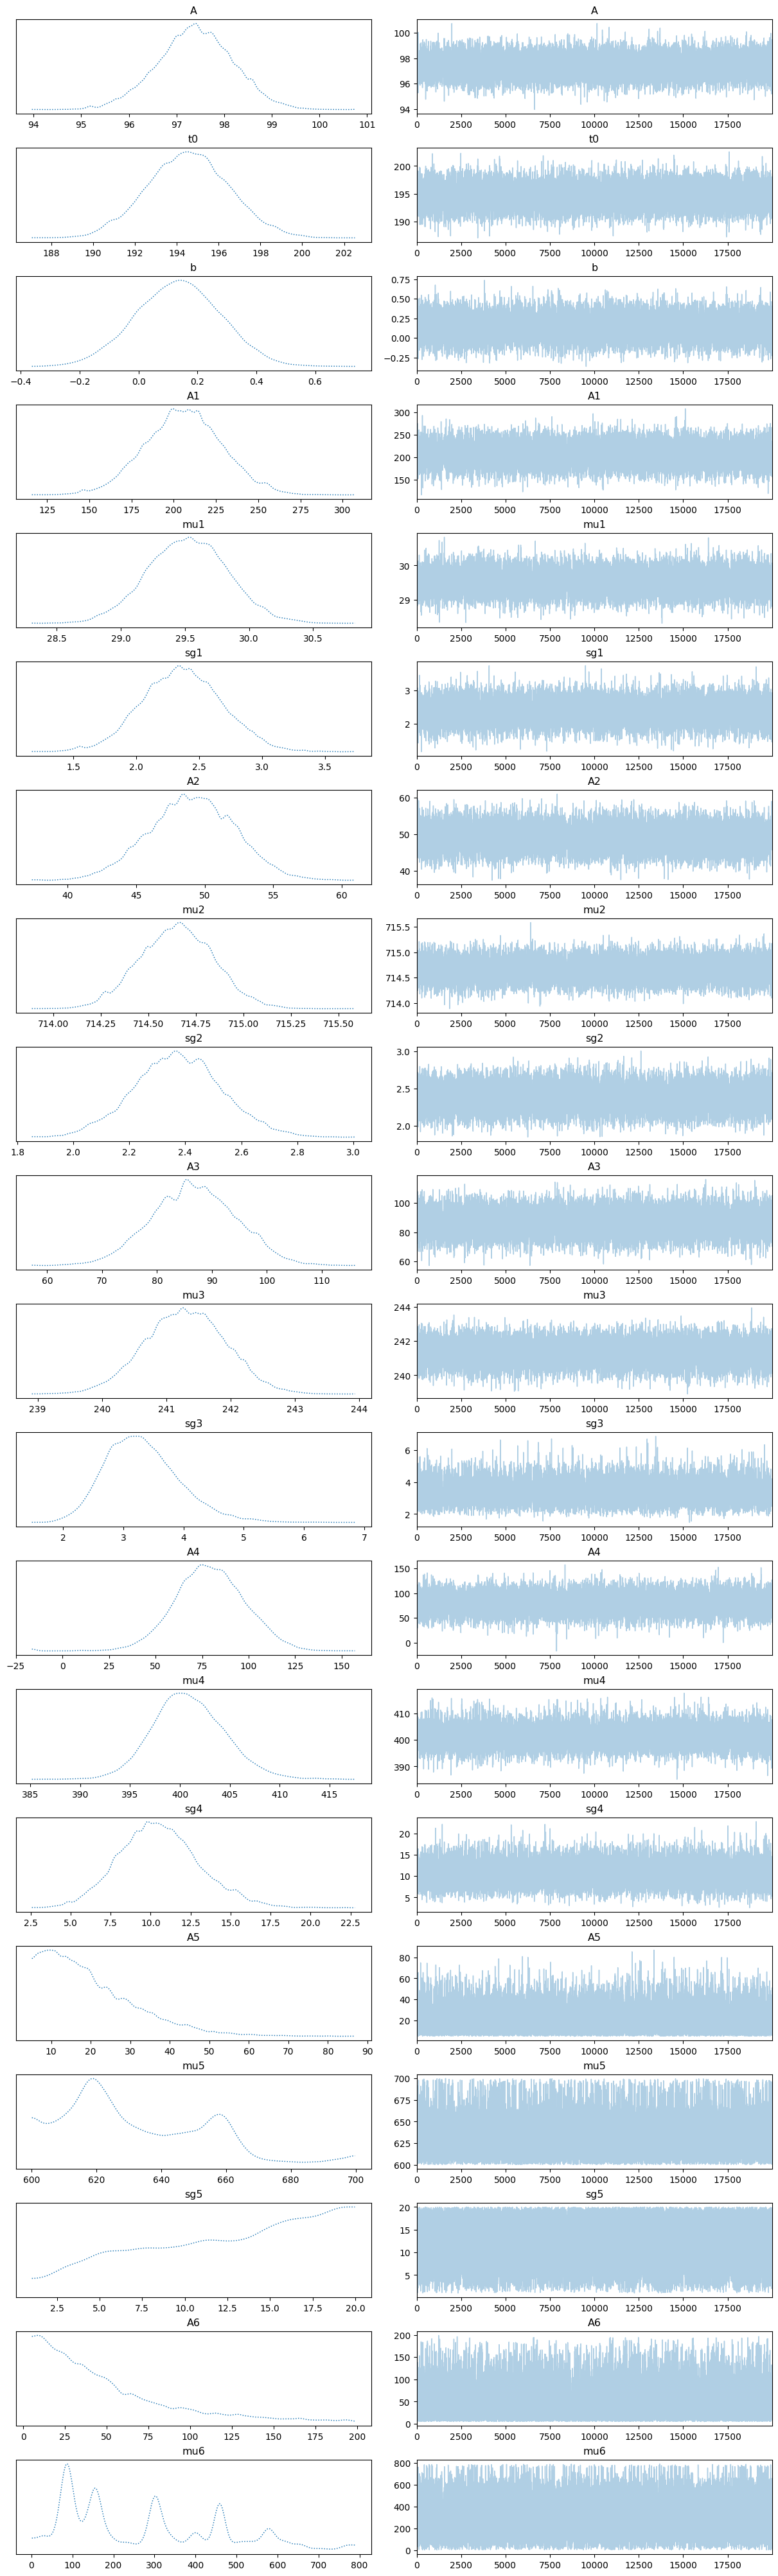

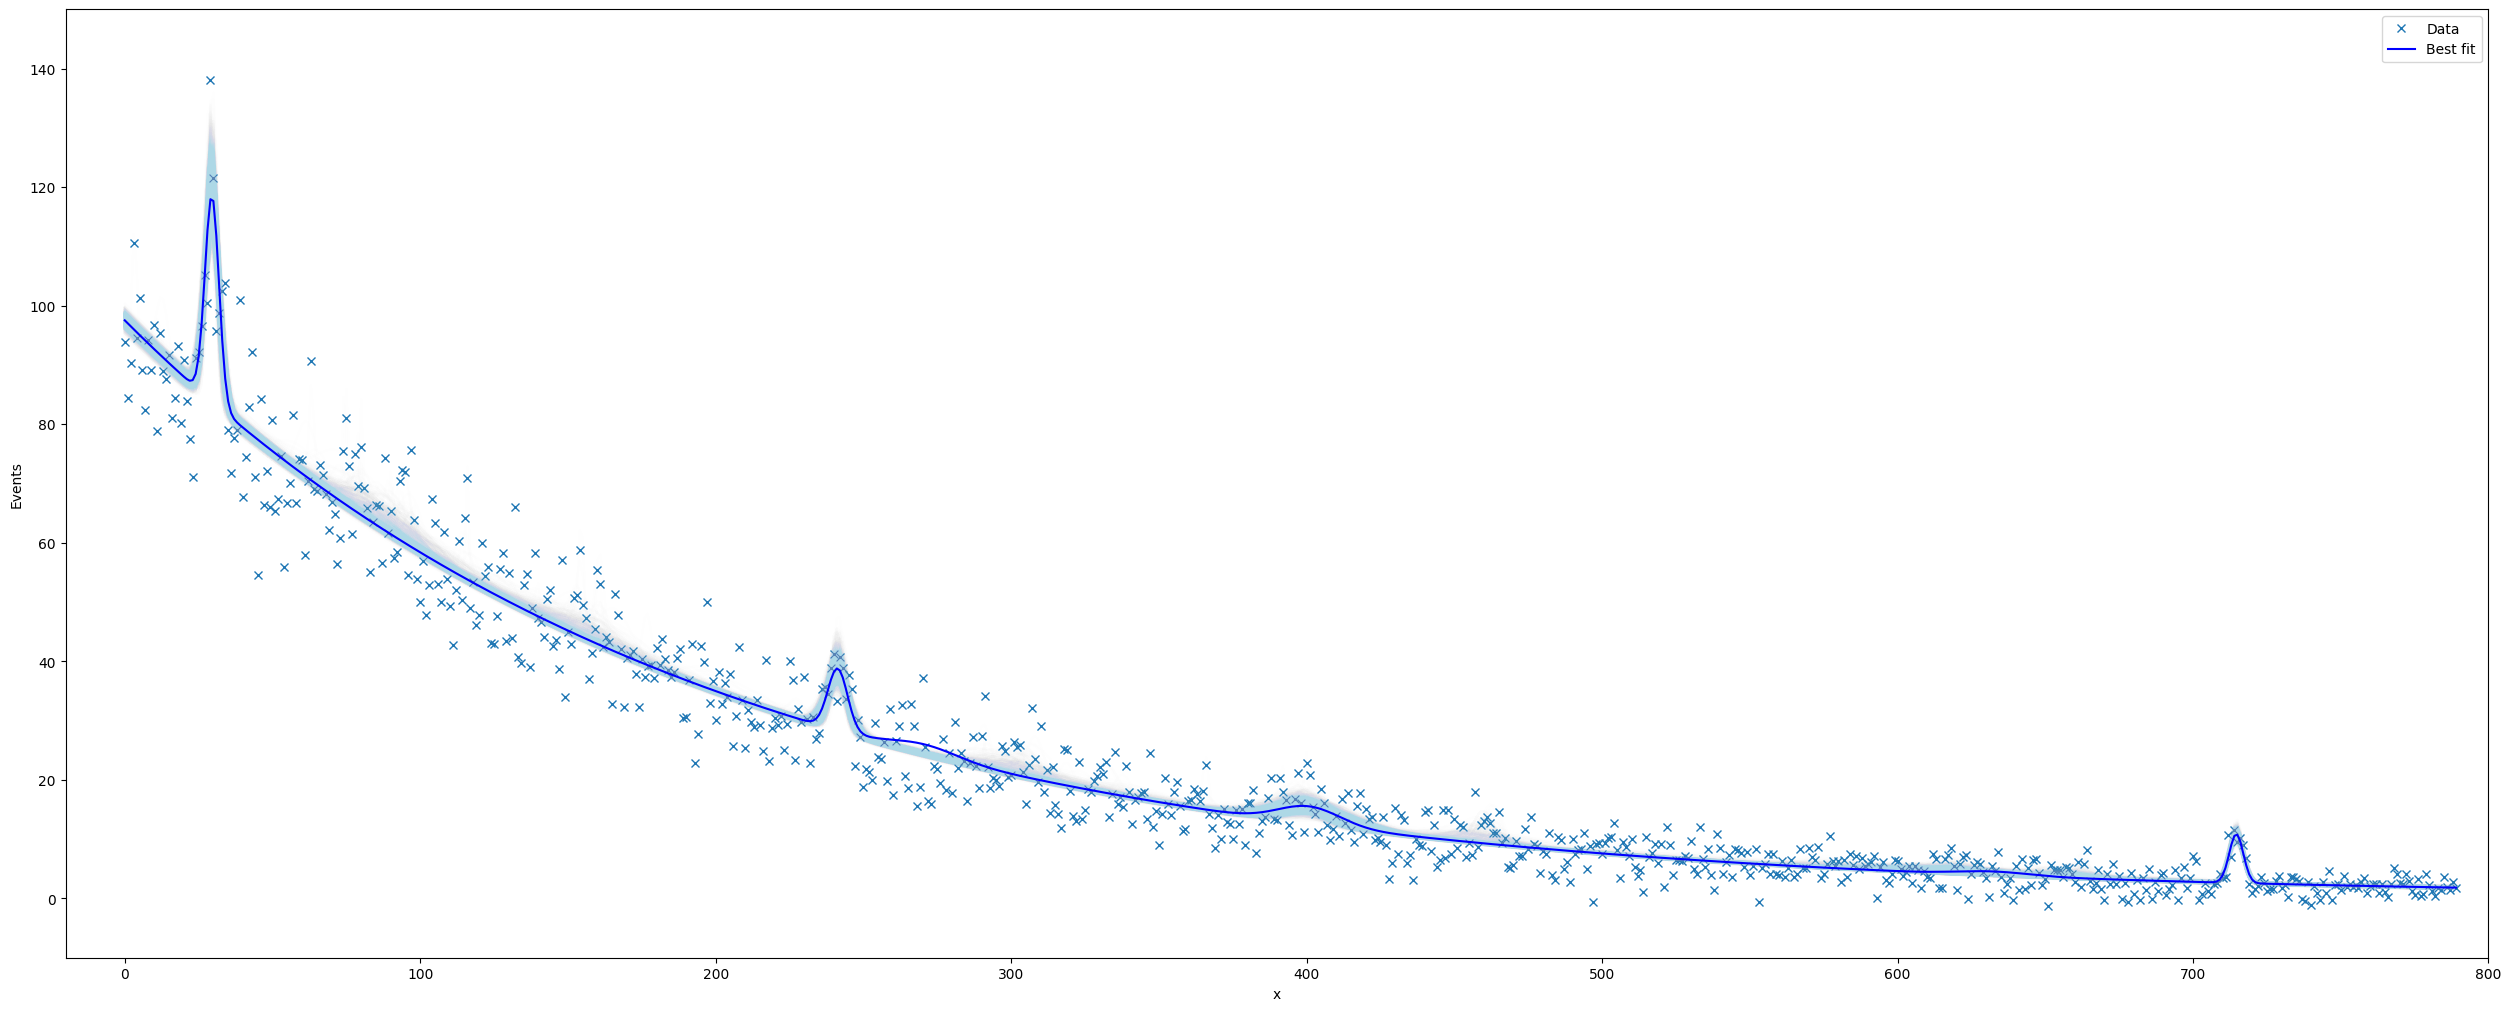

In [31]:
# @title Exp + 6G
#summary
summary = az.summary(trace_SMC_like, var_names=["A", "t0", "b",
                                                "A1", "mu1", "sg1",
                                                "A2", "mu2", "sg2",
                                                "A3", "mu3", "sg3",
                                                "A4", "mu4", "sg4",
                                                "A5", "mu5", "sg5",
                                                "A6", "mu6", "sg6"], round_to=5, kind="stats")
print(summary)
# Plot trace of MCMC
az.plot_trace(trace, combined=True);

# Plot the best fit on top of the data for this Model
# Visualize fit and uncertainty
# plot the data
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
plt.plot(xdata, ydata, 'x',label="Data")
plt.ylim(-10, 150)

# Get the mean inferred values
burnin = 1000

# we have multiple chains, so only get 1
# note: we need to convert the object to a numpy array
A_t = trace["posterior"]["A"][0].to_numpy()
t0_t = trace["posterior"]["t0"][0].to_numpy()
b_t = trace["posterior"]["b"][0].to_numpy()
A1_t = trace["posterior"]["A1"][0].to_numpy()
mu1_t = trace["posterior"]["mu1"][0].to_numpy()
sg1_t = trace["posterior"]["sg1"][0].to_numpy()
A2_t = trace["posterior"]["A2"][0].to_numpy()
mu2_t = trace["posterior"]["mu2"][0].to_numpy()
sg2_t = trace["posterior"]["sg2"][0].to_numpy()
A3_t = trace["posterior"]["A3"][0].to_numpy()
mu3_t = trace["posterior"]["mu3"][0].to_numpy()
sg3_t = trace["posterior"]["sg3"][0].to_numpy()
A4_t = trace["posterior"]["A4"][0].to_numpy()
mu4_t = trace["posterior"]["mu4"][0].to_numpy()
sg4_t = trace["posterior"]["sg4"][0].to_numpy()
A5_t = trace["posterior"]["A5"][0].to_numpy()
mu5_t = trace["posterior"]["mu5"][0].to_numpy()
sg5_t = trace["posterior"]["sg5"][0].to_numpy()
A6_t = trace["posterior"]["A6"][0].to_numpy()
mu6_t = trace["posterior"]["mu6"][0].to_numpy()
sg6_t = trace["posterior"]["sg6"][0].to_numpy()

# Get the mean of the marginalized Posterior as the best fit estimate of the parameters
A_m = A_t.mean()
t0_m = t0_t.mean()
b_m = b_t.mean()
A1_m = A1_t.mean()
mu1_m = mu1_t.mean()
sg1_m = sg1_t.mean()
A2_m = A2_t.mean()
mu2_m = mu2_t.mean()
sg2_m = sg2_t.mean()
A3_m = A3_t.mean()
mu3_m = mu3_t.mean()
sg3_m = sg3_t.mean()
A4_m = A4_t.mean()
mu4_m = mu4_t.mean()
sg4_m = sg4_t.mean()
A5_m = A5_t.mean()
mu5_m = mu5_t.mean()
sg5_m = sg5_t.mean()
A6_m = A6_t.mean()
mu6_m = mu6_t.mean()
sg6_m = sg6_t.mean()

# Plot all draws
draws = range(burnin, len(A_t), 10)
yvalues = Model_exp6G(xdata[:-1, np.newaxis], A_t[draws], t0_t[draws], b_t[draws],
                      A1_t[draws], mu1_t[draws], sg1_t[draws],
                      A2_t[draws], mu2_t[draws], sg2_t[draws],
                      A3_t[draws], mu3_t[draws], sg3_t[draws],
                      A4_t[draws], mu4_t[draws], sg4_t[draws],
                      A5_t[draws], mu5_t[draws], sg5_t[draws],
                      A6_t[draws], mu6_t[draws], sg6_t[draws])
plt.plot(xdata[:-1],  yvalues, c='lightblue', alpha=0.01)

# Plot the mean regression line
plt.plot(xdata, Model_exp6G(xdata, A_m, t0_m, b_m,
                            A1_m, mu1_m, sg1_m,
                            A2_m, mu2_m, sg2_m,
                            A3_m, mu3_m, sg3_m,
                            A4_m, mu4_m, sg4_m,
                            A5_m, mu5_m, sg5_m,
                            A6_m, mu6_m, sg6_m), c='blue', label="Best fit")

ax.set_xlim(-20, 800)
ax.set_xlabel("x");ax.set_ylabel("Events")
plt.legend(loc="upper right")
plt.show()

In [32]:
# @title Comparing to exp4G
print(logML_exp4G)
print(np.exp(logML_exp4G - logML_exp6G))
print(np.exp(logML_exp5G - logML_exp6G))

-2148.620093313843
16.033376366968717
7.556962253499186


In [18]:
# @title Exp + 7G: logML_exp7G
#decaying exponential plus gussians A*exp(-x/t0)+B +7G, expanded search
def Model_exp7G(x, A, t0, B,
                A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                A4, mu4, sg4, A5, mu5, sg5, A6, mu6, sg6,
                A7, mu7, sg7):
  ret = A*np.exp(-x/t0) + B
  ret = ret + A1/np.sqrt(2*np.pi*sg1**2)*np.exp(-0.5*(x-mu1)**2/sg1**2)
  ret = ret + A2/np.sqrt(2*np.pi*sg2**2)*np.exp(-0.5*(x-mu2)**2/sg2**2)
  ret = ret + A3/np.sqrt(2*np.pi*sg3**2)*np.exp(-0.5*(x-mu3)**2/sg3**2)
  ret = ret + A4/np.sqrt(2*np.pi*sg4**2)*np.exp(-0.5*(x-mu4)**2/sg4**2)
  ret = ret + A5/np.sqrt(2*np.pi*sg5**2)*np.exp(-0.5*(x-mu5)**2/sg5**2)
  ret = ret + A6/np.sqrt(2*np.pi*sg6**2)*np.exp(-0.5*(x-mu6)**2/sg6**2)
  ret = ret + A7/np.sqrt(2*np.pi*sg7**2)*np.exp(-0.5*(x-mu7)**2/sg7**2)
  return ret

@as_op(itypes=[pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar],
       otypes=[pt.dvector])
def Model_exp7G_Vector(A, t0, B,
                       A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                       A4, mu4, sg4, A5, mu5, sg5, A6, mu6, sg6,
                       A7, mu7, sg7):
    xvalues = np.arange(0, size, 1)
    mean_array = Model_exp7G(xvalues, A, t0, B,
                           A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                           A4, mu4, sg4, A5, mu5, sg5, A6, mu6, sg6,
                           A7, mu7, sg7)
    return np.array(mean_array)

with pm.Model() as model01:
    # Prior on the Amp, t0, B of Signal
    A = pm.Normal('A', 98.46158,  1.14220)
    t0 = pm.Normal('t0', 195.22367,  3.25328)
    b = pm.Normal('b', 0.31804,  0.22330)
    # Priors on A, mu, sg of gaussians
    A1 = pm.Normal("A1", 204.18861, 34.02969)
    mu1 = pm.Normal("mu1", 29.52595, 0.44748)
    sg1 = pm.Normal("sg1", 2.37749, 0.49709)
    A2 = pm.Normal("A2", 48.74970,   3.96356)
    mu2 = pm.Normal("mu2", 714.65319,   0.24009)
    sg2 = pm.Normal("sg2", 2.38225,   0.19807)
    A3 = pm.Normal("A3", 86.43558,   8.35934)
    mu3 = pm.Normal("mu3", 241.37002,   0.83641)
    sg3 = pm.Normal("sg3", 3.19385,   1.46562)
    A4 = pm.Normal("A4", 75.81852,  26.90795)
    mu4 = pm.Normal("mu4", 404.53898,   8.57050)
    sg4 = pm.Normal("sg4", 10.99224,   3.63257)
    A5 = pm.Normal("A5", 20.10207, 11.73657)
    mu5 = pm.Normal("mu5", 632.38990, 21.54526)
    sg5 = pm.Normal("sg5", 12.48364, 5.14688)
    A6 = pm.Uniform("A6", lower=5, upper = 200)
    mu6 = pm.Uniform("mu6", lower=1, upper = 400)
    sg6 = pm.Uniform("sg6", lower=0.1, upper = 20)
    A7 = pm.Uniform("A7", lower=5, upper = 200)
    mu7 = pm.Uniform("mu7", lower=400, upper = 790)
    sg7 = pm.Uniform("sg7", lower=0.1, upper = 20)
    #vector evaluator
    sigma = (Model_exp(xdata, 98.54028, 194.67769, 0.36055))**0.5
    mu=Model_exp7G_Vector(A, t0, b, A1, mu1,
                          sg1, A2, mu2, sg2, A3, mu3, sg3,
                          A4, mu4, sg4, A5, mu5, sg5, A6, mu6, sg6,
                          A7, mu7, sg7)
    # Likelihood Normal
    y = pm.Normal("y", mu=mu, sigma = sigma, observed = ydata)

# We run Sequential Monte Carlo to extract the Marginal Log Likelihood P(M|D)
# But with the current version of PyMC v5 we have to use a single chain (1 CPU core)
draws = 20000
with model01:
    trace_SMC_like = pm.sample_smc(draws, chains = 1)
trace = trace_SMC_like
logML_exp7G = trace.sample_stats["log_marginal_likelihood"].mean().to_numpy()

          mean         sd     hdi_3%    hdi_97%
A     97.37701    0.79623   95.98265   98.91488
t0   194.23887    1.94921  190.76351  198.13871
b      0.13570    0.14483   -0.14257    0.40764
A1   206.93583   23.19608  163.74977  249.34727
mu1   29.52820    0.31400   28.92739   30.11167
sg1    2.36575    0.31607    1.75352    2.95011
A2    49.17394    3.15205   42.89990   54.71567
mu2  714.65255    0.19119  714.28705  715.01455
sg2    2.37842    0.15597    2.08440    2.66759
A3    87.03565    7.69192   72.75436  101.43104
mu3  241.29707    0.62715  240.14156  242.48905
sg3    3.33767    0.62870    2.21625    4.52212
A4    79.69170   18.61870   45.31308  115.91287
mu4  400.87968    3.63906  394.48754  408.36870
sg4   10.48781    2.49032    5.85956   15.06702
A5    17.77393    9.93718   -2.04709   35.99127
mu5  627.38170   19.53012  590.33452  662.85200
sg5   13.56322    4.80885    4.71768   22.45991
A6    56.91238   41.02479    5.04998  135.20340
mu6  172.42791  100.76515   13.75378  34

/usr/local/lib/python3.10/dist-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (24), generating only 20 plots
  warnings.warn(


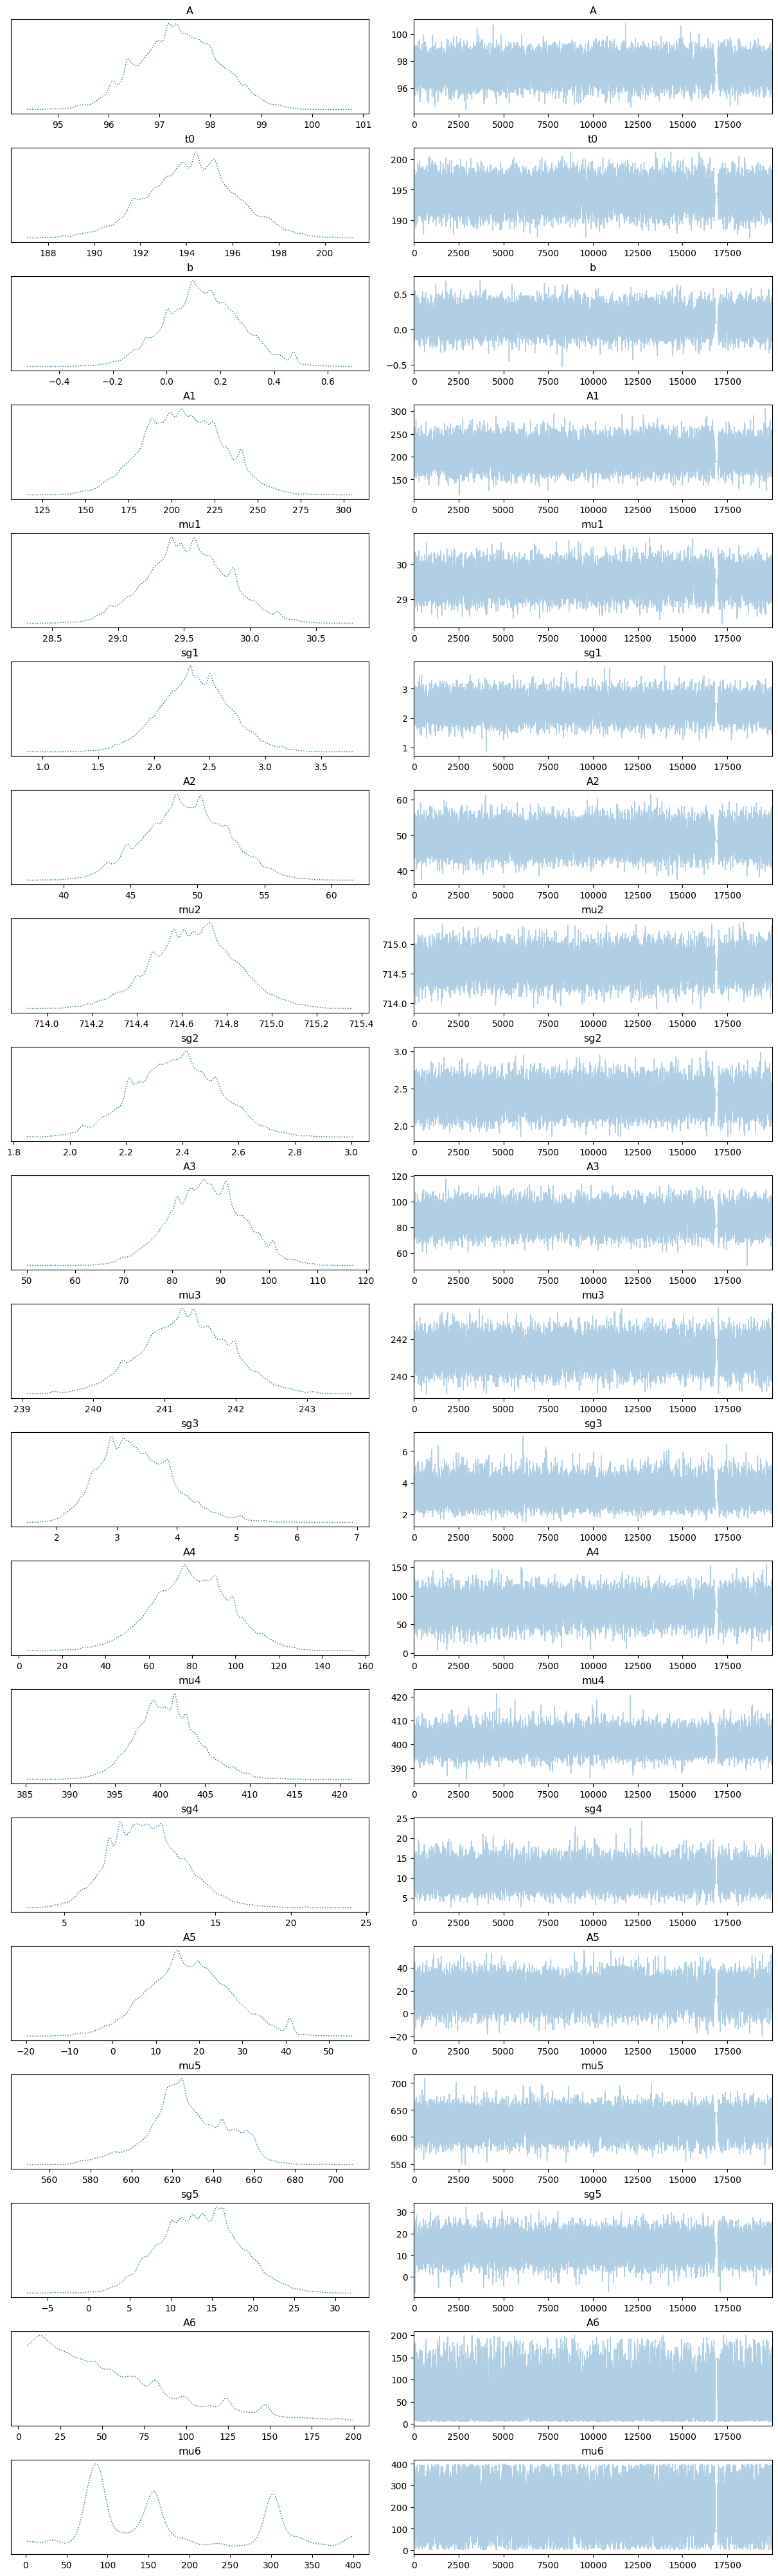

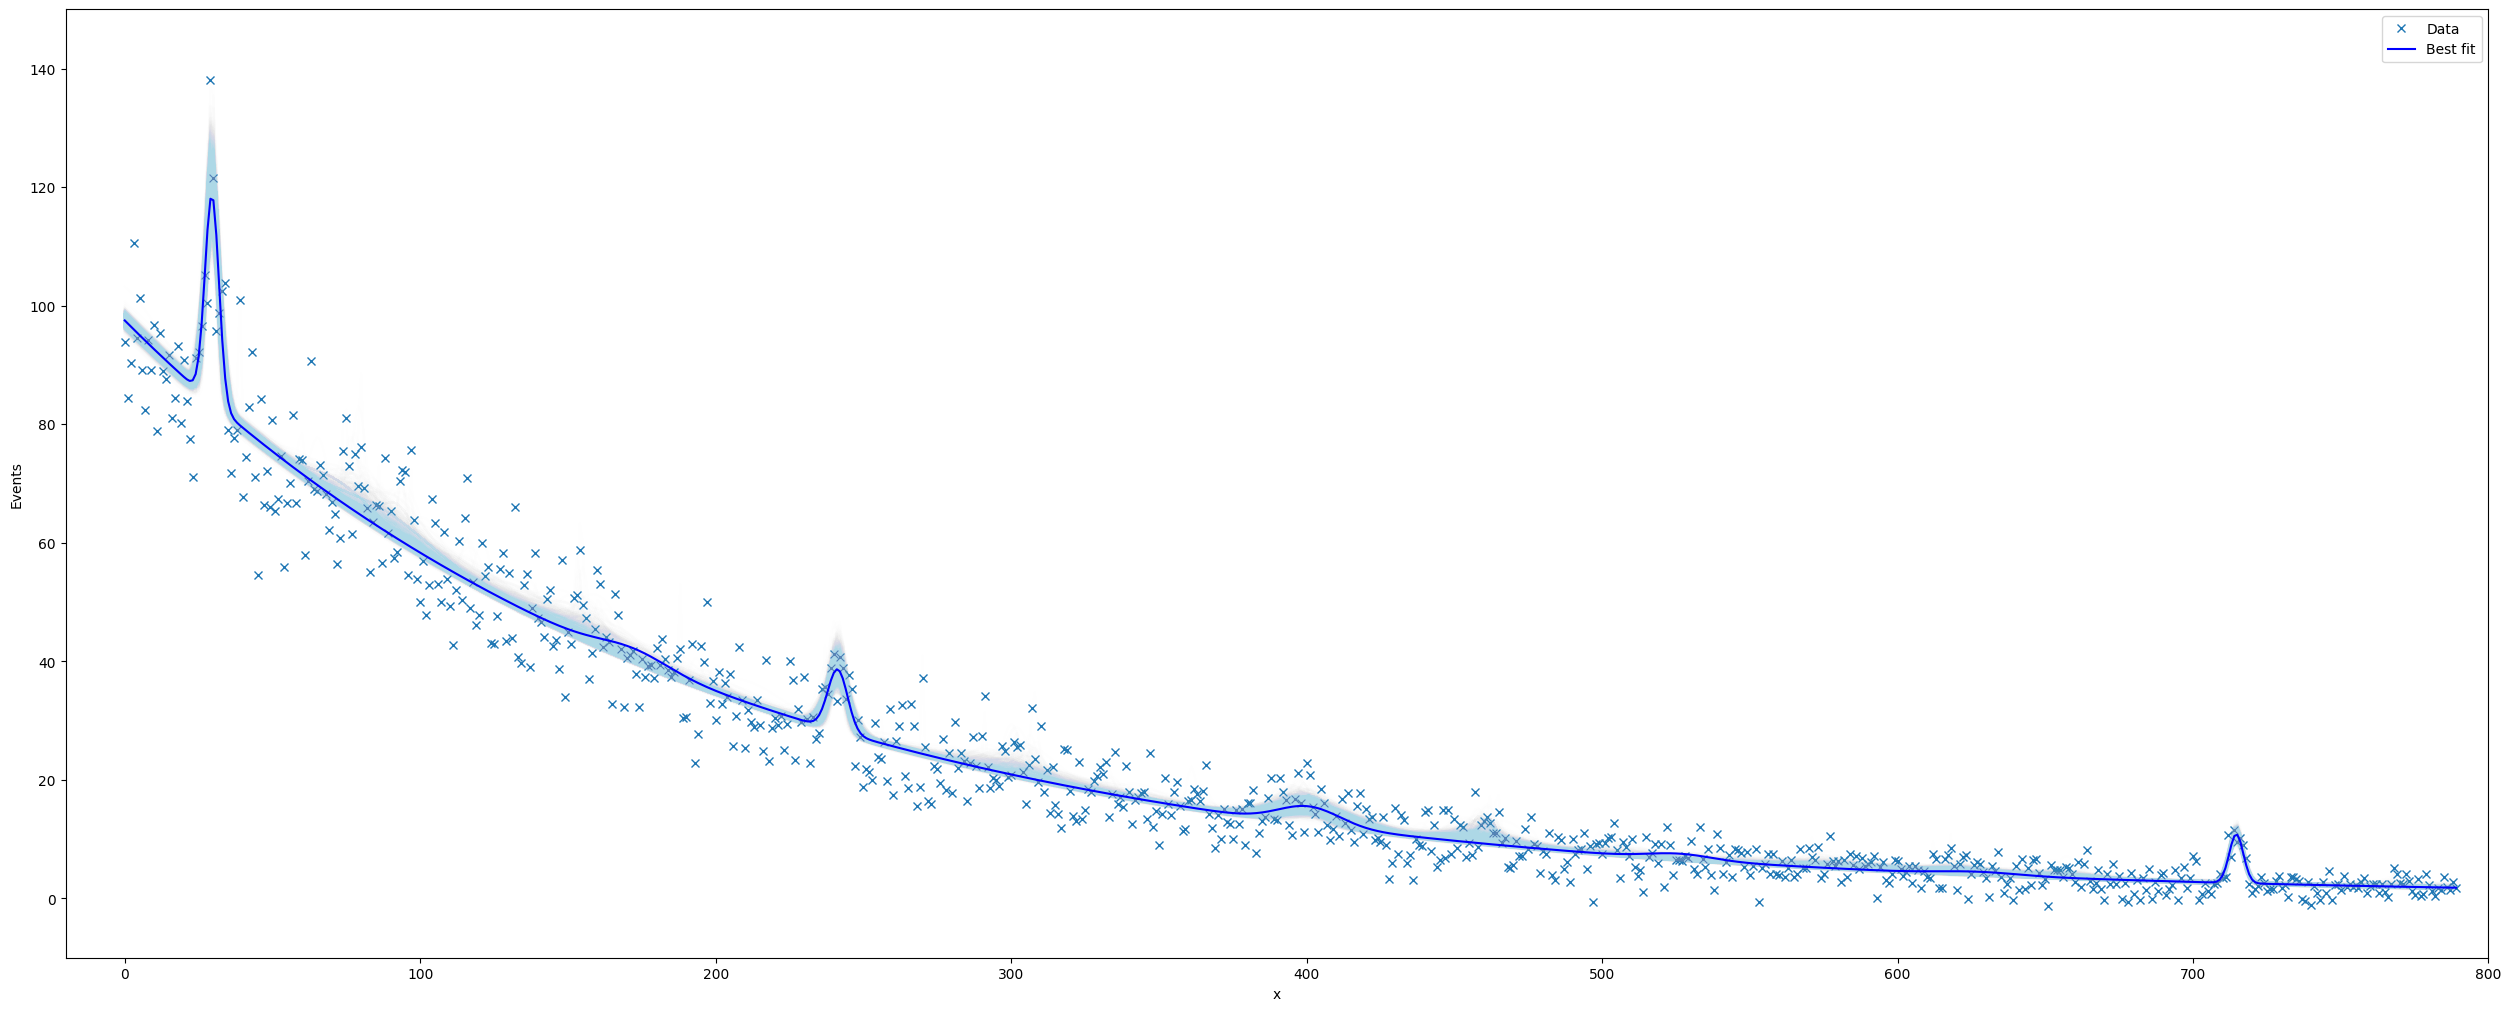

In [19]:
# @title Exp + 7G
#summary
summary = az.summary(trace_SMC_like, var_names=["A", "t0", "b",
                                                "A1", "mu1", "sg1",
                                                "A2", "mu2", "sg2",
                                                "A3", "mu3", "sg3",
                                                "A4", "mu4", "sg4",
                                                "A5", "mu5", "sg5",
                                                "A6", "mu6", "sg6",
                                                "A7", "mu7", "sg7"], round_to=5, kind="stats")
print(summary)
# Plot trace of MCMC
az.plot_trace(trace, combined=True);

# Plot the best fit on top of the data for this Model
# Visualize fit and uncertainty
# plot the data
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
plt.plot(xdata, ydata, 'x',label="Data")
plt.ylim(-10, 150)

# Get the mean inferred values
burnin = 1000

# we have multiple chains, so only get 1
# note: we need to convert the object to a numpy array
A_t = trace["posterior"]["A"][0].to_numpy()
t0_t = trace["posterior"]["t0"][0].to_numpy()
b_t = trace["posterior"]["b"][0].to_numpy()
A1_t = trace["posterior"]["A1"][0].to_numpy()
mu1_t = trace["posterior"]["mu1"][0].to_numpy()
sg1_t = trace["posterior"]["sg1"][0].to_numpy()
A2_t = trace["posterior"]["A2"][0].to_numpy()
mu2_t = trace["posterior"]["mu2"][0].to_numpy()
sg2_t = trace["posterior"]["sg2"][0].to_numpy()
A3_t = trace["posterior"]["A3"][0].to_numpy()
mu3_t = trace["posterior"]["mu3"][0].to_numpy()
sg3_t = trace["posterior"]["sg3"][0].to_numpy()
A4_t = trace["posterior"]["A4"][0].to_numpy()
mu4_t = trace["posterior"]["mu4"][0].to_numpy()
sg4_t = trace["posterior"]["sg4"][0].to_numpy()
A5_t = trace["posterior"]["A5"][0].to_numpy()
mu5_t = trace["posterior"]["mu5"][0].to_numpy()
sg5_t = trace["posterior"]["sg5"][0].to_numpy()
A6_t = trace["posterior"]["A6"][0].to_numpy()
mu6_t = trace["posterior"]["mu6"][0].to_numpy()
sg6_t = trace["posterior"]["sg6"][0].to_numpy()
A7_t = trace["posterior"]["A7"][0].to_numpy()
mu7_t = trace["posterior"]["mu7"][0].to_numpy()
sg7_t = trace["posterior"]["sg7"][0].to_numpy()

# Get the mean of the marginalized Posterior as the best fit estimate of the parameters
A_m = A_t.mean()
t0_m = t0_t.mean()
b_m = b_t.mean()
A1_m = A1_t.mean()
mu1_m = mu1_t.mean()
sg1_m = sg1_t.mean()
A2_m = A2_t.mean()
mu2_m = mu2_t.mean()
sg2_m = sg2_t.mean()
A3_m = A3_t.mean()
mu3_m = mu3_t.mean()
sg3_m = sg3_t.mean()
A4_m = A4_t.mean()
mu4_m = mu4_t.mean()
sg4_m = sg4_t.mean()
A5_m = A5_t.mean()
mu5_m = mu5_t.mean()
sg5_m = sg5_t.mean()
A6_m = A6_t.mean()
mu6_m = mu6_t.mean()
sg6_m = sg6_t.mean()
A7_m = A7_t.mean()
mu7_m = mu7_t.mean()
sg7_m = sg7_t.mean()

# Plot all draws
draws = range(burnin, len(A_t), 10)
yvalues = Model_exp7G(xdata[:-1, np.newaxis], A_t[draws], t0_t[draws], b_t[draws],
                      A1_t[draws], mu1_t[draws], sg1_t[draws],
                      A2_t[draws], mu2_t[draws], sg2_t[draws],
                      A3_t[draws], mu3_t[draws], sg3_t[draws],
                      A4_t[draws], mu4_t[draws], sg4_t[draws],
                      A5_t[draws], mu5_t[draws], sg5_t[draws],
                      A6_t[draws], mu6_t[draws], sg6_t[draws],
                      A7_t[draws], mu7_t[draws], sg7_t[draws])
plt.plot(xdata[:-1],  yvalues, c='lightblue', alpha=0.01)

# Plot the mean regression line
plt.plot(xdata, Model_exp7G(xdata, A_m, t0_m, b_m,
                            A1_m, mu1_m, sg1_m,
                            A2_m, mu2_m, sg2_m,
                            A3_m, mu3_m, sg3_m,
                            A4_m, mu4_m, sg4_m,
                            A5_m, mu5_m, sg5_m,
                            A6_m, mu6_m, sg6_m,
                            A7_m, mu7_m, sg7_m), c='blue', label="Best fit")

ax.set_xlim(-20, 800)
ax.set_xlabel("x");ax.set_ylabel("Events")
plt.legend(loc="upper right")
plt.show()

In [ ]:
# @title Exp + 8G, constrained search : log_marg_like_exp8Gconst
#decaying exponential plus gussians A*exp(-x/t0)+B +8G, expanded search
def Model_exp8G(x, A, t0, B,
                A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                A4, mu4, sg4, A5, mu5, sg5, A6, mu6, sg6,
                A7, mu7, sg7, A8, mu8, sg8):
  ret = A*np.exp(-x/t0) + B
  ret = ret + A1/np.sqrt(2*np.pi*sg1**2)*np.exp(-0.5*(x-mu1)**2/sg1**2)
  ret = ret + A2/np.sqrt(2*np.pi*sg2**2)*np.exp(-0.5*(x-mu2)**2/sg2**2)
  ret = ret + A3/np.sqrt(2*np.pi*sg3**2)*np.exp(-0.5*(x-mu3)**2/sg3**2)
  ret = ret + A4/np.sqrt(2*np.pi*sg4**2)*np.exp(-0.5*(x-mu4)**2/sg4**2)
  ret = ret + A5/np.sqrt(2*np.pi*sg5**2)*np.exp(-0.5*(x-mu5)**2/sg5**2)
  ret = ret + A6/np.sqrt(2*np.pi*sg6**2)*np.exp(-0.5*(x-mu6)**2/sg6**2)
  ret = ret + A7/np.sqrt(2*np.pi*sg7**2)*np.exp(-0.5*(x-mu7)**2/sg7**2)
  ret = ret + A8/np.sqrt(2*np.pi*sg8**2)*np.exp(-0.5*(x-mu8)**2/sg8**2)
  return ret

@as_op(itypes=[pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar,
               pt.dscalar, pt.dscalar, pt.dscalar],
       otypes=[pt.dvector])
def Model_exp8G_Vector(A, t0, B,
                       A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                       A4, mu4, sg4, A5, mu5, sg5, A6, mu6, sg6,
                       A7, mu7, sg7, A8, mu8, sg8):
    xvalues = np.arange(0, size, 1)
    mean_array = Model_exp8G(xvalues, A, t0, B,
                           A1, mu1, sg1, A2, mu2, sg2, A3, mu3, sg3,
                           A4, mu4, sg4, A5, mu5, sg5, A6, mu6, sg6,
                           A7, mu7, sg7, A8, mu8, sg8)
    return np.array(mean_array)

with pm.Model() as model01:
    # Prior on the Amp, t0, B of Signal
    A = pm.Uniform("A", lower=80, upper = 150.0)
    t0 = pm.Uniform("t0", lower=100, upper=300.0)
    b = pm.Uniform("b", lower=-5.0, upper=5.0)#pm.Normal("b", 0.0, 10.0)
    # Priors on A, mu, sg of gaussians
    #------constrained gaussians start------
    A1 = pm.Uniform("A1", lower=100, upper = 500)
    mu1 = pm.Uniform("mu1", lower=20, upper = 40)
    sg1 = pm.Uniform("sg1", lower=0.1, upper = 5)
    A2 = pm.Uniform("A2", lower=5, upper = 150)
    mu2 = pm.Uniform("mu2", lower=220, upper = 260)
    sg2 = pm.Uniform("sg2", lower=0.1, upper = 30)
    A3 = pm.Uniform("A3", lower=5, upper = 100)
    mu3 = pm.Uniform("mu3", lower=700, upper = 750)
    sg3 = pm.Uniform("sg3", lower=0.1, upper = 30)
    #------constrained gaussians end-------
    A4 = pm.Uniform("A4", lower=5, upper = 200)
    mu4 = pm.Uniform("mu4", lower=0, upper = 790)
    sg4 = pm.Uniform("sg4", lower=0.1, upper = 20)
    A5 = pm.Uniform("A5", lower=5, upper = 200)
    mu5 = pm.Uniform("mu5", lower=0, upper = 790)
    sg5 = pm.Uniform("sg5", lower=0.1, upper = 20)
    A6 = pm.Uniform("A6", lower=5, upper = 200)
    mu6 = pm.Uniform("mu6", lower=0, upper = 790)
    sg6 = pm.Uniform("sg6", lower=0.1, upper = 20)
    A7 = pm.Uniform("A7", lower=5, upper = 200)
    mu7 = pm.Uniform("mu7", lower=0, upper = 790)
    sg7 = pm.Uniform("sg7", lower=0.1, upper = 20)
    A8 = pm.Uniform("A8", lower=5, upper = 200)
    mu8 = pm.Uniform("mu8", lower=0, upper = 790)
    sg8 = pm.Uniform("sg8", lower=0.1, upper = 20)
    #vector evaluator
    mu=Model_exp8G_Vector(A, t0, b, A1, mu1,
                          sg1, A2, mu2, sg2, A3, mu3, sg3,
                          A4, mu4, sg4, A5, mu5, sg5, A6, mu6, sg6,
                          A7, mu7, sg7, A8, mu8, sg8)
    # Likelihood Normal
    y = pm.Normal("y", mu=mu, observed = ydata)

# We run Sequential Monte Carlo to extract the Marginal Log Likelihood P(M|D)
# But with the current version of PyMC v5 we have to use a single chain (1 CPU core)
draws = 20000
with model01:
    trace_SMC_like = pm.sample_smc(draws, chains = 1)
trace = trace_SMC_like
log_marg_like_exp8Gconst = trace.sample_stats["log_marginal_likelihood"].mean().to_numpy()

          mean       sd     hdi_3%    hdi_97%
A     93.74958  0.05223   93.64566   93.84136
t0   202.64406  0.23060  202.21232  203.07516
b     -0.22533  0.02743   -0.27664   -0.17447
A1   241.37295  1.17354  239.18687  243.58019
mu1   29.49945  0.02209   29.45850   29.54103
sg1    2.50428  0.01271    2.47992    2.52781
A2    82.92068  0.99776   81.10925   84.83923
mu2  241.42558  0.09742  241.24894  241.61454
sg2    3.19083  0.02634    3.14169    3.23958
A3    44.71985  2.00249   41.04748   48.59403
mu3  714.89994  0.16350  714.58311  715.19610
sg3    2.29942  0.13052    2.05917    2.54789
A4    41.14344  1.54618   38.27962   44.07923
mu4   85.15855  2.90643   79.87527   90.86714
sg4   13.55262  0.34277   12.90248   14.18780
A5   107.50466  3.71330  100.55116  114.45367
mu5   84.75229  1.17682   82.58692   86.97185
sg5   12.99470  0.60009   11.84694   14.08291
A6    52.22387  2.69759   47.15159   57.24851
mu6  156.35491  1.19277  154.06005  158.54841
sg6    9.74830  0.45932    8.86901

/usr/local/lib/python3.10/dist-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (27), generating only 20 plots
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


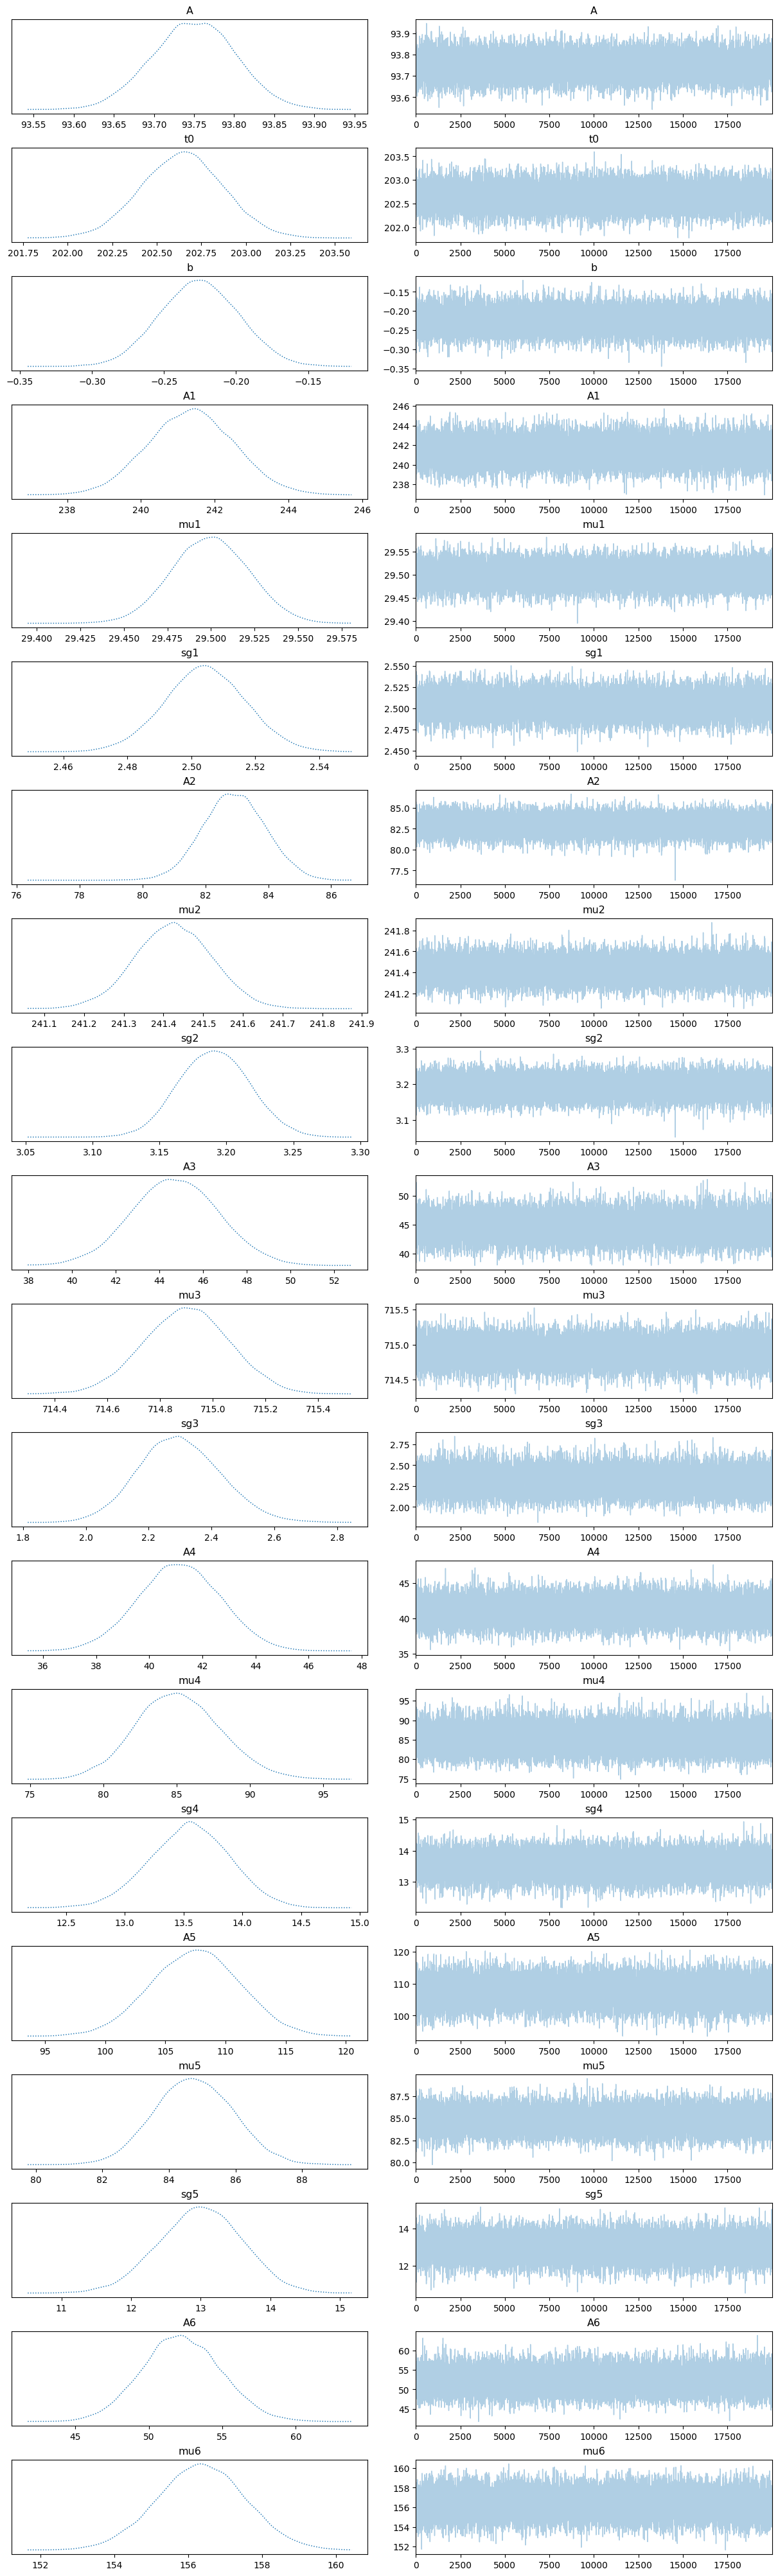

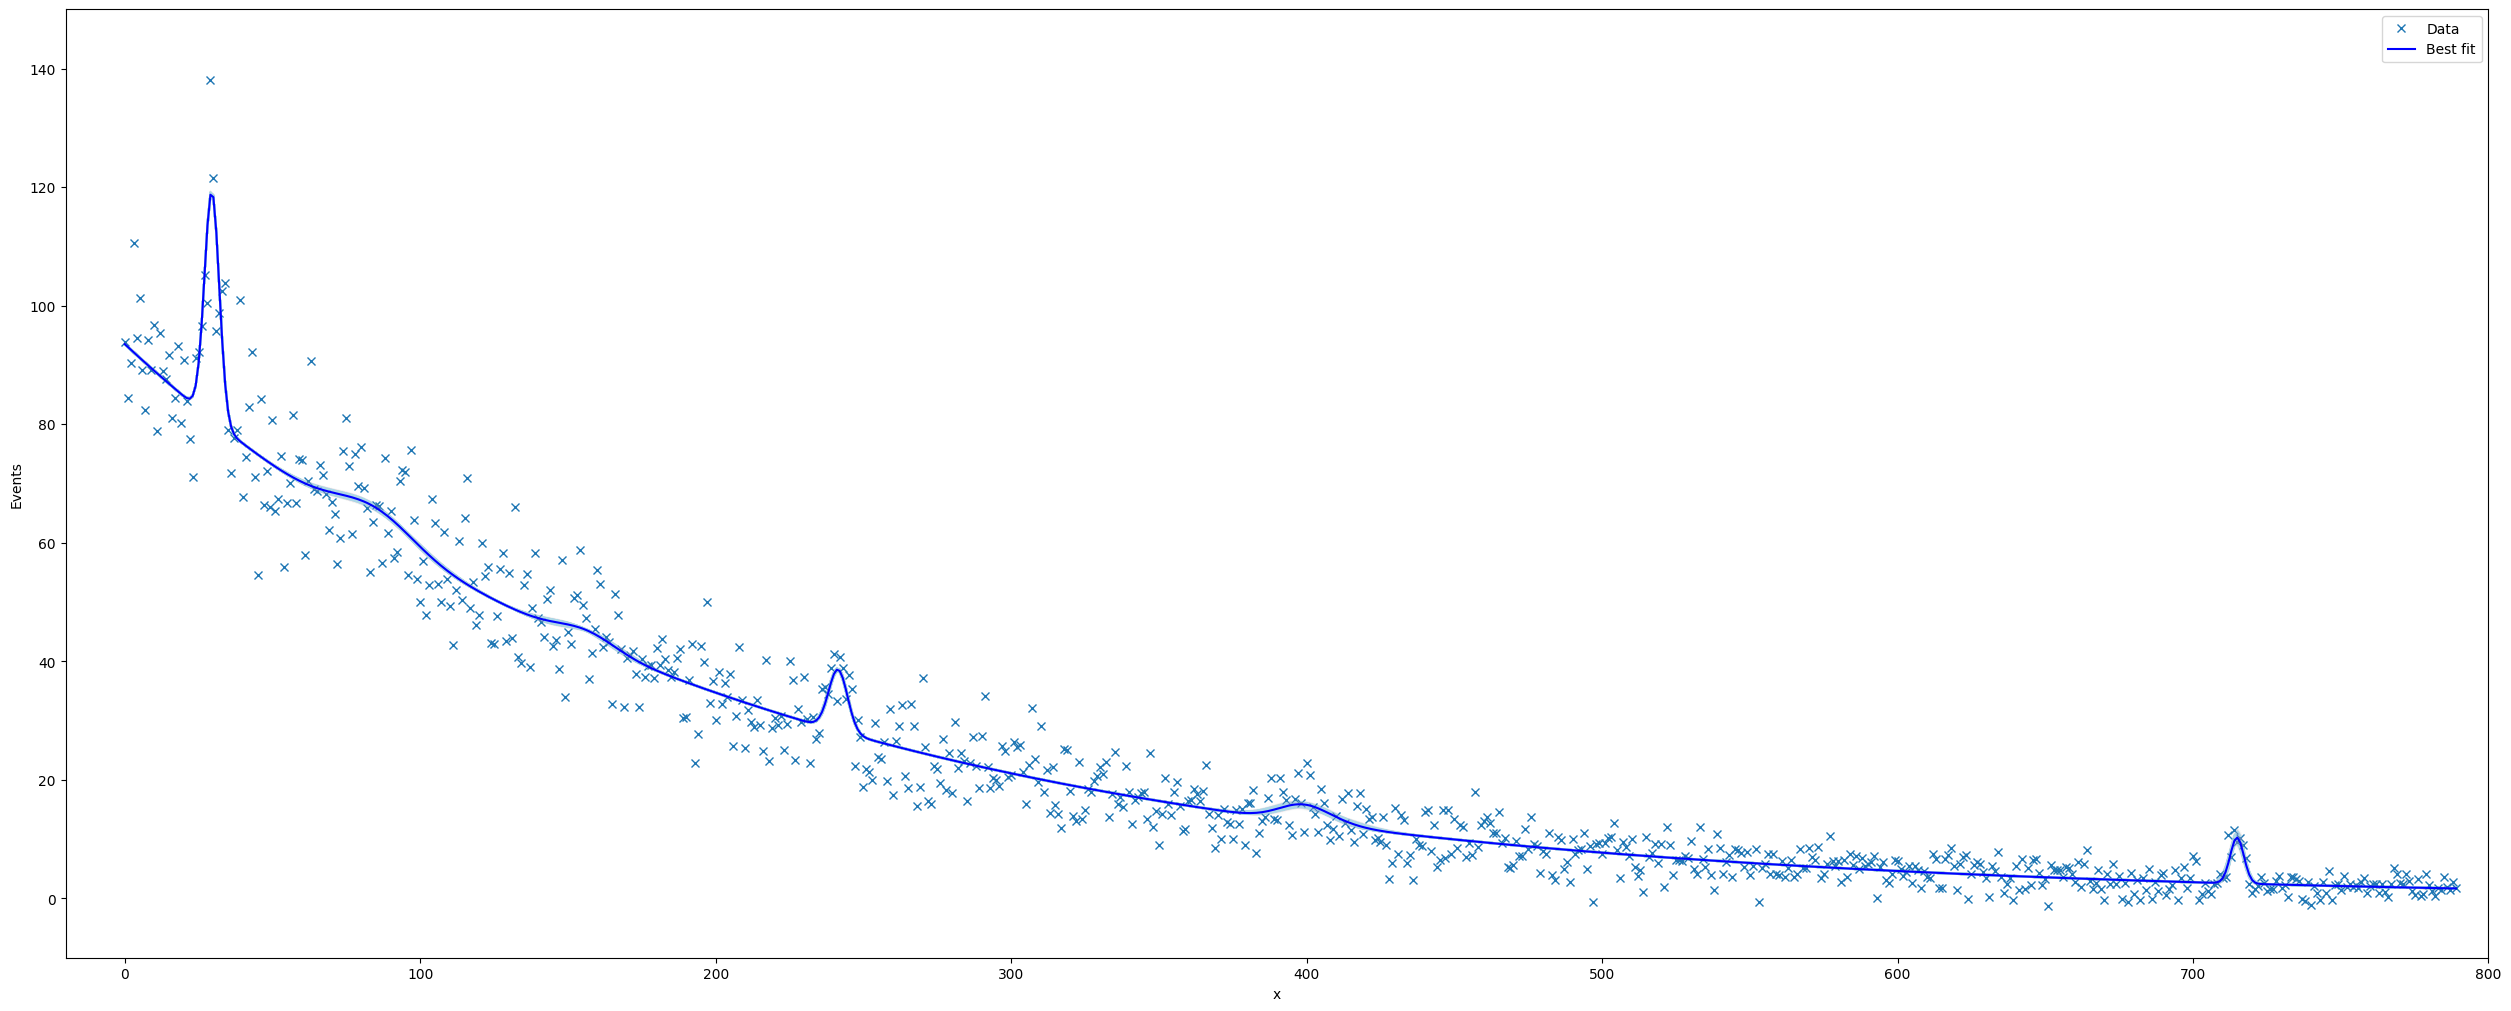

In [ ]:
# @title Exp + 8G, constrained search
#summary
summary = az.summary(trace_SMC_like, var_names=["A", "t0", "b",
                                                "A1", "mu1", "sg1",
                                                "A2", "mu2", "sg2",
                                                "A3", "mu3", "sg3",
                                                "A4", "mu4", "sg4",
                                                "A5", "mu5", "sg5",
                                                "A6", "mu6", "sg6",
                                                "A7", "mu7", "sg7",
                                                "A8", "mu8", "sg8"], round_to=5, kind="stats")
print(summary)
# Plot trace of MCMC
az.plot_trace(trace, combined=True);

# Plot the best fit on top of the data for this Model
# Visualize fit and uncertainty
# plot the data
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
plt.plot(xdata, ydata, 'x',label="Data")
plt.ylim(-10, 150)

# Get the mean inferred values
burnin = 1000

# we have multiple chains, so only get 1
# note: we need to convert the object to a numpy array
A_t = trace["posterior"]["A"][0].to_numpy()
t0_t = trace["posterior"]["t0"][0].to_numpy()
b_t = trace["posterior"]["b"][0].to_numpy()
A1_t = trace["posterior"]["A1"][0].to_numpy()
mu1_t = trace["posterior"]["mu1"][0].to_numpy()
sg1_t = trace["posterior"]["sg1"][0].to_numpy()
A2_t = trace["posterior"]["A2"][0].to_numpy()
mu2_t = trace["posterior"]["mu2"][0].to_numpy()
sg2_t = trace["posterior"]["sg2"][0].to_numpy()
A3_t = trace["posterior"]["A3"][0].to_numpy()
mu3_t = trace["posterior"]["mu3"][0].to_numpy()
sg3_t = trace["posterior"]["sg3"][0].to_numpy()
A4_t = trace["posterior"]["A4"][0].to_numpy()
mu4_t = trace["posterior"]["mu4"][0].to_numpy()
sg4_t = trace["posterior"]["sg4"][0].to_numpy()
A5_t = trace["posterior"]["A5"][0].to_numpy()
mu5_t = trace["posterior"]["mu5"][0].to_numpy()
sg5_t = trace["posterior"]["sg5"][0].to_numpy()
A6_t = trace["posterior"]["A6"][0].to_numpy()
mu6_t = trace["posterior"]["mu6"][0].to_numpy()
sg6_t = trace["posterior"]["sg6"][0].to_numpy()
A7_t = trace["posterior"]["A7"][0].to_numpy()
mu7_t = trace["posterior"]["mu7"][0].to_numpy()
sg7_t = trace["posterior"]["sg7"][0].to_numpy()
A8_t = trace["posterior"]["A8"][0].to_numpy()
mu8_t = trace["posterior"]["mu8"][0].to_numpy()
sg8_t = trace["posterior"]["sg8"][0].to_numpy()

# Get the mean of the marginalized Posterior as the best fit estimate of the parameters
A_m = A_t.mean()
t0_m = t0_t.mean()
b_m = b_t.mean()
A1_m = A1_t.mean()
mu1_m = mu1_t.mean()
sg1_m = sg1_t.mean()
A2_m = A2_t.mean()
mu2_m = mu2_t.mean()
sg2_m = sg2_t.mean()
A3_m = A3_t.mean()
mu3_m = mu3_t.mean()
sg3_m = sg3_t.mean()
A4_m = A4_t.mean()
mu4_m = mu4_t.mean()
sg4_m = sg4_t.mean()
A5_m = A5_t.mean()
mu5_m = mu5_t.mean()
sg5_m = sg5_t.mean()
A6_m = A6_t.mean()
mu6_m = mu6_t.mean()
sg6_m = sg6_t.mean()
A7_m = A7_t.mean()
mu7_m = mu7_t.mean()
sg7_m = sg7_t.mean()
A8_m = A8_t.mean()
mu8_m = mu8_t.mean()
sg8_m = sg8_t.mean()

# Plot all draws
draws = range(burnin, len(A_t), 10)
yvalues = Model_exp8G(xdata[:-1, np.newaxis], A_t[draws], t0_t[draws], b_t[draws],
                      A1_t[draws], mu1_t[draws], sg1_t[draws],
                      A2_t[draws], mu2_t[draws], sg2_t[draws],
                      A3_t[draws], mu3_t[draws], sg3_t[draws],
                      A4_t[draws], mu4_t[draws], sg4_t[draws],
                      A5_t[draws], mu5_t[draws], sg5_t[draws],
                      A6_t[draws], mu6_t[draws], sg6_t[draws],
                      A7_t[draws], mu7_t[draws], sg7_t[draws],
                      A8_t[draws], mu8_t[draws], sg8_t[draws])
plt.plot(xdata[:-1],  yvalues, c='lightblue', alpha=0.01)

# Plot the mean regression line
plt.plot(xdata, Model_exp8G(xdata, A_m, t0_m, b_m,
                            A1_m, mu1_m, sg1_m,
                            A2_m, mu2_m, sg2_m,
                            A3_m, mu3_m, sg3_m,
                            A4_m, mu4_m, sg4_m,
                            A5_m, mu5_m, sg5_m,
                            A6_m, mu6_m, sg6_m,
                            A7_m, mu7_m, sg7_m,
                            A8_m, mu8_m, sg8_m), c='blue', label="Best fit")

ax.set_xlim(-20, 800)
ax.set_xlabel("x");ax.set_ylabel("Events")
plt.legend(loc="upper right")
plt.show()

In [ ]:
#Comparing Bayes Factors
log_marg_likelyhoods = np.array([log_marg_like_exp3GConstParams,log_marg_like_exp,
                                 log_marg_like_exp3G, log_marg_like_exp2G13, log_marg_like_expG,
                                 log_marg_like_exp4G, log_marg_like_exp4Gconst, log_marg_like_exp5Gconst,
                                 log_marg_like_exp6Gconst, log_marg_like_exp7Gconst])
dim = len(log_marg_likelyhoods)
comp_mat = np.zeros(shape = (dim, dim))
for i in range(dim):
  for j in range(dim):
    comp_mat[i,j] = np.exp(log_marg_likelyhoods[i] - log_marg_likelyhoods[j])

for row in comp_mat:
  print(row)


In [ ]:
dim = len(log_marg_likelyhoods)
comp_mat = np.zeros(shape = (dim, dim))
for i in range(dim):
  for j in range(dim):
    comp_mat[i,j] = np.exp(log_marg_likelyhoods[i] - log_marg_likelyhoods[j])

for row in comp_mat:
  print(row)

In [ ]:
#----TRYING STUFF---------------------------------------------

In [ ]:
# @title BlackBody Background: log_marg_like_BB
#BlackBody-like background A*t**3/(exp(-t/tau)) +b
def Model_BB(x, A, t0, B):
  ret = A*(x**3)*(1/np.exp(t0/x)) + B
  return ret

@as_op(itypes=[pt.dscalar, pt.dscalar, pt.dscalar],otypes=[pt.dvector])
def MyModel_BB(amp, t0, b):
    xvalues = np.arange(0, size, 1)
    mean_array = Model_BB(xvalues, amp, t0, b)
    return np.array(mean_array)

with pm.Model() as model0:
    # Prior on the Amp, t0 of Signal
    Amp = pm.Uniform("A", lower=0.001, upper = 1)
    t0 = pm.Uniform("t0", lower=0.0001, upper=1)
    # Prior on the expected Bkg
    b = pm.Normal("b", 0.0, 2.0)
    mu=MyModel_BB(Amp, t0, b)
    # Likelihood Normal
    y = pm.Normal("y", mu=mu, observed = ydata)


#SMC extract the Marginal Log Likelihood P(M|D)
draws = 20000
with model0:
    trace_SMC_like = pm.sample_smc(draws, chains = 1)
trace = trace_SMC_like
log_marg_like_BB = trace.sample_stats["log_marginal_likelihood"].mean().to_numpy()

<ipython-input-30-6639dfb9f061>:4: RuntimeWarning: divide by zero encountered in divide
  ret = A*(x**3)*(1/np.exp(t0/x)) + B


KeyboardInterrupt: 

In [ ]:
# @title BlackBody Background Fits
# title Plot trace of MCMC
az.plot_trace(trace, combined=True);
summary = az.summary(trace_SMC_like, var_names=["A", "t0", "b"], round_to=5, kind="stats")
print(summary)

# Plot the best fit on top of the data for this Model
# Visualize fit and uncertainty
# plot the data
fig, ax = plt.subplots(1, 1)
plt.plot(xdata, ydata, 'x',label="Data")
plt.ylim(0, 150)

# Get the mean inferred values
burnin = 1000

# we have multiple chains, so only get 1
# note: we need to convert the object to a numpy array
A_t = trace["posterior"]["A"][0].to_numpy()
t0_t = trace["posterior"]["t0"][0].to_numpy()
b_t = trace["posterior"]["b"][0].to_numpy()

# Get the mean of the marginalized Posterior as the best fit estimate of the parameters
A_m = A_t.mean()
t0_m = t0_t.mean()
b_m = b_t.mean()
print(A_m, t0_m, b_m)

# Plot all draws
draws = range(burnin, len(A_t), 10)
yvalues = Model_BB(xdata[:-1, np.newaxis], A_t[draws], t0_t[draws], b_t[draws])
plt.plot(xdata[:-1],  yvalues, c='lightblue', alpha=0.01)

# Plot the mean regression line
plt.plot(xdata, Model_BB(xdata, A_m, t0_m, b_m), c='blue', label="Best fit")


ax.set_xlim(-20, 800)
ax.set_xlabel("x");ax.set_ylabel("Events")
plt.legend(loc="upper right")
plt.show()